# Predicting sleep variables in mammals

## Introduction
Sleeping is a common activity for all the mammals.

But there are huge discrepancies in the characteristics of their sleep.

For example, some mammals sleep 10% of their day, others sleep 80% of their day.

Many questions can be asked:

1.Does a large mammal have a better sleep than a small mammal?

2.Do predators have a better sleep than preys?

3.Who has the longer dreams?

# General attributes of the species:

Species:name of the species

Order: lower taxonomic rank

Genus: higher taxonomic rank

Vore: is it carnivore, omnivore, or herbivore?

Conservation: The conservation status of the mammal in the International Union for Conservation of Nature categories

Biological: attributes of the species:

BodyWt: body weight (kg)

BrainWt: brain weight (g)

LifeSpan: maximum life span (years)

Gestation: gestation time (days)

### Ecological attributes of the species:

Predation: predation index (1-5) 1 = minimum (least likely to be preyed upon); 5 = maximum (most likely to be preyed upon)

Exposure: sleep exposure index (1-5) 1 = least exposed (e.g. animal sleeps in a well-protected den); 5 = most exposed

Danger: overall danger index (1-5) (based on the above two indices and other information) 1 = least danger (from other animals); 5 = most danger (from other animals)

### Sleep attributes of the species:

TotalSleep: total sleep, sum of slow wave and paradoxical sleep (hrs/day)

Awake: amount of time spent awake (hrs/day, Awake=24-TotalSleep)

NonDreaming: slow wave ("nondreaming") sleep (hrs/day)

Dreaming: paradoxical ("dreaming") sleep (hrs/day) detected by phase of REM (Rapid Eye Movement)

In [601]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


### Import the needed libraries

In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import os

#  1. Data Cleaning

Data is in TSV form So need to be changed to CSV 

In [603]:
df = pd.read_csv("C:/Users/Sumanth/Documents/project2/sleep_merged.csv", on_bad_lines='error')

In [604]:
df.shape

(87, 1)

In [605]:
df.head(5)

Species\tGenus\tOrder\tVore\tConservation\tBodyWt\tBrainWt\tTotalSleep\tAwake\tNonDreaming\tDreaming\tLifeSpan\tGestation\tPredation\tExposure\tDanger
0  African elephant\tLoxodonta\tProboscidea\therb...                                                                                                    
1  African giant pouched rat\tCricetomys\tRodenti...                                                                                                    
2  African striped mouse\tRhabdomys\tRodentia\tom...                                                                                                    
3  Arctic fox\tVulpes\tCarnivora\tcarni\t\t3.38\t...                                                                                                    
4  Arctic ground squirrel\tSpermophilus\tRodentia...

In [606]:
df.tail(5)

Species\tGenus\tOrder\tVore\tConservation\tBodyWt\tBrainWt\tTotalSleep\tAwake\tNonDreaming\tDreaming\tLifeSpan\tGestation\tPredation\tExposure\tDanger
82  Vervet\tCercopithecus\tPrimates\tomni\tlc\t4.7...                                                                                                    
83  Vesper mouse\tCalomys\tRodentia\therbi\t\t0.04...                                                                                                    
84  Vole \tMicrotus\tRodentia\therbi\t\t0.035\t0\t...                                                                                                    
85  Water opossum\tChironectes\tDidelphimorphia\tc...                                                                                                    
86  Western american chipmunk\tEutamias\tRodentia\...

In [607]:
df.isnull().sum()

Species\tGenus\tOrder\tVore\tConservation\tBodyWt\tBrainWt\tTotalSleep\tAwake\tNonDreaming\tDreaming\tLifeSpan\tGestation\tPredation\tExposure\tDanger    0
dtype: int64

After converting to CSV everything is in single column. So after ordering.

In [608]:
df = pd.read_csv("C:/Users/Sumanth/Documents/project2/sleep_merged1.csv", on_bad_lines='error')

In [609]:
df.shape

(87, 16)

In [610]:
df.head(5)

Species         Genus        Order   Vore Conservation  \
0           African elephant     Loxodonta  Proboscidea  herbi           vu   
1  African giant pouched rat    Cricetomys     Rodentia   omni          NaN   
2      African striped mouse     Rhabdomys     Rodentia   omni          NaN   
3                 Arctic fox        Vulpes    Carnivora  carni          NaN   
4     Arctic ground squirrel  Spermophilus     Rodentia  herbi           lc   

     BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  \
0  6654.000   5712.0         3.3   20.7          NaN       NaN      38.6   
1     1.000      6.6         8.3   15.7          6.3       2.0       4.5   
2     0.044      0.0         8.7   15.3          NaN       NaN       NaN   
3     3.380     44.5        12.5   11.5          NaN       NaN      14.0   
4     0.920      5.7        16.6    7.4          NaN       NaN       NaN   

   Gestation  Predation  Exposure  Danger  
0      645.0        3.0       5.0     3.0  
1       42.0        3.0       1.0     3.0  
2        NaN        NaN       NaN     NaN  
3       60.0        1.0       1.0     1.0  
4       25.0        5.0       2.0     3.0

In [611]:
df.tail(5)

Species          Genus            Order   Vore  \
82                     Vervet  Cercopithecus         Primates   omni   
83               Vesper mouse        Calomys         Rodentia  herbi   
84                      Vole        Microtus         Rodentia  herbi   
85              Water opossum    Chironectes  Didelphimorphia  carni   
86  Western american chipmunk       Eutamias         Rodentia  herbi   

   Conservation  BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
82           lc   4.750     58.0        10.0   14.0          9.7       0.6   
83          NaN   0.045      0.0         7.0   17.0          NaN       NaN   
84          NaN   0.035      0.0        12.8   11.2          NaN       NaN   
85           lc   3.500      3.9        19.4    4.6         12.8       6.6   
86          NaN   0.071      0.0        14.9    9.1          NaN       NaN   

    LifeSpan  Gestation  Predation  Exposure  Danger  
82      24.0      210.0        4.0       3.0     4.0  
83       NaN        NaN        NaN       NaN     NaN  
84       NaN        NaN        NaN       NaN     NaN  
85       3.0       14.0        2.0       1.0     1.0  
86       NaN        NaN        NaN       NaN     NaN

In [612]:
df.isnull().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

There are many null need to figure out them.

In [613]:
df.nunique()

Species         87
Genus           80
Order           19
Vore             4
Conservation     7
BodyWt          85
BrainWt         61
TotalSleep      66
Awake           66
NonDreaming     38
Dreaming        33
LifeSpan        45
Gestation       46
Predation        5
Exposure         5
Danger           5
dtype: int64

In [614]:
os.getcwd()
    

'C:\\Users\\Sumanth\\Documents\\project2'

In [615]:

df.describe()

BodyWt      BrainWt  TotalSleep      Awake  NonDreaming  \
count    87.000000    87.000000   87.000000  87.000000    47.000000   
mean    161.384310   196.405287   10.608046  13.393103     8.736170   
std     768.846727   793.628150    4.465793   4.467481     3.679522   
min       0.005000     0.000000    1.900000   4.100000     2.100000   
25%       0.202500     0.000000    8.150000  10.250000     6.300000   
50%       2.000000     5.500000   10.300000  13.700000     8.400000   
75%      43.165000    64.000000   13.750000  15.850000    11.000000   
max    6654.000000  5712.000000   19.900000  22.100000    17.900000   

        Dreaming    LifeSpan   Gestation  Predation   Exposure     Danger  
count  63.000000   54.000000   54.000000  58.000000  58.000000  58.000000  
mean    1.979365   20.240741  139.268519   2.844828   2.362069   2.586207  
std     1.474204   18.757011  144.696322   1.496214   1.575005   1.426989  
min     0.100000    2.000000   12.000000   1.000000   1.000000   1.000000  
25%     0.900000    6.125000   36.750000   2.000000   1.000000   1.000000  
50%     1.800000   15.100000   79.000000   3.000000   2.000000   2.000000  
75%     2.500000   28.000000  195.000000   4.000000   4.000000   4.000000  
max     6.600000  100.000000  645.000000   5.000000   5.000000   5.000000

In [616]:
# Adding additional column for Order+Vore
df["OrderVore"] = df["Order"]+ "-" + df["Vore"]

In [617]:
df.isnull().sum()

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
OrderVore        0
dtype: int64

In [618]:
# Change data type of Species, Genus, Order, Vore, and Conservation to string
# Change data type of Predation, Exposure, and Danger to categorical (later).
df = df.astype({'Species': 'string', 'Genus': 'string', 'Order': 'string', \
                'Vore': 'string', 'Conservation': 'string', 'OrderVore': 'string'}, errors = 'ignore')

In [619]:
# Check for duplicate rows
# No duplicate rows found
rows = df.duplicated()
print("Number of duplicate rows:", rows.sum())

Number of duplicate rows: 0


# Erroneous values: Sleep + Awake exceeding 24h

In [620]:
df.loc[abs(df.TotalSleep + df.Awake - 24.0) > 0]

Species          Genus    Order   Vore Conservation  BodyWt  \
14  Common porpoise       Phocoena  Cetacea  carni           vu   53.18   
61      Pilot whale  Globicephalus  Cetacea  carni           cd  800.00   

    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
14      0.0         5.6  18.45          NaN       NaN       NaN        NaN   
61      0.0         2.7  21.35          NaN       0.1       NaN        NaN   

    Predation  Exposure  Danger      OrderVore  
14        NaN       NaN     NaN  Cetacea-carni  
61        NaN       NaN     NaN  Cetacea-carni

In [621]:
def correction1(df):
    '''
    This function addresses the issue of TotalSleep+Awake being greater than 24 hours for Common porpoise 
    and Pilot whale on row 14 and 61.
    '''
    df.loc[14, "Awake"] = 18.4  # instead of 18.45
    df.loc[61, "Awake"] = 21.3  # instead of 21.35
    return df

In [622]:
df = correction1(df)

In [623]:
df.loc[abs(df.TotalSleep + df.Awake - 24.0) > 0]

Empty DataFrame
Columns: [Species, Genus, Order, Vore, Conservation, BodyWt, BrainWt, TotalSleep, Awake, NonDreaming, Dreaming, LifeSpan, Gestation, Predation, Exposure, Danger, OrderVore]
Index: []

# Erroneous values: Dreaming + NonDreaming != TotalSleep

In [624]:
# I saw several values of Dreaming, nonDreaming and TotalSleep which did not match TotalSleep = Dreaming + nonDreaming.
filtered_df = df[(abs(df['Dreaming'] - df['NonDreaming']) != 0) & \
                          df[['Dreaming', 'NonDreaming']].notnull().all(axis=1)]
filtered_df.head(5)

Species       Genus           Order     Vore  \
1  African giant pouched rat  Cricetomys        Rodentia     omni   
5             Asian elephant     Elephas     Proboscidea    herbi   
6                     Baboon       Papio        Primates     omni   
7              Big brown bat   Eptesicus      Chiroptera  insecti   
9            Brazilian tapir     Tapirus  Perissodactyla    herbi   

  Conservation    BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
1         <NA>     1.000      6.6         8.3   15.7          6.3       2.0   
5           en  2547.000   4603.0         3.9   20.1          2.1       1.8   
6         <NA>    25.235    180.0         9.4   14.6          9.1       0.7   
7           lc     0.023      0.3        19.7    4.3         15.8       3.9   
9           vu   207.501    169.0         4.4   19.6          5.2       1.0   

   LifeSpan  Gestation  Predation  Exposure  Danger             OrderVore  
1       4.5       42.0        3.0       1.0     3.0         Rodentia-omni  
5      69.0      624.0        3.0       5.0     4.0     Proboscidea-herbi  
6      27.0      180.0        4.0       4.0     4.0         Primates-omni  
7      19.0       35.0        1.0       1.0     1.0    Chiroptera-insecti  
9      30.4      392.0        4.0       5.0     4.0  Perissodactyla-herbi

# Erroneous values: NonDreaming

In [625]:
# Dreaming+NonDreaming does not add up to TotalSleep for several cases.

In [626]:
delta = df.loc[abs(df.NonDreaming + df.Dreaming \
                            - df.TotalSleep) > 0.1]

In [627]:
delta

Species          Genus            Order   Vore  \
6                           Baboon          Papio         Primates   omni   
9                  Brazilian tapir        Tapirus   Perissodactyla  herbi   
21                    Domestic cat          Felis        Carnivora  carni   
25               European hedgehog      Erinaceus   Erinaceomorpha   omni   
26                          Galago         Galago         Primates   omni   
27                           Genet        Genetta        Carnivora  carni   
30                            Goat          Capri     Artiodactyla  herbi   
32  Golden-mantled ground squirrel   Spermophilus         Rodentia  herbi   
38                      Guinea pig          Cavis         Rodentia  herbi   
40                     House mouse            Mus         Rodentia  herbi   
43                  Laboratory rat         Rattus         Rodentia  herbi   
48                         Macaque         Macaca         Primates   omni   
52                 Mountain beaver     Aplodontia         Rodentia  herbi   
54          North American Opossum      Didelphis  Didelphimorphia   omni   
60                             Pig            Sus     Artiodactyla   omni   
75                          Tenrec         Tenrec     Afrosoricida   omni   
80                      Tree hyrax    Dendrohyrax       Hyracoidea  herbi   
81                      Tree shrew         Tupaia       Scandentia   omni   
82                          Vervet  Cercopithecus         Primates   omni   

    Conservation   BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
6           <NA>   25.235    180.0         9.4   14.6          9.1       0.7   
9             vu  207.501    169.0         4.4   19.6          5.2       1.0   
21  domesticated    3.300     25.6        12.5   11.5         10.9       3.6   
25            lc    0.770      3.5        10.1   13.9          6.6       4.1   
26          <NA>    0.200      5.0         9.8   14.2          9.5       1.2   
27          <NA>    2.000     17.5         6.3   17.7          4.8       1.3   
30            lc   33.500    115.0         5.3   18.7          3.3       0.5   
32            lc    0.205      4.0        15.9    8.1         10.4       3.4   
38  domesticated    0.728      5.5         9.4   14.6          7.4       0.8   
40            nt    0.022      0.4        12.5   11.5         11.9       1.3   
43            lc    0.320      1.9        13.0   11.0         10.6       2.6   
48          <NA>    6.800    179.0        10.1   13.9          8.4       1.2   
52            nt    1.350      8.1        14.4    9.6          8.4       2.8   
54            lc    1.700      6.3        18.0    6.0         13.8       5.6   
60  domesticated   86.250    180.0         9.1   14.9          6.5       1.9   
75          <NA>    0.900      2.6        15.6    8.4         11.0       2.3   
80            lc    2.950     12.3         5.3   18.7          4.9       0.5   
81          <NA>    0.104      2.5         8.9   15.1         13.2       2.6   
82            lc    4.750     58.0        10.0   14.0          9.7       0.6   

    LifeSpan  Gestation  Predation  Exposure  Danger             OrderVore  
6       27.0      180.0        4.0       4.0     4.0         Primates-omni  
9       30.4      392.0        4.0       5.0     4.0  Perissodactyla-herbi  
21      28.0       63.0        1.0       2.0     1.0       Carnivora-carni  
25       6.0       42.0        2.0       2.0     2.0   Erinaceomorpha-omni  
26      10.4      120.0        2.0       2.0     2.0         Primates-omni  
27      34.0        NaN        1.0       2.0     1.0       Carnivora-carni  
30      20.0      148.0        5.0       5.0     5.0    Artiodactyla-herbi  
32       9.0       28.0        5.0       1.0     3.0        Rodentia-herbi  
38       7.6       68.0        5.0       3.0     4.0        Rodentia-herbi  
40       3.2       19.0        4.0       1.0     3.0        Rodentia-herbi  
43       4.7       21.0        3.0    

In [628]:
tmp = df.loc[df["NonDreaming"].isna() \
                      & df["Dreaming"].notnull()]

In [629]:
tmp

Species          Genus            Order   Vore  \
10                    Caspian seal          Phoca        Carnivora  carni   
15                      Cotton rat       Sigmodon         Rodentia  herbi   
18                            Degu        Octodon         Rodentia  herbi   
20                             Dog          Canis        Carnivora  carni   
22                          Donkey          Equus   Perissodactyla  herbi   
29                         Giraffe        Giraffa     Artiodactyla  herbi   
34                      Gray hyrax    Heterohyrax       Hyracoidea  herbi   
37      Greater short-tailed shrew        Blarina     Soricomorpha   omni   
50                Mongolian gerbil       Meriones         Rodentia  herbi   
51                  Mongoose lemur          Lemur         Primates  herbi   
55               Northern fur seal    Callorhinus        Carnivora  carni   
61                     Pilot whale  Globicephalus          Cetacea  carni   
62                         Potoroo       Potorous    Diprotodontia  herbi   
73                 Squirrel monkey        Saimiri         Primates   omni   
76            Thick-tailed opposum     Lutreolina  Didelphimorphia  carni   
77  Thirteen-lined ground squirrel   Spermophilus         Rodentia  herbi   
78                Three-toed sloth       Bradypus           Pilosa  herbi   

    Conservation   BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
10            vu   86.000     0.00         3.5   20.5          NaN       0.4   
15          <NA>    0.148     1.18        11.3   12.7          NaN       1.1   
18            lc    0.210     0.00         7.7   16.3          NaN       0.9   
20  domesticated   14.000    70.00        10.1   13.9          NaN       2.9   
22  domesticated  187.000   419.00         3.1   20.9          NaN       0.4   
29            cd  899.995   680.00         1.9   22.1          NaN       0.3   
34            lc    2.625    12.27         6.3   17.7          NaN       0.6   
37            lc    0.019     0.29        14.9    9.1          NaN       2.3   
50            lc    0.053     0.00        14.2    9.8          NaN       1.9   
51            vu    1.670     0.00         9.5   14.5          NaN       0.9   
55            vu   20.490     0.00         8.7   15.3          NaN       1.4   
61            cd  800.000     0.00         2.7   21.3          NaN       0.1   
62          <NA>    1.100     0.00        11.1   12.9          NaN       1.5   
73          <NA>    0.743    20.00         9.6   14.4          NaN       1.4   
76            lc    0.370     0.00        19.4    4.6          NaN       6.6   
77            lc    0.101     4.00        13.8   10.2          NaN       3.4   
78          <NA>    3.850     0.00        14.4    9.6          NaN       2.2   

    LifeSpan  Gestation  Predation  Exposure  Danger              OrderVore  
10       NaN        NaN        NaN       NaN     NaN        Carnivora-carni  
15       NaN        NaN        NaN       NaN     NaN         Rodentia-herbi  
18       NaN        NaN        NaN       NaN     NaN         Rodentia-herbi  
20       NaN        NaN        NaN       NaN     NaN        Carnivora-carni  
22      40.0      365.0        5.0       5.0     5.0   Perissodactyla-herbi  
29      28.0      400.0        5.0       5.0     5.0     Artiodactyla-herbi  
34       NaN        NaN        NaN       NaN     NaN       Hyracoidea-herbi  
37       NaN        NaN        NaN       NaN     NaN      Soricomorpha-omni  
50       NaN        NaN        NaN       NaN     NaN         Rodentia-herbi  
51       NaN        NaN        NaN       NaN     NaN         Primates-herbi  
55       NaN        NaN        NaN       NaN     NaN        Carnivora-carni  
61       NaN        NaN        NaN       NaN     NaN          Cetacea-carni  
62       NaN        NaN        NaN       NaN     NaN    Diprotodontia-herbi  
73       NaN        NaN        NaN       NaN     NaN          Primates-omni  
76       NaN        NaN      

In [630]:
def missing_1_NonDreaming(df):
    '''
    This function fills in the missing values for rows where NonDreaming is missing and Dreaming,
    TotalSleep are available.
    It uses the logic: NonDreaming = TotalSleep - Dreaming
    '''
    for i in range(len(df)):
        if(df["NonDreaming"].notnull()[i] == True):
            if(df["Dreaming"].notnull()[i] == False):
                df.loc[i, "NonDreaming"] = df.loc[i, "TotalSleep"] - df.loc[i, "Dreaming"]
    return df

In [631]:
df = missing_1_NonDreaming(df)

In [632]:
# Check missing values for Dreaming and NonDreaming
df.loc[df["NonDreaming"].isna() & df["Dreaming"].isna()]

Species         Genus         Order     Vore  \
0             African elephant     Loxodonta   Proboscidea    herbi   
2        African striped mouse     Rhabdomys      Rodentia     omni   
3                   Arctic fox        Vulpes     Carnivora    carni   
4       Arctic ground squirrel  Spermophilus      Rodentia    herbi   
8         Bottle-nosed dolphin      Tursiops       Cetacea    carni   
11                     Cheetah      Acinonyx     Carnivora    carni   
14             Common porpoise      Phocoena       Cetacea    carni   
17                  Deer mouse    Peromyscus      Rodentia    herbi   
23   Eastern american chipmunk        Tamias      Rodentia    herbi   
33                     Gorilla       Gorilla      Primates    herbi   
36                   Gray wolf         Canis     Carnivora    carni   
42                      Jaguar      Panthera     Carnivora    carni   
45                        Lion      Panthera     Carnivora    carni   
56  Northern grasshopper mouse     Onychomys      Rodentia    carni   
63                       Potto  Perodicticus      Primates     omni   
65                     Raccoon       Procyon     Carnivora    carni   
68                    Roe deer     Capreolus  Artiodactyla    herbi   
69        Round-tailed muskrat      Neofiber      Rodentia    herbi   
71         Short-nosed echidna  Tachyglossus   Monotremata  insecti   
72                  Slow loris     Nyctibeus      Primates    carni   
79                       Tiger      Panthera     Carnivora    carni   
83                Vesper mouse       Calomys      Rodentia    herbi   
84                       Vole       Microtus      Rodentia    herbi   
86   Western american chipmunk      Eutamias      Rodentia    herbi   

   Conservation    BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
0            vu  6654.000   5712.0         3.3   20.7          NaN       NaN   
2          <NA>     0.044      0.0         8.7   15.3          NaN       NaN   
3          <NA>     3.380     44.5        12.5   11.5          NaN       NaN   
4            lc     0.920      5.7        16.6    7.4          NaN       NaN   
8          <NA>   173.330      0.0         5.2   18.8          NaN       NaN   
11           lc    50.000      0.0        12.1   11.9          NaN       NaN   
14           vu    53.180      0.0         5.6   18.4          NaN       NaN   
17         <NA>     0.021      0.0        11.5   12.5          NaN       NaN   
23         <NA>     0.112      0.0        15.8    8.2          NaN       NaN   
33           cr   207.000    406.0        12.0   12.0          NaN       NaN   
36           lc    36.330    119.5        13.0   11.0          NaN       NaN   
42           nt   100.000    157.0        10.4   13.6          NaN       NaN   
45           vu   161.499      0.0        13.5   10.5          NaN       NaN   
56           lc     0.028      0.0        14.5    9.5          NaN       NaN   
63           lc     1.100      0.0        11.0   13.0          NaN       NaN   
65         <NA>     4.288     39.2        12.5   11.5          NaN       NaN   
68           lc    14.800     98.2         3.0   21.0          NaN       NaN   
69           nt     0.266      0.0        14.6    9.4          NaN       NaN   
71         <NA>     4.500     25.0         8.6   15.4          NaN       NaN   
72         <NA>     1.400     12.5        11.0   13.0          NaN       NaN   
79           en   162.564      0.0        15.8    8.2          NaN       NaN   
83         <NA>     0.045      0.0         7.0   17.0          NaN       NaN   
84         <NA>     0.035      0.0        12.8   11.2          NaN       NaN   
86         <NA>     0.071      0.0        14.9    9.1          NaN       NaN   

    LifeSpan  Gestation  Predation  Exposure  Danger            OrderVore  
0       38.6      645.0        3.0       5.0     3.0    Proboscidea-herbi  
2        NaN        NaN        NaN       NaN     NaN        Rodentia-omni  
3       14.0      

In [633]:
# Based on the document, savage-west-2007.pdf I identified that for Short-nosed echidna, \
# the NonDream/Dreaming Ratio is 5:1.

In [634]:
def missing_2_NonDreaming(df):
    '''
    This function fills in the Dreaming and NonDreaming values as per savage-west-2007.pdf.
    Differentiating between REM and non-REM sleep is difficult for the species, Tachyglossus.
    So I will split this TotalSleep time to the general consensus of 80/20 ratio.
    '''
    df.loc[71, "Dreaming"] = 1.7    # TotalSleep = 8.6 hence 20% of this
    df.loc[71, "NonDreaming"] = 6.9 # TotalSleep = 8.6 hence 80% of this
    return df

In [635]:
df = missing_2_NonDreaming(df)

# Missing values: Dreaming/Non-Dreaming

In [636]:
# According to Savage-West-2007.pdf, I have an average R (dreaming/TotalSleep ratio) of 0.17, 
# so I can set Dreaming as 0.17*TotalSleep for most Orders. Except for Primates (more like 90/10) and elephant (55/45)

In [637]:
df.loc[df.Order == 'Proboscidea']

Species      Genus        Order   Vore Conservation  BodyWt  \
0  African elephant  Loxodonta  Proboscidea  herbi           vu  6654.0   
5    Asian elephant    Elephas  Proboscidea  herbi           en  2547.0   

   BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
0   5712.0         3.3   20.7          NaN       NaN      38.6      645.0   
5   4603.0         3.9   20.1          2.1       1.8      69.0      624.0   

   Predation  Exposure  Danger          OrderVore  
0        3.0       5.0     3.0  Proboscidea-herbi  
5        3.0       5.0     4.0  Proboscidea-herbi

In [638]:
def missing_1_non_dreaming(df):
    '''
    This function fills in the missing value based on Savage-West-2007.pdf.
    We have an average R (dreaming/TotalSleep ratio) of 0.17, so we can set Dreaming as 
    0.17*TotalSleep for most Orders. 
    More like 90/10 for Primates and 55/45 for elephant.
    '''
    df.loc[df.Species == 'African elephant',"NonDreaming"] = \
        round(df.loc[df.Species == 'African elephant',"TotalSleep"] * 0.55, 1)
    df.loc[df.Species == 'African elephant',"Dreaming"] = \
        round(df.loc[df.Species == 'African elephant',"TotalSleep"] * 0.45, 1)
    df.loc[df.Order == 'Primates',"NonDreaming"] = \
    round(df.loc[df.Order == 'Primates',"TotalSleep"] * 0.9, 1)
    df.loc[df.Order == 'Primates',"Dreaming"] = \
    round(df.loc[df.Order == 'Primates',"TotalSleep"] * 0.1, 1)
    return df

In [639]:
def missing_2_non_dreaming(df):
    '''
    This function fills in the dreaming values for the remaining as per Savage-West-2007.pdf
    '''
    df.loc[df.NonDreaming.isna(),'NonDreaming'] = \
    round(df.loc[df.NonDreaming.isna(),'TotalSleep'] * 0.83, 1)
    df.loc[df.Dreaming.isna(),'Dreaming'] = \
    round(df.loc[df.Dreaming.isna(),'TotalSleep'] * 0.17, 1)
    return df

In [640]:
# Fill in the missing value based on Savage-West-2007.pdf
df = missing_1_non_dreaming(df)

In [641]:
# Fill in the remaining missing values for dreaming
df = missing_2_non_dreaming(df)

# Fill in missing values based on Order+Vore grouping

In [642]:
# Fill in missing values based on Order+Vore grouping and filling missing values with mean that is 
# calculated by excluding outliers above/below 2 standard deviations.

cats = df[["LifeSpan", "Gestation", "Predation", "Exposure", "Danger"]].copy()
for col in cats.columns:
    for ov in df["OrderVore"].unique():
        ov_data = df[df["OrderVore"] == ov]
        cat_removed = (ov_data[col] > np.mean(ov_data[col]) + 2 * np.std(ov_data[col])) | \
                      (ov_data[col] < np.mean(ov_data[col]) - 2 * np.std(ov_data[col]))
        cat_filter = ov_data.loc[~cat_removed, col]
        mean_value = cat_filter.mean()
        if not np.isnan(mean_value):
            df.loc[df["OrderVore"] == ov, col] = \
            df.loc[df["OrderVore"] == ov, col].fillna(mean_value)


In [643]:
# Rounding up values for the categorical variables: Predation, Exposure, and Danger
df[["Predation", "Exposure", "Danger"]] = df[["Predation", "Exposure", "Danger"]].round(0)

# Erroneous values: Conservation

In [644]:
# According to IUCN Red List of Threatened Species, there are 9 categories of Conservation status: 
# Not Evaluated, Data Deficient, Least Concern, Near Threatened, Vulnerable, Endangered, 
# Critically Endangered, Extinct in the Wild and Extinct.

In [645]:
df.Conservation.unique()

<StringArray>
['vu', <NA>, 'lc', 'en', 'domesticated', 'cd', 'cr', 'nt']
Length: 8, dtype: string

In [646]:
# 'cd' is not in the list of IUCN, but it is visible in the dataset
df.loc[df.Conservation == 'cd']

Species          Genus         Order   Vore Conservation   BodyWt  \
29      Giraffe        Giraffa  Artiodactyla  herbi           cd  899.995   
61  Pilot whale  Globicephalus       Cetacea  carni           cd  800.000   

    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
29    680.0         1.9   22.1          1.6       0.3      28.0      400.0   
61      0.0         2.7   21.3          2.2       0.1       NaN        NaN   

    Predation  Exposure  Danger           OrderVore  
29        5.0       5.0     5.0  Artiodactyla-herbi  
61        NaN       NaN     NaN       Cetacea-carni

In [647]:
def missing_1_conservation(df):
    '''
    This function replaces "cd" values for Conservation by 'vu" and "lc"
    '''    
    df.loc[df.Species == 'Giraffe','Conservation'] = 'vu'
    df.loc[df.Species == 'Pilot whale','Conservation'] = 'lc'
    return df

In [648]:
# fill in the dreaming values for Conservation = 'vu" and "lc"
df = missing_1_conservation(df)

# Missing values: Conservation

In [649]:
# I verify missing values on the ICUN website at https://www.iucnredlist.org/

In [650]:
df.loc[df.Conservation.isna()].head(5)

Species       Genus      Order   Vore Conservation  \
1  African giant pouched rat  Cricetomys   Rodentia   omni         <NA>   
2      African striped mouse   Rhabdomys   Rodentia   omni         <NA>   
3                 Arctic fox      Vulpes  Carnivora  carni         <NA>   
6                     Baboon       Papio   Primates   omni         <NA>   
8       Bottle-nosed dolphin    Tursiops    Cetacea  carni         <NA>   

    BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  \
1    1.000      6.6         8.3   15.7          6.3       2.0       4.5   
2    0.044      0.0         8.7   15.3          7.2       1.5       4.5   
3    3.380     44.5        12.5   11.5         10.4       2.1      14.0   
6   25.235    180.0         9.4   14.6          8.5       0.9      27.0   
8  173.330      0.0         5.2   18.8          4.3       0.9       NaN   

   Gestation  Predation  Exposure  Danger        OrderVore  
1       42.0        3.0       1.0     3.0    Rodentia-omni  
2       42.0        3.0       1.0     3.0    Rodentia-omni  
3       60.0        1.0       1.0     1.0  Carnivora-carni  
6      180.0        4.0       4.0     4.0    Primates-omni  
8        NaN        NaN       NaN     NaN    Cetacea-carni

In [651]:
def missing_2_conservation(df):
    '''
    Fill in missing values of Conservation with values obtained from IUCN website.
    '''
    df.loc[12,'Conservation'] = 'en'
    df.loc[17,'Conservation'] = 'nt'
    df.loc[46,'Conservation'] = 'en'
    df.loc[48,'Conservation'] = 'en'
    df.loc[62,'Conservation'] = 'vu'
    df.loc[65,'Conservation'] = 'vu'
    df.loc[72,'Conservation'] = 'en'
    df.loc[73,'Conservation'] = 'nt'
    df.loc[78,'Conservation'] = 'cr'
    return df

In [652]:
def missing_3_conservation(df):
    '''
    Since we could not identify if these species were endangered (not in the IUCN red list),
    I fill in remaining missing values of Conservation with 'lc'.
    '''
    df.loc[:,"Conservation"].replace(np.nan,'lc', inplace = True)
    return df

In [653]:
def missing_4_conservation(df):
    '''
    This function converts Conservation to numeric type.
    I set an increasing order as defined by IUCN, from least affected to most affected.
    '''
    conserv_dict = {'domesticated': 0, 'lc': 1, 'nt': 2, 'vu': 3, 'en': 4, 'cr': 5}
    df["conservation_cat"] = df["Conservation"].map(conserv_dict)
    return df

In [654]:
# Fill in missing values of Conservation with values obtained from IUCN website
df = missing_2_conservation(df)

In [655]:
# Fill in remaining missing values of Conservation with 'lc'.
df = missing_3_conservation(df)

In [656]:
# Convert text attributes to numerical in a new column
df = missing_4_conservation(df)

# Erroneous values: BodyWt and BrainWt

In [657]:
# There are 23 rows where BrainWt is 0. I will fill them with the mean calculated per OrderVore.
# (excluding the outliers above or below 2 standard deviations during the calculation of mean)


In [658]:
df.loc[df["BrainWt"] == 0].head(5)

Species      Genus      Order   Vore Conservation   BodyWt  \
2   African striped mouse  Rhabdomys   Rodentia   omni           lc    0.044   
8    Bottle-nosed dolphin   Tursiops    Cetacea  carni           lc  173.330   
10           Caspian seal      Phoca  Carnivora  carni           vu   86.000   
11                Cheetah   Acinonyx  Carnivora  carni           lc   50.000   
14        Common porpoise   Phocoena    Cetacea  carni           vu   53.180   

    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
2       0.0         8.7   15.3          7.2       1.5    4.5000  42.000000   
8       0.0         5.2   18.8          4.3       0.9       NaN        NaN   
10      0.0         3.5   20.5          2.9       0.4   22.3875  66.833333   
11      0.0        12.1   11.9         10.0       2.1   22.3875  66.833333   
14      0.0         5.6   18.4          4.6       1.0       NaN        NaN   

    Predation  Exposure  Danger        OrderVore  conservation_cat  
2         3.0       1.0     3.0    Rodentia-omni                 1  
8         NaN       NaN     NaN    Cetacea-carni                 1  
10        1.0       2.0     1.0  Carnivora-carni                 3  
11        1.0       2.0     1.0  Carnivora-carni                 1  
14        NaN       NaN     NaN    Cetacea-carni                 3

In [659]:
# Correction of Variable BrainWt

# Compute ratio BrainWt/BodyWt
df['Ratio'] = df['BrainWt'] / (df['BodyWt'])

# Compute average (Ratio) by Order_Vore
mean_ratio = df[df['Ratio'] != 0.00].groupby('OrderVore')['Ratio'].mean()
# print(mean_ratio)

# update ratio on the data set
def update_ratio(df):
    if df['BrainWt'] == 0 and not pd.isna(mean_ratio.get(df['OrderVore'])):
        return mean_ratio[df['OrderVore']]
    else:
        return df['Ratio']

df['Ratio'] = df.apply(update_ratio, axis = 1)

# update BrainWt
df['BrainWt'] = df['Ratio'] * df['BodyWt']
# df = df.drop('Ratio', axis = 1)

In [660]:
df.loc[df["BrainWt"] == 0]

Species          Genus     Order   Vore Conservation  \
8         Bottle-nosed dolphin       Tursiops   Cetacea  carni           lc   
14             Common porpoise       Phocoena   Cetacea  carni           vu   
56  Northern grasshopper mouse      Onychomys  Rodentia  carni           lc   
61                 Pilot whale  Globicephalus   Cetacea  carni           lc   
78            Three-toed sloth       Bradypus    Pilosa  herbi           cr   

     BodyWt  BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  \
8   173.330      0.0         5.2   18.8          4.3       0.9       NaN   
14   53.180      0.0         5.6   18.4          4.6       1.0       NaN   
56    0.028      0.0        14.5    9.5         12.0       2.5       NaN   
61  800.000      0.0         2.7   21.3          2.2       0.1       NaN   
78    3.850      0.0        14.4    9.6         12.0       2.2       NaN   

    Gestation  Predation  Exposure  Danger       OrderVore  conservation_cat  \
8         NaN        NaN       NaN     NaN   Cetacea-carni                 1   
14        NaN        NaN       NaN     NaN   Cetacea-carni                 3   
56        NaN        NaN       NaN     NaN  Rodentia-carni                 1   
61        NaN        NaN       NaN     NaN   Cetacea-carni                 1   
78        NaN        NaN       NaN     NaN    Pilosa-herbi                 5   

    Ratio  
8     0.0  
14    0.0  
56    0.0  
61    0.0  
78    0.0

In [661]:
# I find the mean by vore for the remaining 0 values for BrainWt and fill in with these mean values.
mean_ratio = round(df.groupby('Vore')['Ratio'].mean(), 2)
mean_ratio

Vore
carni       5.20
herbi       8.14
insecti    12.10
omni       15.03
Name: Ratio, dtype: float64

In [662]:
df.loc[8, 'Ratio'] = 5.20
df.loc[14, 'Ratio'] = 5.20
df.loc[56, 'Ratio'] = 5.20
df.loc[61, 'Ratio'] = 5.20
df.loc[78, 'Ratio'] = 8.14

In [663]:
df['BrainWt'] = df['Ratio'] * df['BodyWt']

In [664]:
df.loc[df["BrainWt"] == 0]

Empty DataFrame
Columns: [Species, Genus, Order, Vore, Conservation, BodyWt, BrainWt, TotalSleep, Awake, NonDreaming, Dreaming, LifeSpan, Gestation, Predation, Exposure, Danger, OrderVore, conservation_cat, Ratio]
Index: []

# Missing values: Ecological attributes

In [665]:
df.loc[df['Predation'].isnull() | df['Exposure'].isnull() \
                | df['Danger'].isnull()]

# Based on information found over a web search, we go with
# Northern grasshopper mouse (Predator 2,  Exposure: 2, Danger: 2)
# Three-toed sloth (Predator: 4, Exposure: 3, danger: 5)

Species          Genus     Order   Vore Conservation  \
8         Bottle-nosed dolphin       Tursiops   Cetacea  carni           lc   
14             Common porpoise       Phocoena   Cetacea  carni           vu   
56  Northern grasshopper mouse      Onychomys  Rodentia  carni           lc   
61                 Pilot whale  Globicephalus   Cetacea  carni           lc   
78            Three-toed sloth       Bradypus    Pilosa  herbi           cr   

     BodyWt    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  \
8   173.330   901.3160         5.2   18.8          4.3       0.9       NaN   
14   53.180   276.5360         5.6   18.4          4.6       1.0       NaN   
56    0.028     0.1456        14.5    9.5         12.0       2.5       NaN   
61  800.000  4160.0000         2.7   21.3          2.2       0.1       NaN   
78    3.850    31.3390        14.4    9.6         12.0       2.2       NaN   

    Gestation  Predation  Exposure  Danger       OrderVore  conservation_cat  \
8         NaN        NaN       NaN     NaN   Cetacea-carni                 1   
14        NaN        NaN       NaN     NaN   Cetacea-carni                 3   
56        NaN        NaN       NaN     NaN  Rodentia-carni                 1   
61        NaN        NaN       NaN     NaN   Cetacea-carni                 1   
78        NaN        NaN       NaN     NaN    Pilosa-herbi                 5   

    Ratio  
8    5.20  
14   5.20  
56   5.20  
61   5.20  
78   8.14

In [666]:
# There are 2 particular cases for Cetacea and Pilosa, where no value is available to do mean, 
# so I'll treat them separately.

# For 'Cetacea', 1-1-1 seems appropriate
df.loc[df.Order == 'Cetacea']

Species          Genus    Order   Vore Conservation  BodyWt  \
8   Bottle-nosed dolphin       Tursiops  Cetacea  carni           lc  173.33   
14       Common porpoise       Phocoena  Cetacea  carni           vu   53.18   
61           Pilot whale  Globicephalus  Cetacea  carni           lc  800.00   

     BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
8    901.316         5.2   18.8          4.3       0.9       NaN        NaN   
14   276.536         5.6   18.4          4.6       1.0       NaN        NaN   
61  4160.000         2.7   21.3          2.2       0.1       NaN        NaN   

    Predation  Exposure  Danger      OrderVore  conservation_cat  Ratio  
8         NaN       NaN     NaN  Cetacea-carni                 1    5.2  
14        NaN       NaN     NaN  Cetacea-carni                 3    5.2  
61        NaN       NaN     NaN  Cetacea-carni                 1    5.2

In [667]:
def missing_1_ecological(df):
    '''
    This function fills the missing value for a specific row: 8, 14, 61, 56 and 78 
    which correspond to Bottle-nosed dolphin, Common porpoise Pilot whale, Northern grasshopper mouse 
    and Three-toed sloth respectively.
    '''
    df.loc[8, 'Predation':'Danger'] = 1
    df.loc[14, 'Predation':'Danger'] = 1
    df.loc[61, 'Predation':'Danger'] = 1
    df.loc[56, 'Predation':'Danger'] = 2
    df.loc[78, 'Predation':'Danger'] = (4, 3, 5)

    return df

In [668]:
df = missing_1_ecological(df)

# Missing values: Gestation and LifeSpan

In [669]:
df.loc[df['LifeSpan'].isnull() | df['Gestation'].isnull()]
# from some search over the web, I came to a conclusion to use
# Desert hedgehog: {'lifespan': 3.5, 'Gestation': 35}
# Northern grasshopper mouse: {'lifespan': 3, 'Gestation': 34}
# Three-toed sloth: {'lifespan': 27, 'Gestation': 180}
# Mole rat: {'lifespan': 20}

Species          Genus           Order     Vore  \
8         Bottle-nosed dolphin       Tursiops         Cetacea    carni   
14             Common porpoise       Phocoena         Cetacea    carni   
19             Desert hedgehog    Paraechinus  Erinaceomorpha  insecti   
28             Giant armadillo     Priodontes       Cingulata  insecti   
49                    Mole rat         Spalax        Rodentia  insecti   
56  Northern grasshopper mouse      Onychomys        Rodentia    carni   
61                 Pilot whale  Globicephalus         Cetacea    carni   
78            Three-toed sloth       Bradypus          Pilosa    herbi   

   Conservation   BodyWt    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  \
8            lc  173.330   901.3160         5.2   18.8          4.3       0.9   
14           vu   53.180   276.5360         5.6   18.4          4.6       1.0   
19           lc    0.550     2.4000        10.3   13.7          7.6       2.7   
28           en   60.000    81.0000        18.1    5.9         12.0       6.1   
49           lc    0.122     3.0000        10.6   13.4          8.2       2.4   
56           lc    0.028     0.1456        14.5    9.5         12.0       2.5   
61           lc  800.000  4160.0000         2.7   21.3          2.2       0.1   
78           cr    3.850    31.3390        14.4    9.6         12.0       2.2   

    LifeSpan  Gestation  Predation  Exposure  Danger               OrderVore  \
8        NaN        NaN        1.0       1.0     1.0           Cetacea-carni   
14       NaN        NaN        1.0       1.0     1.0           Cetacea-carni   
19       NaN        NaN        2.0       1.0     2.0  Erinaceomorpha-insecti   
28       7.0        NaN        1.0       1.0     1.0       Cingulata-insecti   
49       NaN       30.0        2.0       1.0     1.0        Rodentia-insecti   
56       NaN        NaN        2.0       2.0     2.0          Rodentia-carni   
61       NaN        NaN        1.0       1.0     1.0           Cetacea-carni   
78       NaN        NaN        4.0       3.0     5.0            Pilosa-herbi   

    conservation_cat      Ratio  
8                  1   5.200000  
14                 3   5.200000  
19                 1   4.363636  
28                 4   1.350000  
49                 1  24.590164  
56                 1   5.200000  
61                 1   5.200000  
78                 5   8.140000

In [670]:
# I need to handle 'Cingulata' separately.
# For this order, I can replicate the Gestation value from the other armadillo species.

df.loc[df.Order == 'Cingulata']

Species       Genus      Order     Vore Conservation  BodyWt  \
28       Giant armadillo  Priodontes  Cingulata  insecti           en    60.0   
47  Long-nosed armadillo     Dasypus  Cingulata    carni           lc     3.5   

    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
28     81.0        18.1    5.9         12.0       6.1       7.0        NaN   
47     10.8        17.4    6.6         14.3       3.1       6.5      120.0   

    Predation  Exposure  Danger          OrderVore  conservation_cat     Ratio  
28        1.0       1.0     1.0  Cingulata-insecti                 4  1.350000  
47        2.0       1.0     1.0    Cingulata-carni                 1  3.085714

In [671]:
# Taking approximate values from the average for insects
# https://genomics.senescence.info/species/entry.php?species=Priodontes_maximus#
def missing_1_gestation(df):
    '''
    This function fills in the missing value of Gestation for a specific row: 28 (Giant armadillo)
    I fill it with a value of 30 which is more in line for insects.
    '''
    df.loc[28,"Gestation"] = 120
    return df

In [672]:
def missing_2_gestation(df):
    '''
    This function fills in values for LifeSpan and Gestation for specific rows: 8, 14, 61 \
    based on information available from wikipedia.
    '''
    df.loc[8, ['LifeSpan', 'Gestation']] = 50, 365
    df.loc[14, ['LifeSpan', 'Gestation']] = 10, 315
    df.loc[61, ['LifeSpan', 'Gestation']] = 54, 420
    df.loc[19, ['LifeSpan', 'Gestation']] = 3.5, 35
    df.loc[56, ['LifeSpan', 'Gestation']] = 3, 34
    df.loc[78, ['LifeSpan', 'Gestation']] = 27, 180
    df.loc[49, 'LifeSpan'] = 20
    return df

In [673]:
# Taking approximate values from the average for insects
df = missing_1_gestation(df)

In [674]:
# For 'Cetacea', use wikipedia resource
df = missing_2_gestation(df)

In [675]:
df.isnull().sum()

Species             0
Genus               0
Order               0
Vore                0
Conservation        0
BodyWt              0
BrainWt             0
TotalSleep          0
Awake               0
NonDreaming         0
Dreaming            0
LifeSpan            0
Gestation           0
Predation           0
Exposure            0
Danger              0
OrderVore           0
conservation_cat    0
Ratio               0
dtype: int64

Yay!!! No Missing values

In [676]:
df.to_csv('sleep_merged_cleaned.csv', index = False)

# Standardized/Normalized values

In [677]:
def mean_normalize(d):
    """This function returns the mean normalized values for a given data series.
    Usage: mean_normalize(data) where data is in the form of a data series.
    Currently, there are some issues faced with the implementation to take a dataframe \
    and the columns to normalize as an input
    """
    m = d.mean()
    s = d.std()
    res = (d - m)/s
    return res

In [678]:
def min_max_normalize(d):
    """This function returns the min-max normalized values for a given data series.
    Usage: mean_normalize(data) where data is in the form of a data series.
    Currently, there are some issues faced with the implementation to take a dataframe \
    and the columns to normalize as an input
    """
    mi = d.min()
    ma = d.max()
    res = (d - mi) / (ma - mi)
    return res

In [679]:
# Unfortunately StandardScaler(), MinMaxScaler() and scale() from sklearn.preprocessing did 
# not work as it only take integer inputs.
# Using min_max_normalize() to normalize values with float: results between 0 and 1.
def normalize_data(df):
    df["BodyWt_norm"] = min_max_normalize(df["BodyWt"])
    df["BrainWt_norm"] = min_max_normalize(df["BrainWt"])
    df["TotalSleep_norm"] = min_max_normalize(df["TotalSleep"])
    df["Awake_norm"] = min_max_normalize(df["Awake"])
    df["NonDreaming_norm"] = min_max_normalize(df["NonDreaming"])
    df["Dreaming_norm"] = min_max_normalize(df["Dreaming"])
    df["LifeSpan_norm"] = min_max_normalize(df["LifeSpan"])
    df["Gestation_norm"] = min_max_normalize(df["Gestation"])
    return df

In [680]:
df = normalize_data(df)

# Additional data processing

# Adding additional columns which could be useful

In [681]:
df["BrainBodyWtRatio"] = df["BrainWt"]/df["BodyWt"]
df["DreamRatio"] = df["Dreaming"]/24

# I have two types of sleep in the dataset: deep sleep (non-dreaming) and REM sleep (dreaming
# - Deep Sleep or Slow-wave sleep (SWS)
# - Rapid eye movement sleep (REM sleep or REMS)
df["rem"] = df["Dreaming"]/df["TotalSleep"]
df["sws"] = df["NonDreaming"] / df["TotalSleep"]

df['BrainBodyWtRatio_norm'] = df["BrainWt_norm"]/df["BodyWt_norm"]
df['DreamRatio_norm'] = df["Dreaming_norm"]/24
df['rem_norm'] = df["Dreaming_norm"]/df["TotalSleep_norm"]
df['sws_norm'] = df["NonDreaming_norm"] / df["TotalSleep_norm"]

# As suggested from AllisonScience1976.pdf paper, I can use a logarithmic scale for the BodyWt attribute.
# I multiply by 201 so that the minimum value becomes 1.005, to avoid negative log values.
df["BodyWt_log"] = np.log10(201 * df["BodyWt"])
df["BrainWt_log"] = np.log10(8 * df["BrainWt"])
df["BrainBodyWtRatio_log"] = df["BrainWt_log"]/df["BodyWt_log"]

#Converting Vore to categorical variables (herbi, omni, carni, insecti) using one-hot encoding.
df = pd.concat([df, pd.get_dummies(df["Vore"], dtype = int)], axis = 1)

# To use formula for PS (Dreaming) in AllisonScience1976: convert Dreaming and Gestation to log scale.
# log(PS) = 1.07 - (0.109 +- 0.022)D - (0.300 +- 0.068)log(Gs)
df['Dreaming_log'] = np.log10(df['Dreaming'])
df['NonDreaming_log'] = np.log10(df['Dreaming'])
df["DreamRatio_log"] = df["Dreaming_log"]/24
df['Awake_log'] = np.log10(df['Dreaming'])
df['TotalSleep_log'] = np.log10(df['TotalSleep'])
df['Gestation_log'] = np.log10(df['Gestation'])
df['LifeSpan_log'] = np.log10(df['LifeSpan'])
df["rem_log"] = df["Dreaming_log"]/df["TotalSleep_log"]
df["sws_log"] = df["NonDreaming_log"] / df["TotalSleep_log"]

### Reordering columns

In [682]:
col_order = list(df.columns.values)
df = df[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', 'omni',\
                           'Conservation', 'conservation_cat', 'BodyWt', 'BrainWt', 'BrainBodyWtRatio',\
                           'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'DreamRatio', 'rem', 'sws', 'LifeSpan', \
                           'Gestation', 'BodyWt_log', 'BrainWt_log', 'BrainBodyWtRatio_log', 'Dreaming_log', \
                           'rem_log', 'sws_log', 'DreamRatio_log', 'NonDreaming_log', 'Awake_log', \
                           'TotalSleep_log', 'LifeSpan_log', 'Gestation_log', 'Predation', 'Exposure', \
                           'Danger', 'BodyWt_norm', 'BrainWt_norm', 'BrainBodyWtRatio_norm', 'TotalSleep_norm', \
                           'Awake_norm', 'NonDreaming_norm', 'Dreaming_norm', 'rem_norm', 'sws_norm', \
                           'DreamRatio_norm', 'LifeSpan_norm', 'Gestation_norm']]

### Converting data types

In [683]:
for col in ["Predation", "Exposure", "Danger", "conservation_cat", "carni", "herbi", "insecti", "omni"]:
   df[col] = df[col].astype('category')

In [684]:
df.dtypes

Species                  string[python]
Genus                    string[python]
Order                    string[python]
Vore                     string[python]
OrderVore                string[python]
carni                          category
herbi                          category
insecti                        category
omni                           category
Conservation             string[python]
conservation_cat               category
BodyWt                          float64
BrainWt                         float64
BrainBodyWtRatio                float64
TotalSleep                      float64
Awake                           float64
NonDreaming                     float64
Dreaming                        float64
DreamRatio                      float64
rem                             float64
sws                             float64
LifeSpan                        float64
Gestation                       float64
BodyWt_log                      float64
BrainWt_log                     float64


In [685]:
# Check for NULLs (missing values)
df.isnull().sum()

Species                  0
Genus                    0
Order                    0
Vore                     0
OrderVore                0
carni                    0
herbi                    0
insecti                  0
omni                     0
Conservation             0
conservation_cat         0
BodyWt                   0
BrainWt                  0
BrainBodyWtRatio         0
TotalSleep               0
Awake                    0
NonDreaming              0
Dreaming                 0
DreamRatio               0
rem                      0
sws                      0
LifeSpan                 0
Gestation                0
BodyWt_log               0
BrainWt_log              0
BrainBodyWtRatio_log     0
Dreaming_log             0
rem_log                  0
sws_log                  0
DreamRatio_log           0
NonDreaming_log          0
Awake_log                0
TotalSleep_log           0
LifeSpan_log             0
Gestation_log            0
Predation                0
Exposure                 0
D

In [686]:
# Save output to a csv
df.to_csv('sleep_merged_cleaned.csv', index = False)

## Exploratory Data Analysis (EDA)

In [687]:
df.cleaned = pd.read_csv('sleep_merged_cleaned.csv', sep = ',', header = 'infer')

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\932381240.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cleaned = pd.read_csv('sleep_merged_cleaned.csv', sep = ',', header = 'infer')


In [688]:
df.cleaned.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi',
       'insecti', 'omni', 'Conservation', 'conservation_cat', 'BodyWt',
       'BrainWt', 'BrainBodyWtRatio', 'TotalSleep', 'Awake', 'NonDreaming',
       'Dreaming', 'DreamRatio', 'rem', 'sws', 'LifeSpan', 'Gestation',
       'BodyWt_log', 'BrainWt_log', 'BrainBodyWtRatio_log', 'Dreaming_log',
       'rem_log', 'sws_log', 'DreamRatio_log', 'NonDreaming_log', 'Awake_log',
       'TotalSleep_log', 'LifeSpan_log', 'Gestation_log', 'Predation',
       'Exposure', 'Danger', 'BodyWt_norm', 'BrainWt_norm',
       'BrainBodyWtRatio_norm', 'TotalSleep_norm', 'Awake_norm',
       'NonDreaming_norm', 'Dreaming_norm', 'rem_norm', 'sws_norm',
       'DreamRatio_norm', 'LifeSpan_norm', 'Gestation_norm'],
      dtype='object')

In [689]:
# Select only numerical columns
data_std = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', 'omni', \
                       'Conservation', 'conservation_cat', 'BodyWt', 'BrainWt', 'BrainBodyWtRatio', 'TotalSleep', \
                       'Awake', 'NonDreaming', 'Dreaming', 'DreamRatio', 'rem', \
                       'sws', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']].copy()


data_log = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', \
                       'omni', 'Conservation', 'conservation_cat','BodyWt_log', 'BrainWt_log', \
                       'BrainBodyWtRatio_log', 'TotalSleep_log', 'Awake_log', \
                      'NonDreaming_log', 'Dreaming_log', 'DreamRatio_log', 'rem_log', 'sws_log',   \
                      'LifeSpan_log', 'Gestation_log', 'Predation', 'Exposure', 'Danger']].copy()

data_norm = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', 'omni', \
                        'Conservation', 'conservation_cat','BodyWt_norm', 'BrainWt_norm', 'BrainBodyWtRatio_norm', \
                        'TotalSleep_norm', 'Awake_norm', \
                       'NonDreaming_norm', 'Dreaming_norm', 'DreamRatio_norm', 'LifeSpan_norm', 'Gestation_norm', \
                        'Predation', 'Exposure', 'Danger']].copy()

data_std_numeric = data_std.select_dtypes(include = ['float'])
data_log_numeric = data_log.select_dtypes(include = ['float'])
data_norm_numeric = data_norm.select_dtypes(include = ['float'])

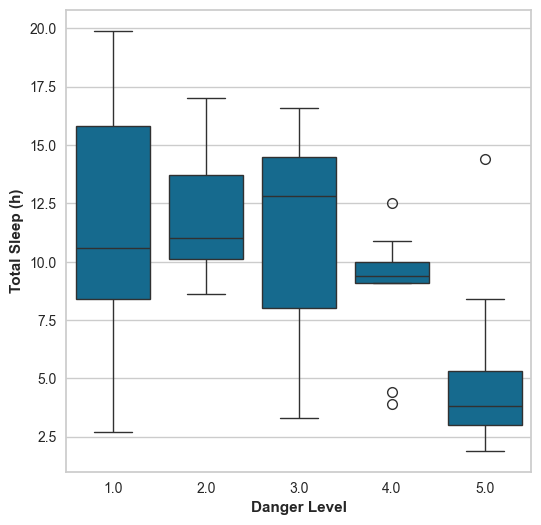

In [690]:
# Relation between Danger and TotalSleep
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'Danger', y = 'TotalSleep', data = data_std)
plt.xlabel('Danger Level', fontsize = 11, fontweight = 'bold')
plt.ylabel('Total Sleep (h)', fontsize = 11, fontweight = 'bold')
plt.show()

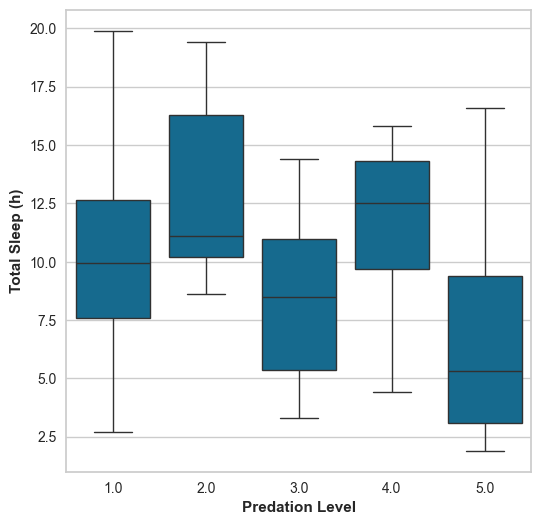

In [691]:
# Relation between Predation and TotalSleep
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'Predation', y='TotalSleep', data = data_std)
plt.xlabel('Predation Level', fontsize = 11, fontweight = 'bold')
plt.ylabel('Total Sleep (h)', fontsize =  11, fontweight = 'bold')
plt.show()

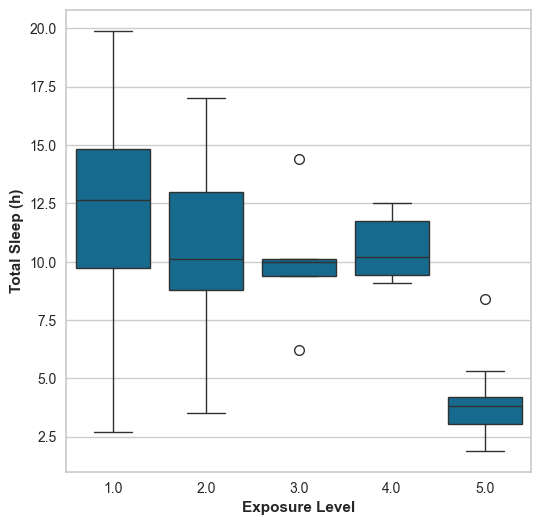

In [692]:
# Relation between Exposure and TotalSleep
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'Exposure', y = 'TotalSleep', data = data_std)
plt.xlabel('Exposure Level', fontsize = 11, fontweight = 'bold')
plt.ylabel('Total Sleep (h)', fontsize = 11, fontweight = 'bold')
plt.show()

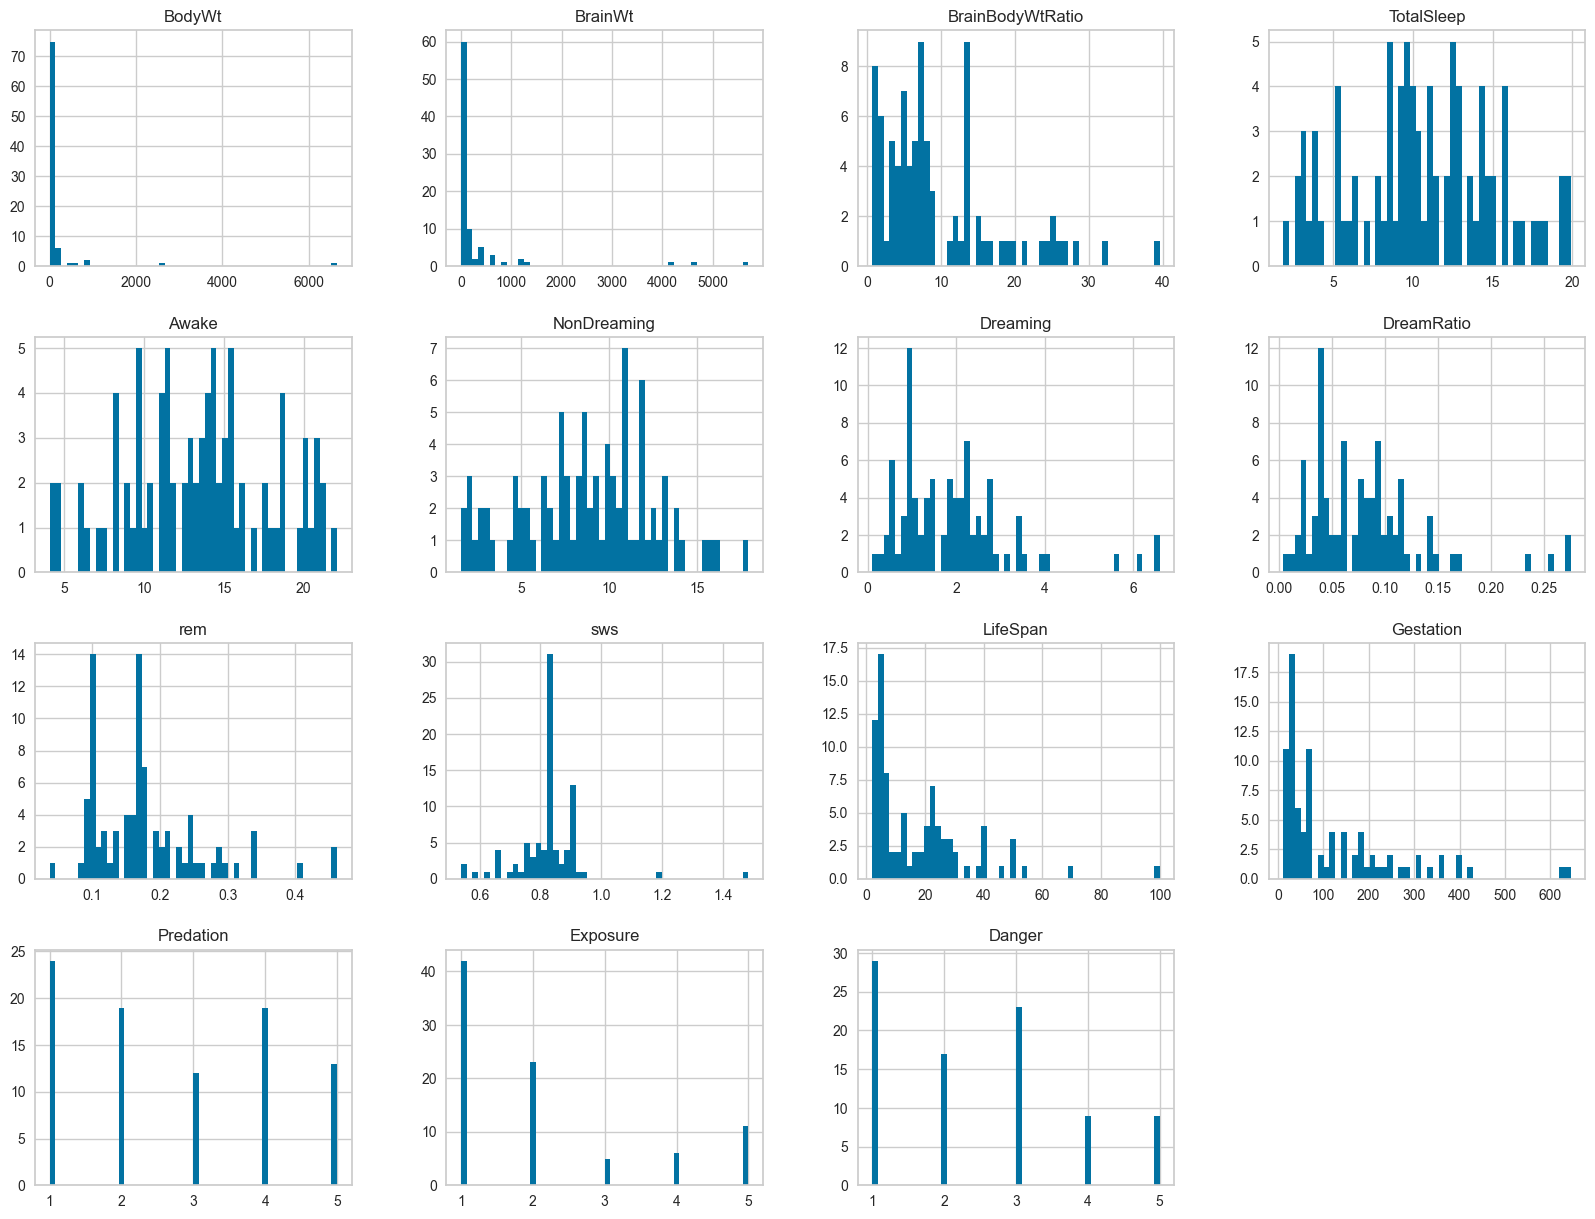

In [693]:
data_std_numeric.hist(bins = 50,figsize = (20, 15))
plt.show()

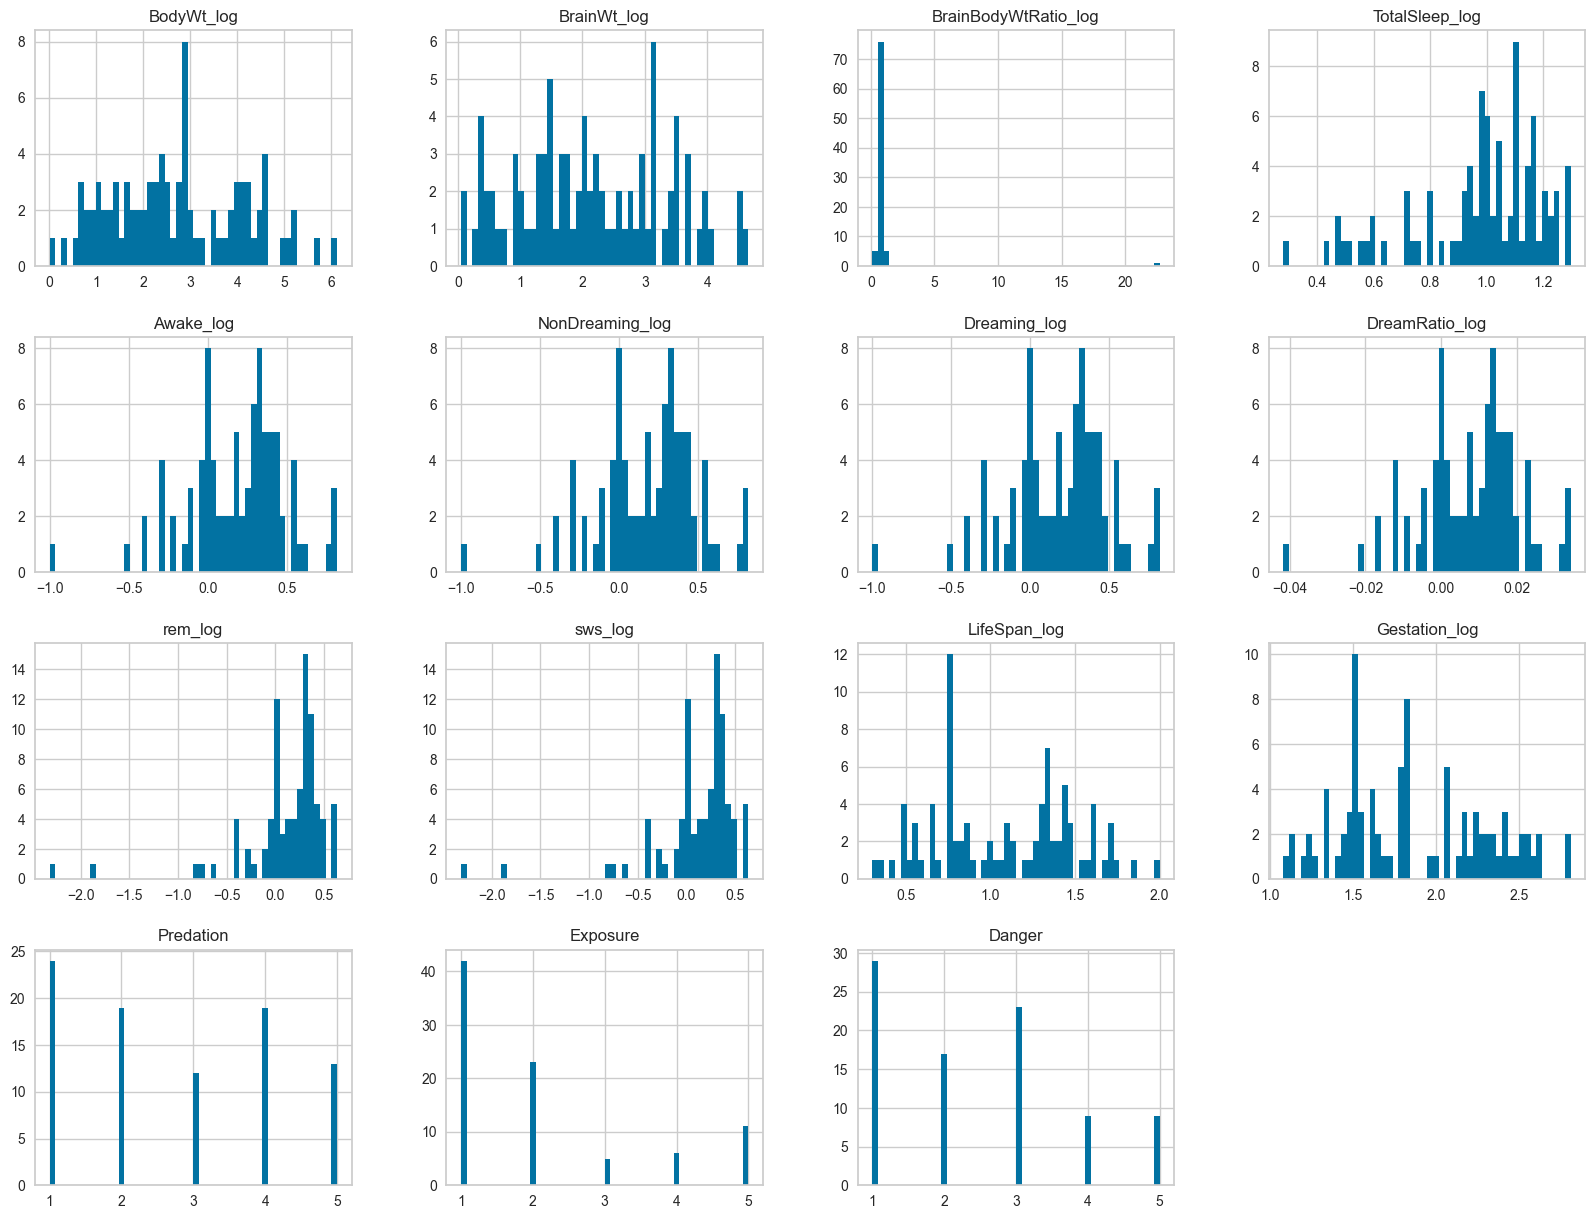

In [694]:
data_log_numeric.hist(bins = 50,figsize = (20, 15))
plt.show()

In [695]:
data_norm_numeric.hist(bins = 50, figsize = (20, 15))
plt.show()

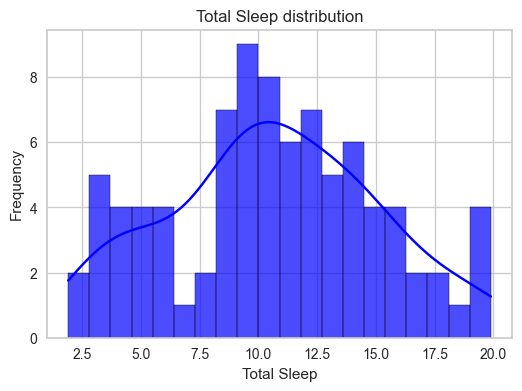

In [696]:
# Distribution of Total Sleep
plt.figure(figsize = (6, 4))
sns.histplot(data_std['TotalSleep'], bins = 20, color = 'blue', edgecolor = 'black', alpha = 0.7, kde = True)
plt.title('Total Sleep distribution')
plt.xlabel('Total Sleep')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [697]:
# Distribution of Dreaming
plt.figure(figsize = (6, 4))
sns.histplot(data_std['Dreaming'], bins = 20, color = 'blue', edgecolor = 'black', alpha = 0.5, kde = True)
plt.title('Dreaming distribution')
plt.xlabel('Dreaming')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Create a tree diagram between Genus and Order

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\2744055122.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(jaccard_matrix,method = 'ward')


<function matplotlib.pyplot.show(close=None, block=None)>

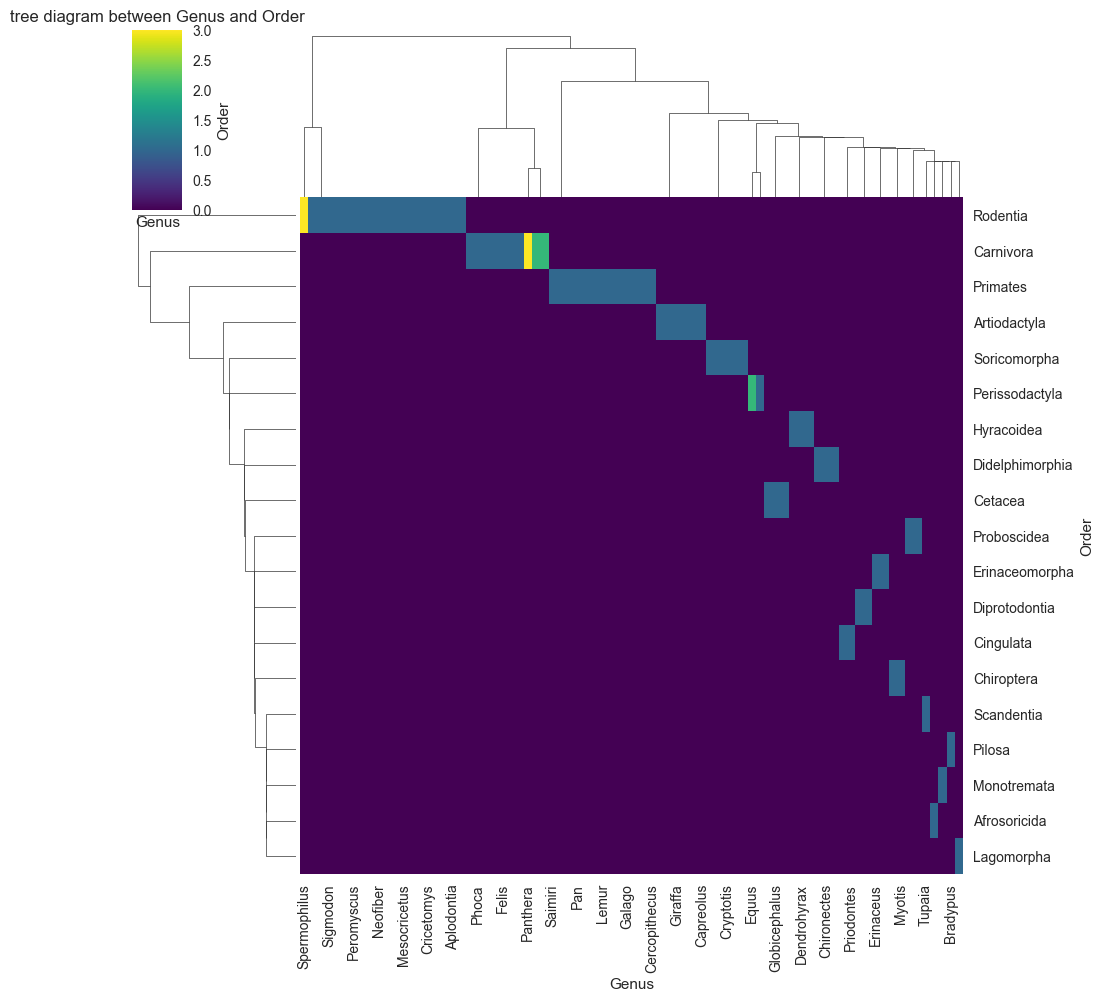

In [698]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist,squareform

grouped_Taxonomic = data_std.groupby(["Order","Genus"]).size().reset_index(name = 'quantity')
contingency_table = pd.crosstab(index = grouped_Taxonomic['Order'], columns = grouped_Taxonomic['Genus'],
                              values = grouped_Taxonomic['quantity'], aggfunc = 'sum').fillna(0)

#distance_matrix=hierarchy.linkage(contingency_table.values, method='ward')
jaccard_distances = pdist(contingency_table.values, metric = 'jaccard')
#jaccard_distances[np.isinf(jaccard_distances)] = 10
jaccard_matrix = squareform(jaccard_distances)
#jaccard_matrix[np.isnan(jaccard_matrix)] = 0
linkage_matrix = hierarchy.linkage(jaccard_matrix,method = 'ward')
sns.clustermap(contingency_table, method = 'ward',cmap = 'viridis', row_cluster = True, col_cluster = True)
plt.xlabel('Genus')
plt.ylabel('Order')
plt.title ('tree diagram between Genus and Order')
plt.show

In [699]:
 # Create a pie chart 
def create_pie_chart(df, var):
    value_counts = df[var].value_counts()
    plt.figure(figsize = (8, 8))
    plt.pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%')
    plt.title(f'Distribution of {var}')
    plt.show()
    return 


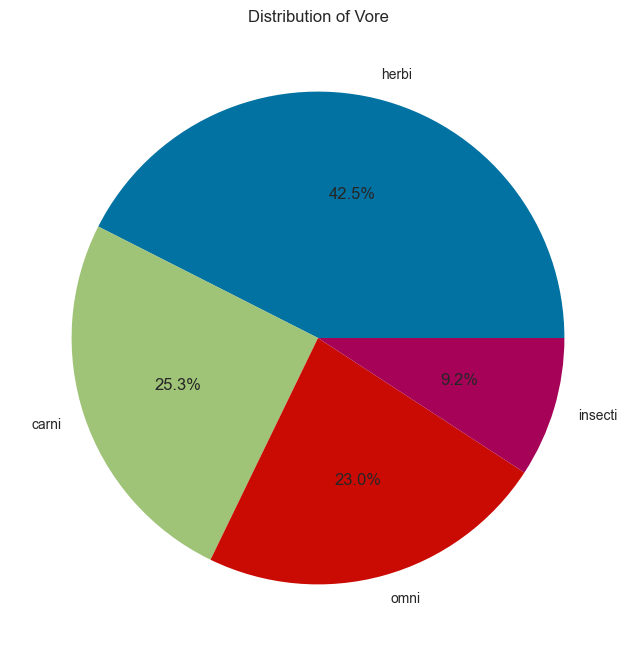

In [700]:
# Plot pie charts for Vore
create_pie_chart(data_std, 'Vore')

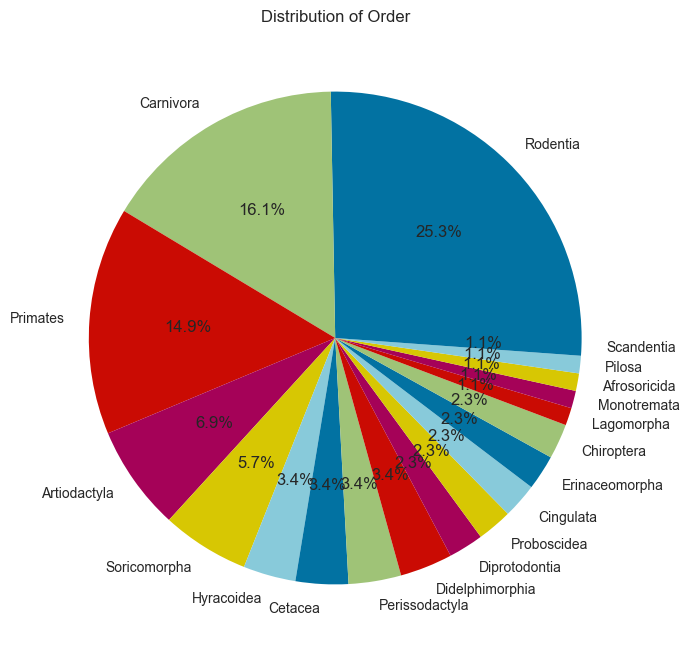

In [701]:
# Plot pie charts for variable Order
create_pie_chart(data_std, 'Order')

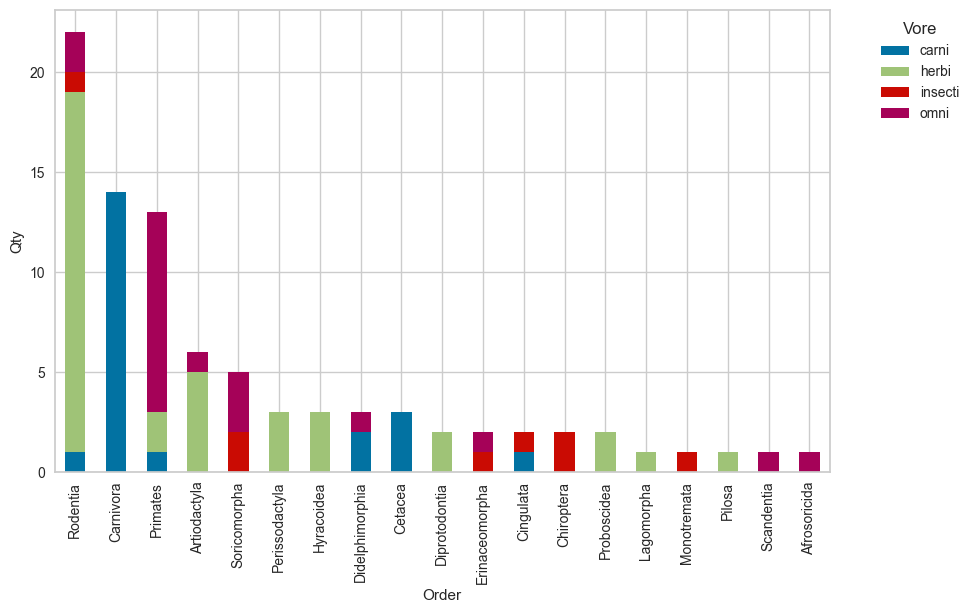

In [702]:
# Bar plot for Order and Vore
qty = data_std.groupby(['Order', 'Vore']).size().unstack(fill_value = 0)
order_sum = qty.sum(axis = 1).sort_values(ascending = False).index
qty = qty.loc[order_sum]
# create the Bar diagram
qty.plot(kind = 'bar', stacked = True, figsize = (10, 6))
plt.xlabel('Order')
plt.ylabel('Qty')
#plt.title('Diagramm')
plt.legend(title = 'Vore', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

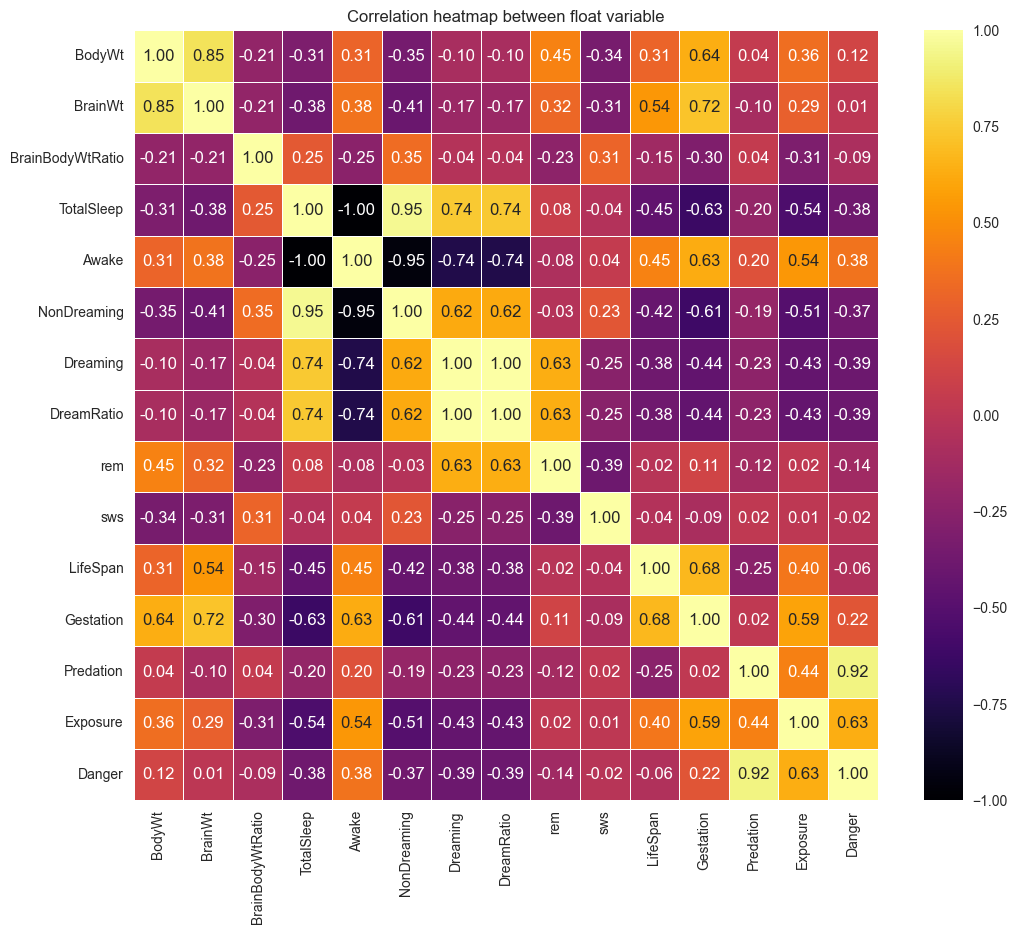

In [703]:
# Corelation using Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(data_std_numeric.corr(), annot = True, cmap = "inferno", fmt = ".2f", linewidths = .5)
plt.title("Correlation heatmap between float variable")
plt.show()

#### Features highly correlated with TotalSleep include Dreaming, DreamRatio, NonDreaming, and moderately inversely correlated with Gestation and Exposure.
#### BodyWt and BrainWt are highly correlated.
#### Danger is highly correlated with Predation and moderately correlated with Exposure

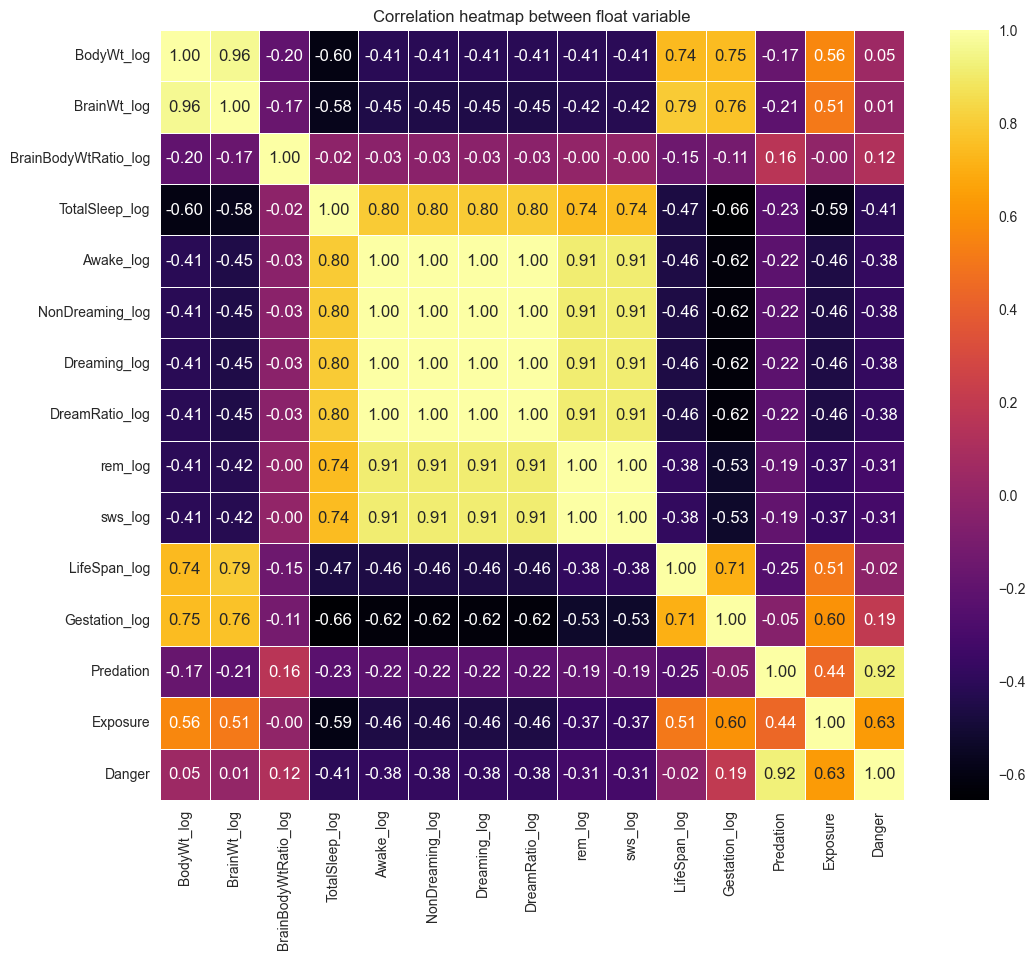

In [704]:
# Corelation using Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(data_log_numeric.corr(), annot = True, cmap = "inferno", fmt = ".2f", linewidths = .5)
plt.title("Correlation heatmap between float variable")
plt.show()

#### We see similar tendencies which seem stronger and we also see new correlation between TotalSleep and rem_log and also with sws_log
#### Also, BodyWt_log and BrainWt log are inversely correlated with TotalSleep.

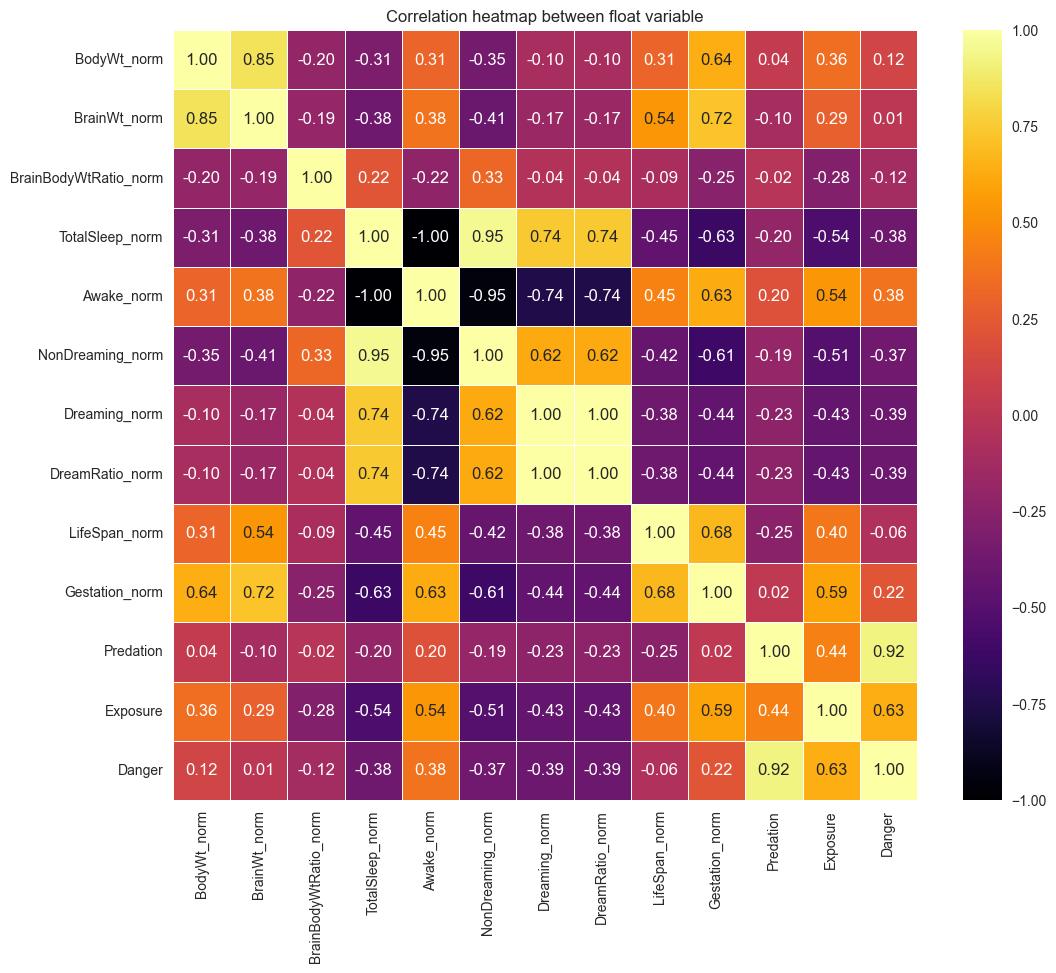

In [705]:
# Corelation using Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(data_norm_numeric.corr(), annot = True, cmap = "inferno", fmt = ".2f", linewidths = .5)
plt.title("Correlation heatmap between float variable")
plt.show()

#### We see similar tendencies as in standard cleaned data.

### Does a large mammal have a better sleep than a small mammal?

In [706]:
data_std["TotalSleep"].describe()
# cf histogram on the EDA part

count    87.000000
mean     10.608046
std       4.465793
min       1.900000
25%       8.150000
50%      10.300000
75%      13.750000
max      19.900000
Name: TotalSleep, dtype: float64

In [707]:
 # New ratio
data_std["SleepBodyWtRatio"] = round((data_std["TotalSleep"] / data_std["BodyWt"]),2)
data_std["SleepBrainWtRatio"] = round((data_std["TotalSleep"] / data_std["BrainWt"]),2)

In [708]:
# Number of categories to split the variable
nber_category = 5

# create the variable with the category
cut_result = pd.qcut(data_std['BodyWt'], q=nber_category, labels = False)
data_std['BodyWt_cat'] = cut_result

# Obtain the born interval
interval_bounds = []
for i in range(nber_category):
    mask = (cut_result == i)
    interval_bounds.append((data_std.loc[mask, 'BodyWt'].min(), data_std.loc[mask, 'BodyWt'].max()))

# Convert the born
interval_bounds_float = [(round(float(min_value), 2), round(float(max_value), 2)) \
                         for min_value, max_value in interval_bounds]

# Create the interval
interval_index = pd.IntervalIndex.from_tuples(interval_bounds_float, closed='both')
    
data_std['BodyWt_cat'] = pd.cut(data_std['BodyWt'], bins=interval_index)


In [709]:
data_std.groupby('BodyWt_cat', as_index = False)[['TotalSleep', 'BodyWt', 'DreamRatio', \
                                        'SleepBodyWtRatio', 'SleepBrainWtRatio']].mean()

BodyWt_cat  TotalSleep      BodyWt  DreamRatio  SleepBodyWtRatio  \
0    [0.01, 0.11]   12.800000    0.047438    0.092708        452.107500   
1    [0.12, 0.92]   12.805882    0.439529    0.100000         44.224118   
2      [1.0, 3.6]   11.205882    2.252647    0.088480          5.992353   
3    [3.85, 55.5]    9.235294   23.156059    0.060294          1.083529   
4  [60.0, 6654.0]    7.111111  755.563278    0.060648          0.060000   

   SleepBrainWtRatio  
0          33.470000  
1           6.787059  
2           1.320000  
3           0.127059  
4           0.027222

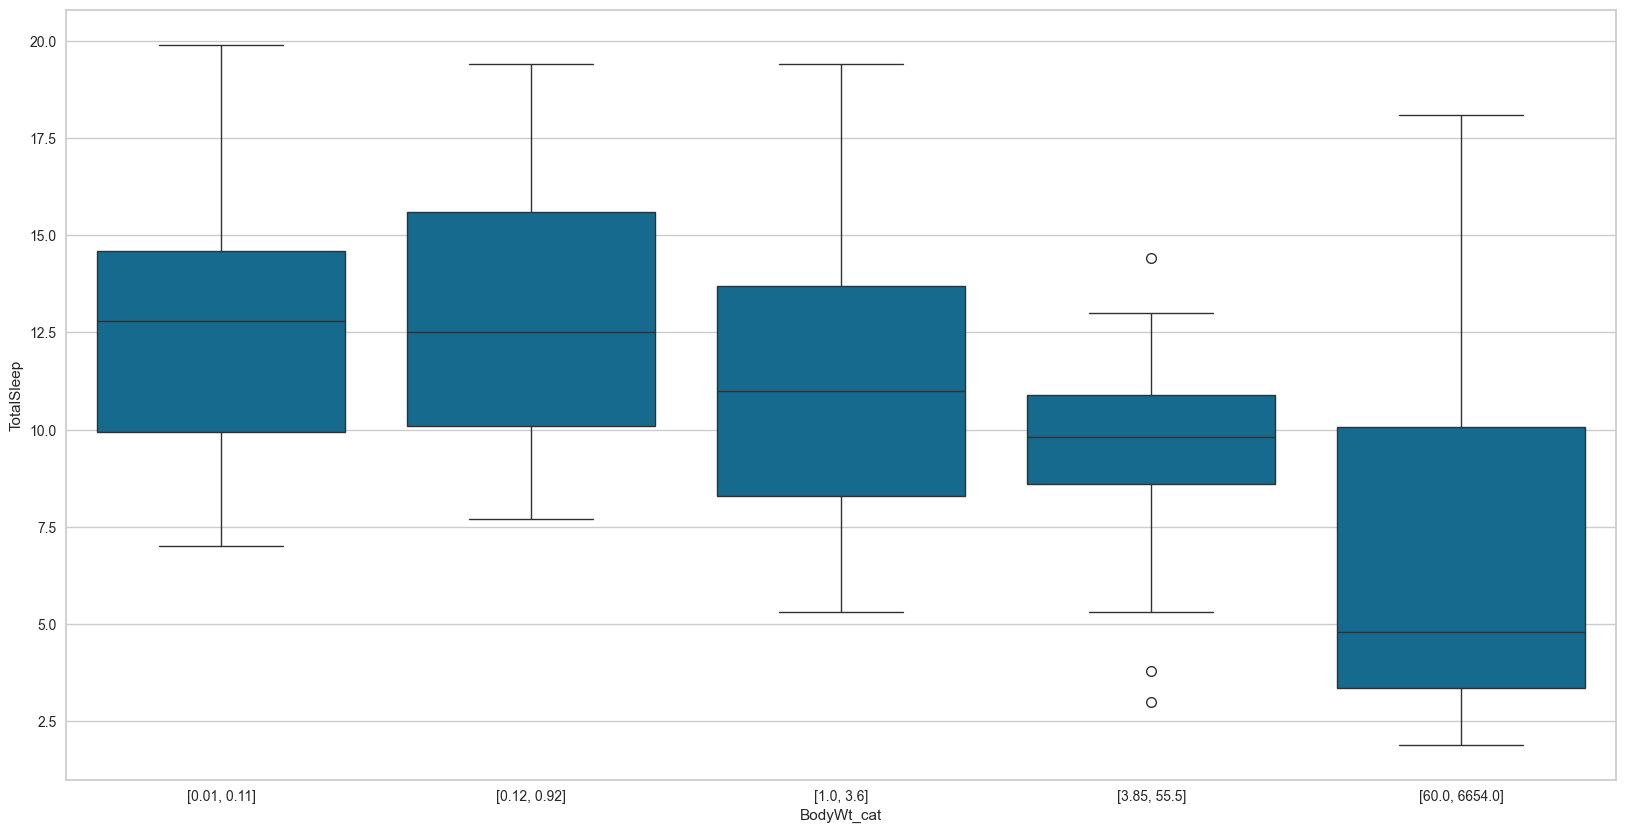

In [710]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['BodyWt_cat'], y = data_std['TotalSleep'])
plt.show()

In [711]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data_std['BodyWt'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.310


In [712]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data_log['BodyWt_log'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.531


In [713]:
def plot_scatter(variable1, variable2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x = variable1, y = variable2, alpha = 0.5)
    sns.regplot(x = variable1, y = variable2, scatter = False, color = 'red', line_kws = {'linewidth':2})
    plt.title(f'{variable1.name} vs. {variable2.name}')
    plt.xlabel(variable1.name)
    plt.ylabel(variable2.name)
    plt.show()

In [714]:
# Number of categories to split the variable
nber_category = 4

# create the variable with the category
cut_result = pd.qcut(data_std['Gestation'], q=nber_category, labels=False)
data_std['gestation_cut1'] = cut_result

# Obtain the born interval
interval_bounds = []
for i in range(nber_category):
    mask = (cut_result == i)
    interval_bounds.append((data_std.loc[mask, 'Gestation'].min(), \
                        data_std.loc[mask, 'Gestation'].max()))

# Convert the born
interval_bounds_float = [(round(float(min_value), 2), round(float(max_value), 2)) \
                         for min_value, max_value in interval_bounds]

# Create the interval
interval_index = pd.IntervalIndex.from_tuples(interval_bounds_float, closed='both')
   
data_std['gestation_cut1'] = pd.cut(data_std['Gestation'], bins=interval_index)


In [715]:
data_std.groupby('gestation_cut1', as_index = False)[['TotalSleep', 'Gestation', 'DreamRatio']].mean()

gestation_cut1  TotalSleep   Gestation  DreamRatio
0    [12.0, 31.71]   13.447059   21.558824    0.118873
1    [34.0, 66.83]   12.443750   48.375000    0.106510
2    [68.0, 180.0]   10.725000  133.000000    0.067187
3  [185.12, 645.0]    6.190476  317.702381    0.037103

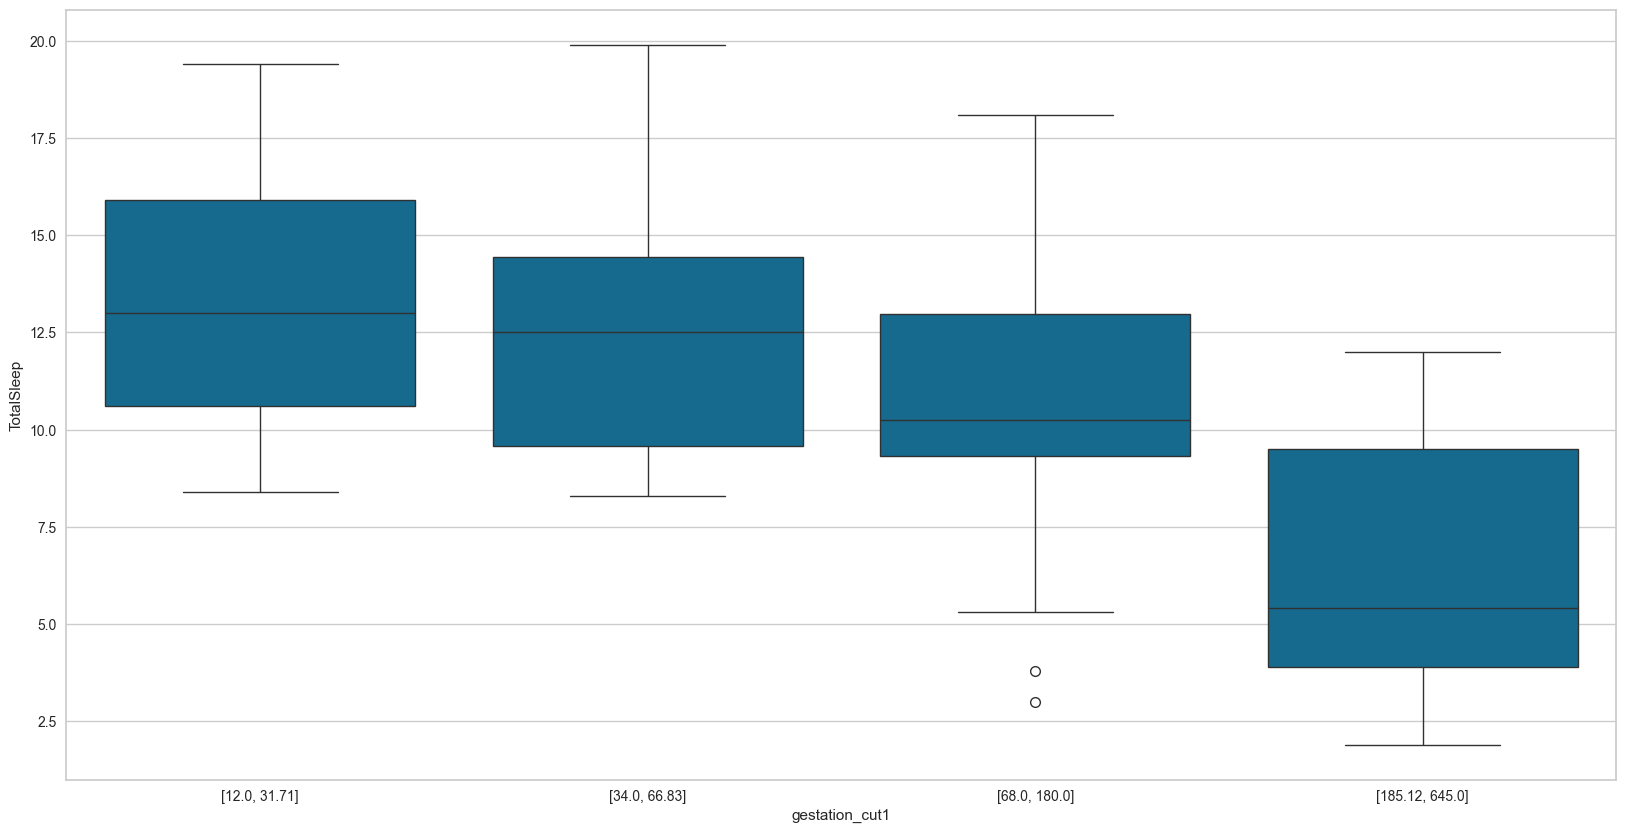

In [716]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['gestation_cut1'], y = data_std['TotalSleep'])
plt.show()

#### Lower Gestation values relate with higer TotalSleep values. Hence they are inversely correlated (-0.63)

In [717]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data_std['Gestation'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.627


In [718]:
# Check use of data_std instead of data_std
X =  data_std[['BodyWt', 'Gestation', 'Predation', 'Exposure', 'carni', 'insecti','herbi','omni']]
y = data_std['TotalSleep']
X = sm.add_constant(X)
linear_reg = sm.OLS(y, X)
results = linear_reg.fit()
print(results.summary())

# See coeff and p-value for insecti, carni, omni.

                            OLS Regression Results                            
Dep. Variable:             TotalSleep   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     9.869
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           8.73e-09
Time:                        13:02:43   Log-Likelihood:                -225.80
No. Observations:                  87   AIC:                             467.6
Df Residuals:                      79   BIC:                             487.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5065      0.890     14.045      0.0

In [719]:
from sklearn.tree import DecisionTreeRegressor
feature_names = ['BodyWt', 'Gestation', 'Predation', 'Exposure', 'carni', 'insecti','herbi','omni']
X = data_std[feature_names].to_numpy()
y = data_std[["TotalSleep"]].to_numpy()
y = y.ravel()

X.shape, y.shape
 
tree_reg = DecisionTreeRegressor(random_state = 0) 
tree_reg.fit(X, y)
 
feature_importances = []
for feature, importance in zip(feature_names, tree_reg.feature_importances_):
    feature_importances.append((feature, importance)) 
feature_importances.sort(key = lambda item: item[1], reverse = True)
print("feature : importance - Tree")
print("-------------------")
for feature, importance in feature_importances:
    print(feature, ":", np.round(importance, 4))

# Similar to the above OLS: we cannot clearly see the impact with just this.
# The plots above provides a better picture.

feature : importance - Tree
-------------------
Gestation : 0.5675
BodyWt : 0.1912
Exposure : 0.1256
herbi : 0.046
carni : 0.0364
Predation : 0.0254
omni : 0.0076
insecti : 0.0003


### We conclue that

##### The main variable to explain TotalSleep is Gestation : TotalSleep is inversely correlated to Gestation.

##### Larger mammal do not have a better sleep, it's the contradictary.

##### BodyWt is the 2nd variable to explain Gestation, is moderately correlated but when transformed with log we can see a better correlation

## Do predators have a better sleep than preys?

In [720]:
data_std.groupby('Predation', as_index = False)[['TotalSleep', 'BodyWt', 'DreamRatio', 'BrainBodyWtRatio', \
                                                 'rem', 'sws']].mean()

Predation  TotalSleep      BodyWt  DreamRatio  BrainBodyWtRatio       rem  \
0        1.0   10.550000   89.095042    0.081250          8.153811  0.177132   
1        2.0   13.142105    1.772158    0.109430         11.465898  0.190602   
2        3.0    8.508333  767.764417    0.076389          7.626561  0.229130   
3        4.0   11.684211   17.828263    0.074781         12.495062  0.153771   
4        5.0    7.376923  178.197923    0.046795          7.655416  0.154254   

        sws  
0  0.824568  
1  0.815914  
2  0.813781  
3  0.861103  
4  0.799592

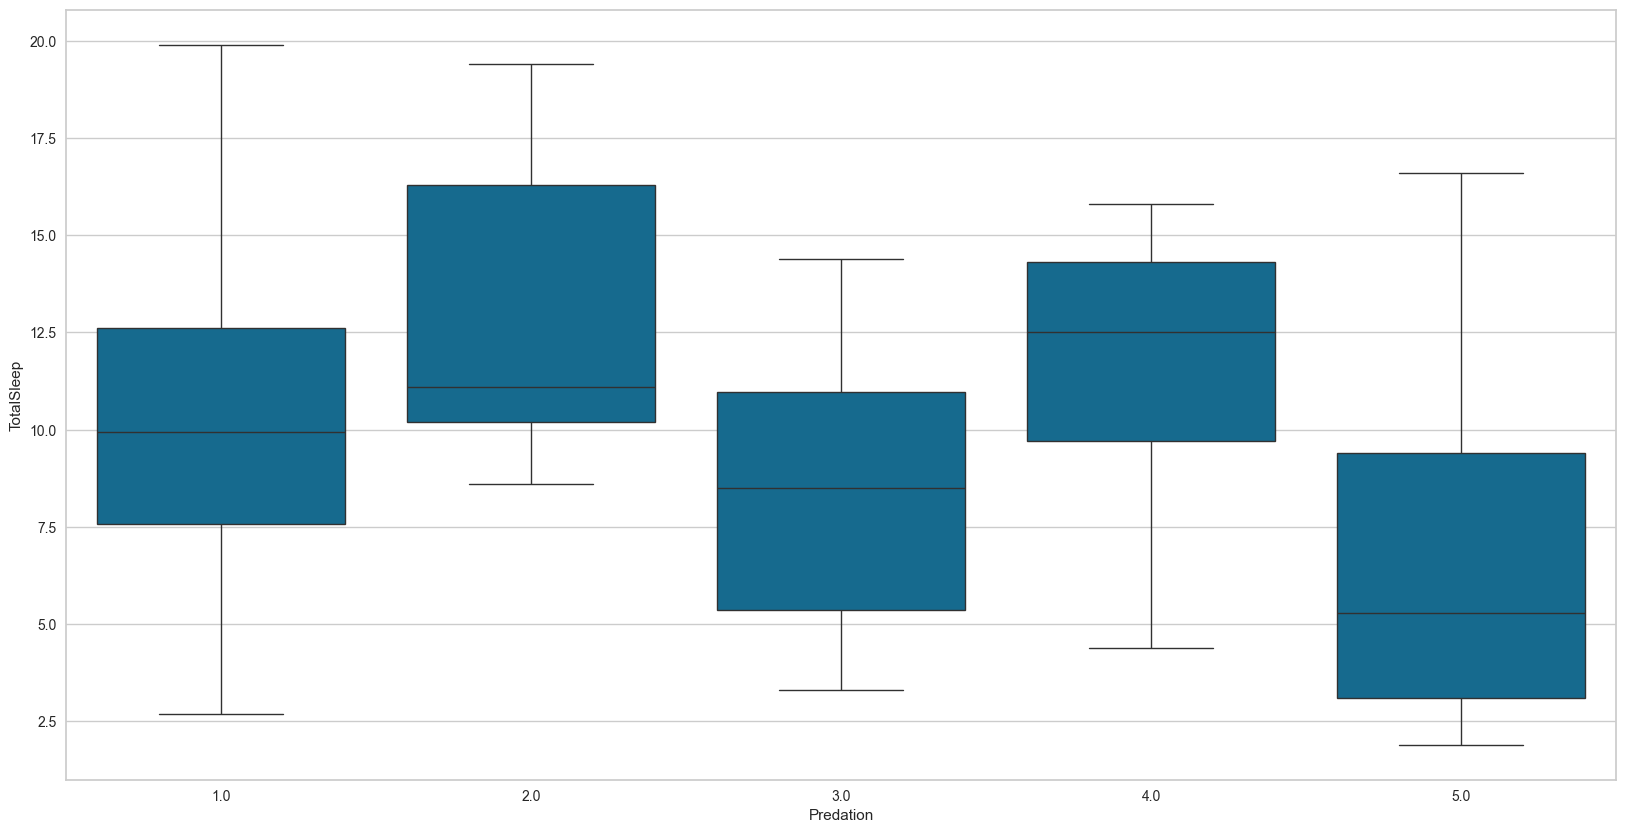

In [721]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Predation'], y = data_std['TotalSleep'])
plt.show()

##### At first glance we do not see that predators have longer sleep

In [722]:
corr, _ = pearsonr(data_std['Predation'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.196


In [723]:
data_std.groupby('Danger', as_index = False)[['TotalSleep', 'BodyWt', 'DreamRatio', 'BrainBodyWtRatio', \
                                                 'rem', 'sws']].mean()

Danger  TotalSleep      BodyWt  DreamRatio  BrainBodyWtRatio       rem  \
0     1.0   11.655172   74.050793    0.102155          7.906959  0.194733   
1     2.0   11.670588    1.456647    0.082843         13.722365  0.174637   
2     3.0   11.347826  289.920217    0.080072         11.387051  0.172313   
3     4.0    8.744444  320.209889    0.052778          9.593906  0.172580   
4     5.0    5.200000  257.571667    0.031944          3.462169  0.157401   

        sws  
0  0.815222  
1  0.864081  
2  0.808771  
3  0.850143  
4  0.803247

In [724]:
data_std.groupby('Danger', as_index = False)[['TotalSleep']].count()

Danger  TotalSleep
0     1.0          29
1     2.0          17
2     3.0          23
3     4.0           9
4     5.0           9

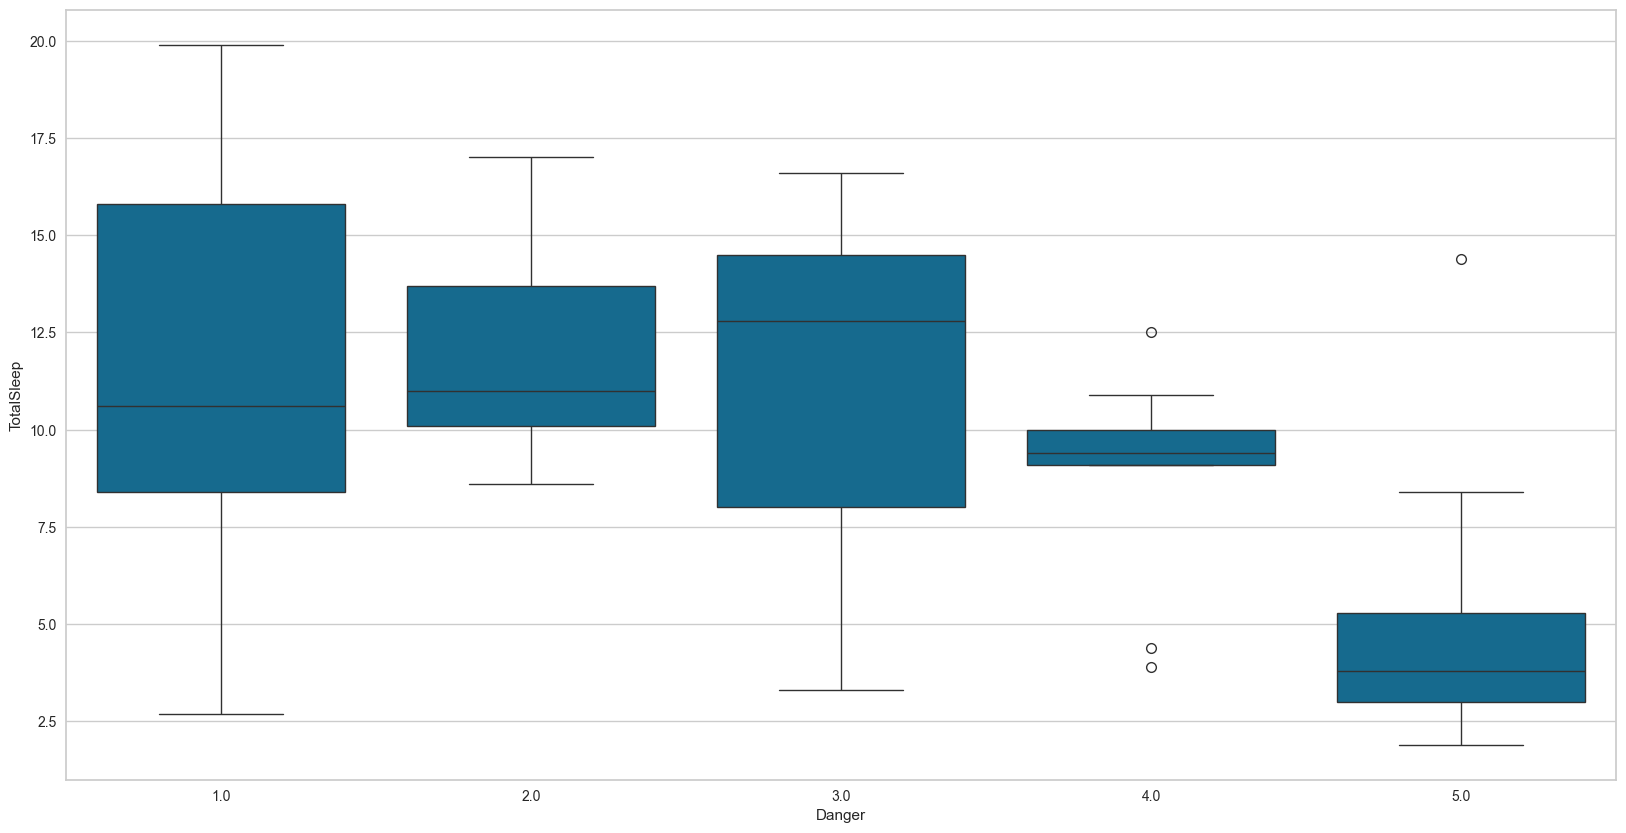

In [725]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Danger'], y = data_std['TotalSleep'])
plt.show()
# In general, specimens with lowest Danger (Danger=1 to 3) have the hightest TotalSleep.

In [726]:
corr, _ = pearsonr(data_std['Exposure'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.545


In [727]:
# We check REM and SWS but do not consider it for our analysis as REM and SWS are a part of TotalSleep 
#(as Dreaming is a part of TotalSleep)
data_std.groupby('Exposure', as_index = False)[['TotalSleep', 'BodyWt', 'DreamRatio', 'BrainBodyWtRatio', \
                                                 'rem', 'sws']].mean()

Exposure  TotalSleep       BodyWt  DreamRatio  BrainBodyWtRatio       rem  \
0       1.0   12.323810    32.507167    0.100298         10.468263  0.184614   
1       2.0   10.773913    22.636304    0.078261         12.082128  0.172982   
2       3.0   10.020000    20.225600    0.054167         11.610506  0.135766   
3       4.0   10.566667    55.095833    0.052778          6.646785  0.121786   
4       5.0    4.000000  1065.708727    0.034091          2.409057  0.218835   

        sws  
0  0.805409  
1  0.867033  
2  0.835924  
3  0.867148  
4  0.787420

In [728]:
data_std.groupby('Exposure', as_index = False)[['TotalSleep']].count()

Exposure  TotalSleep
0       1.0          42
1       2.0          23
2       3.0           5
3       4.0           6
4       5.0          11

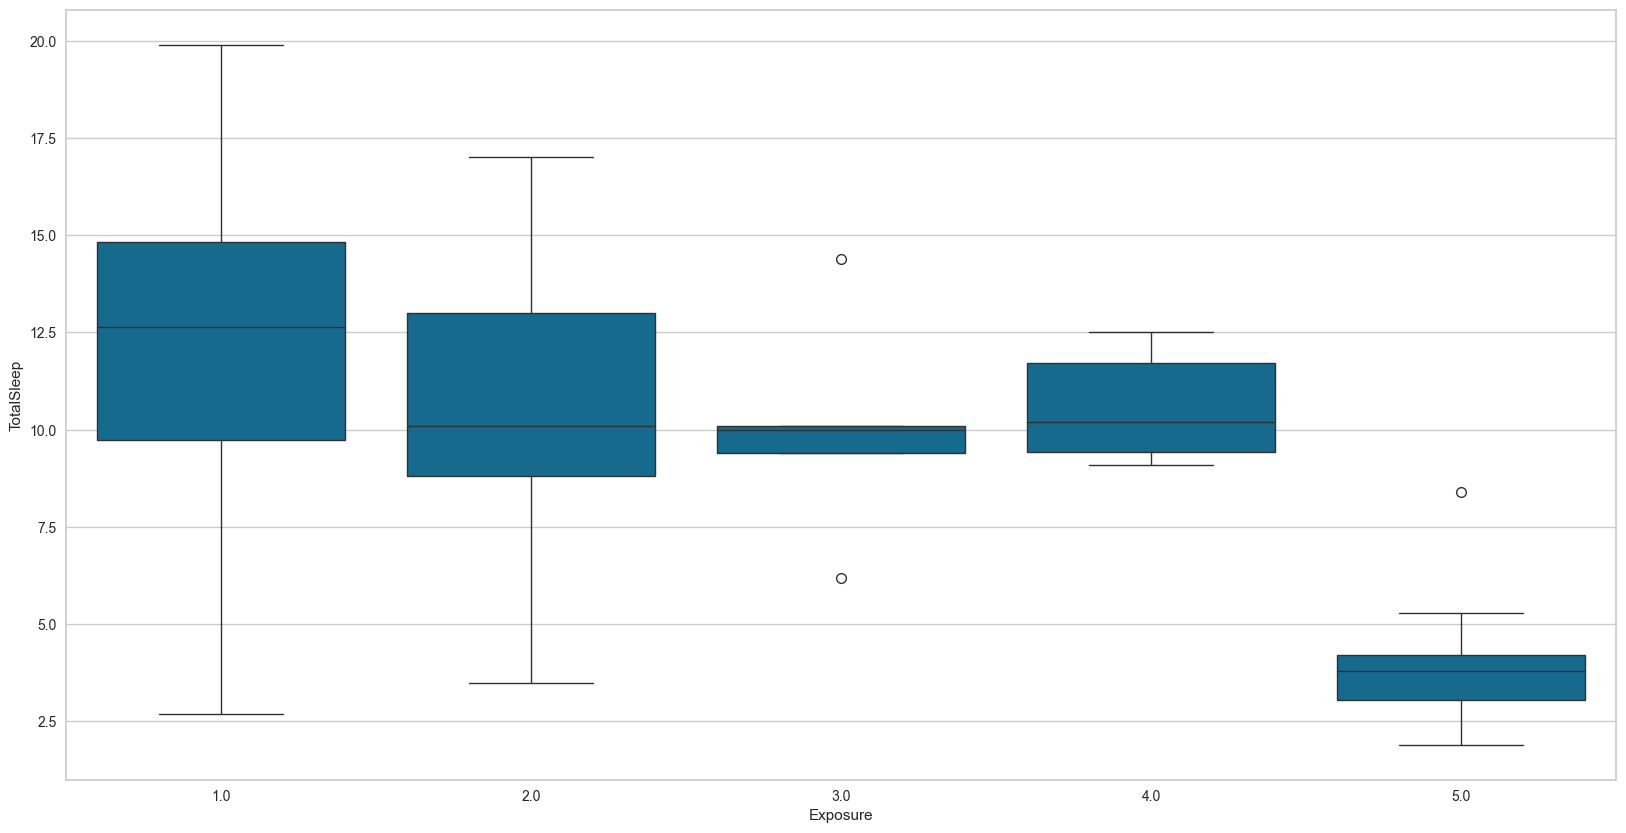

In [729]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Exposure'], y = data_std['TotalSleep'])
plt.show()
# In general, specimens with lowest Exposure (Danger = 1) have the hightest TotalSleep.
# Note: Category 4 exporse is slightly higher.

##### The trends vary inside each of the pins in the Prediction categories.

##### So we conclude that it is not necessary for predators to have longer sleep.

##### As Exposure is more correlated than Predation for explain TotalSleep, Exposure seems a more important variable.

## Who has the longer dreams?

In [730]:
data_std.nlargest(n = 10, columns = ['Dreaming'])

Species         Genus            Order     Vore  \
76            Thick-tailed opposum    Lutreolina  Didelphimorphia    carni   
85                   Water opossum   Chironectes  Didelphimorphia    carni   
28                 Giant armadillo    Priodontes        Cingulata  insecti   
54          North American Opossum     Didelphis  Didelphimorphia     omni   
25               European hedgehog     Erinaceus   Erinaceomorpha     omni   
7                    Big brown bat     Eptesicus       Chiroptera  insecti   
21                    Domestic cat         Felis        Carnivora    carni   
31                  Golden hamster  Mesocricetus         Rodentia    herbi   
32  Golden-mantled ground squirrel  Spermophilus         Rodentia    herbi   
77  Thirteen-lined ground squirrel  Spermophilus         Rodentia    herbi   

                OrderVore  carni  herbi  insecti  omni  Conservation  ...  \
76  Didelphimorphia-carni      1      0        0     0            lc  ...   
85  Didelphimorphia-carni      1      0        0     0            lc  ...   
28      Cingulata-insecti      0      0        1     0            en  ...   
54   Didelphimorphia-omni      0      0        0     1            lc  ...   
25    Erinaceomorpha-omni      0      0        0     1            lc  ...   
7      Chiroptera-insecti      0      0        1     0            lc  ...   
21        Carnivora-carni      1      0        0     0  domesticated  ...   
31         Rodentia-herbi      0      1        0     0            en  ...   
32         Rodentia-herbi      0      1        0     0            lc  ...   
77         Rodentia-herbi      0      1        0     0            lc  ...   

         sws  LifeSpan   Gestation  Predation  Exposure  Danger  \
76  0.829897       3.0   14.000000        2.0       1.0     1.0   
85  0.659794       3.0   14.000000        2.0       1.0     1.0   
28  0.662983       7.0  120.000000        1.0       1.0     1.0   
54  0.766667       5.0   12.000000        2.0       1.0     1.0   
25  0.653465       6.0   42.000000        2.0       2.0     2.0   
7   0.802030      19.0   35.000000        1.0       1.0     1.0   
21  0.872000      28.0   63.000000        1.0       2.0     1.0   
31  0.769231       3.9   16.000000        3.0       1.0     2.0   
32  0.654088       9.0   28.000000        5.0       1.0     3.0   
77  0.833333       5.9   31.714286        4.0       1.0     3.0   

    SleepBodyWtRatio  SleepBrainWtRatio      BodyWt_cat  gestation_cut1  
76             52.43              47.05    [0.12, 0.92]   [12.0, 31.71]  
85              5.54               4.97      [1.0, 3.6]   [12.0, 31.71]  
28              0.30               0.22  [60.0, 6654.0]   [68.0, 180.0]  
54             10.59               2.86      [1.0, 3.6]   [12.0, 31.71]  
25             13.12               2.89    [0.12, 0.92]   [34.0, 66.83]  
7             856.52              65.67    [0.01, 0.11]   [34.0, 66.83]  
21              3.79               0.49      [1.0, 3.6]   [34.0, 66.83]  
31            119.17              14.30    [0.12, 0.92]   [12.0, 31.71]  
32             77.56               3.98    [0.12, 0.92]   [12.0, 31.71]  
77            136.63               3.45    [0.01, 0.11]             NaN  

[10 rows x 30 columns]

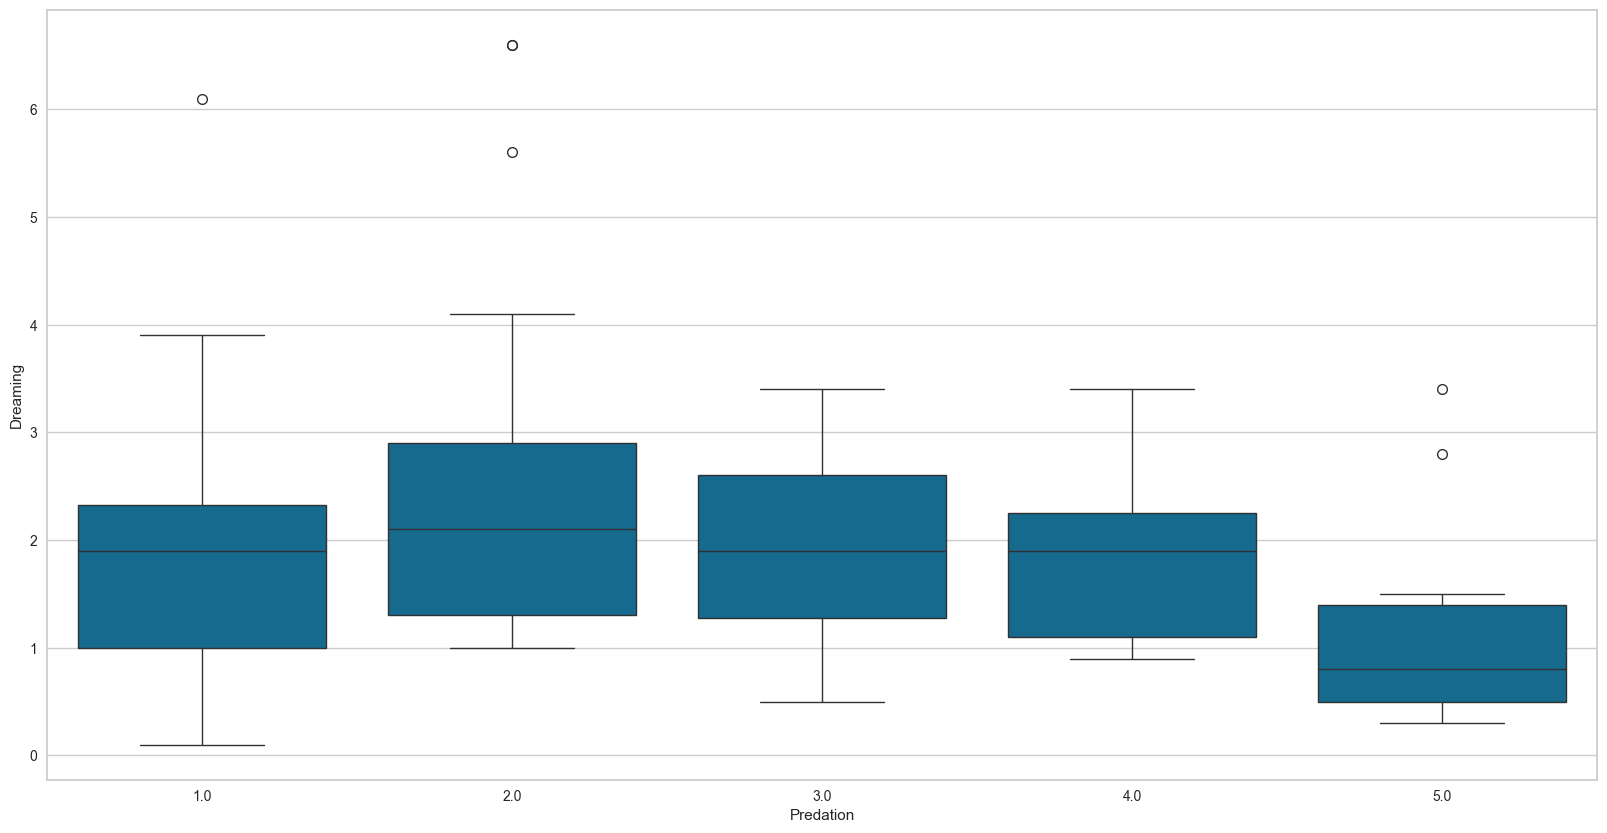

In [731]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Predation'], y = data_std['Dreaming'])
plt.show()
# We observe several outliers in Predation category 1&2 but in general, speciments in Predation = 2 have longer dreams.

In [732]:
data_std.groupby('Predation', as_index = False)[['TotalSleep', 'Dreaming', 'DreamRatio', 'rem', 'sws']].mean()

Predation  TotalSleep  Dreaming  DreamRatio       rem       sws
0        1.0   10.550000  1.950000    0.081250  0.177132  0.824568
1        2.0   13.142105  2.626316    0.109430  0.190602  0.815914
2        3.0    8.508333  1.833333    0.076389  0.229130  0.813781
3        4.0   11.684211  1.794737    0.074781  0.153771  0.861103
4        5.0    7.376923  1.123077    0.046795  0.154254  0.799592

In [733]:
data_std.groupby('Predation', as_index = False)[['Dreaming']].count()

Predation  Dreaming
0        1.0        24
1        2.0        19
2        3.0        12
3        4.0        19
4        5.0        13

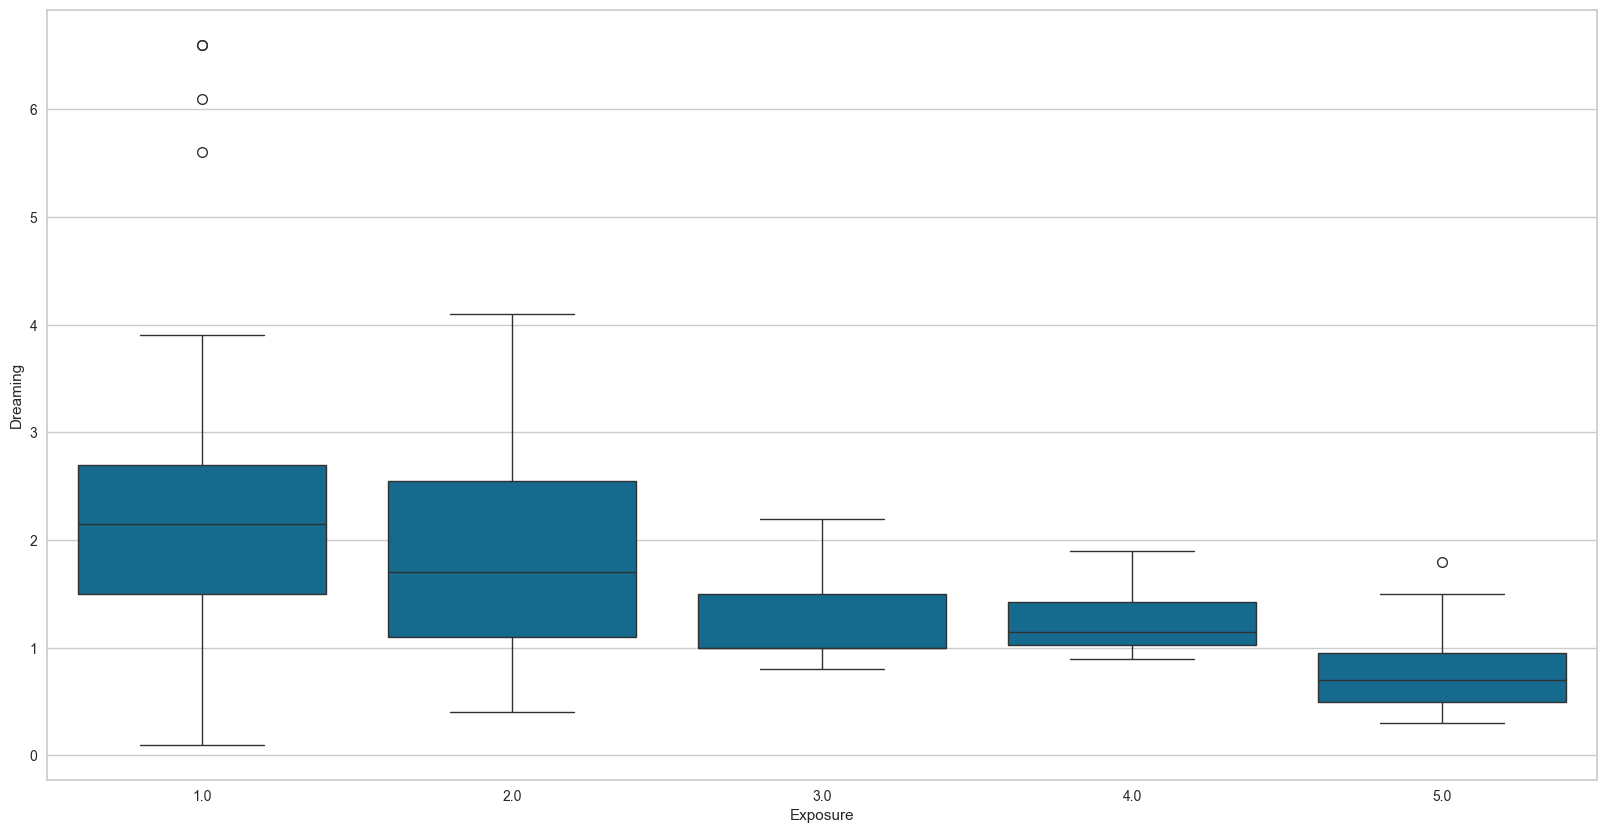

In [734]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Exposure'], y = data_std['Dreaming'])
plt.show()
# We observe several outliers in Predation category 1&2 but in general, speciments in Predation = 2 have longer dreams.

In [735]:
corr, _ = pearsonr(data_std['Exposure'], data_std['Dreaming'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.431


In [736]:
data_std.groupby('Exposure', as_index = False)[['TotalSleep', 'Dreaming', 'DreamRatio', 'rem', 'sws']].mean()
#Exposure gives a good tendency towards Dreaming. We see that Exposure = 1 has highest dreaming. 

Exposure  TotalSleep  Dreaming  DreamRatio       rem       sws
0       1.0   12.323810  2.407143    0.100298  0.184614  0.805409
1       2.0   10.773913  1.878261    0.078261  0.172982  0.867033
2       3.0   10.020000  1.300000    0.054167  0.135766  0.835924
3       4.0   10.566667  1.266667    0.052778  0.121786  0.867148
4       5.0    4.000000  0.818182    0.034091  0.218835  0.787420

In [737]:
data_std.groupby('Exposure', as_index = False)[['Dreaming']].count()

Exposure  Dreaming
0       1.0        42
1       2.0        23
2       3.0         5
3       4.0         6
4       5.0        11

In [738]:
#data_std['rem_cut'] = pd.cut(data_std["rem"], bins = 8, labels = False)
data_std['rem_cut'] = pd.qcut(data_std["rem"], q = 5, labels = False)
data_std.groupby('rem_cut', as_index = False)[['TotalSleep', 'Dreaming', 'DreamRatio']].mean()

rem_cut  TotalSleep  Dreaming  DreamRatio
0        0    9.711111  0.944444    0.039352
1        1   10.723529  1.400000    0.058333
2        2   11.152941  1.888235    0.078676
3        3   10.500000  2.047059    0.085294
4        4   10.983333  3.316667    0.138194

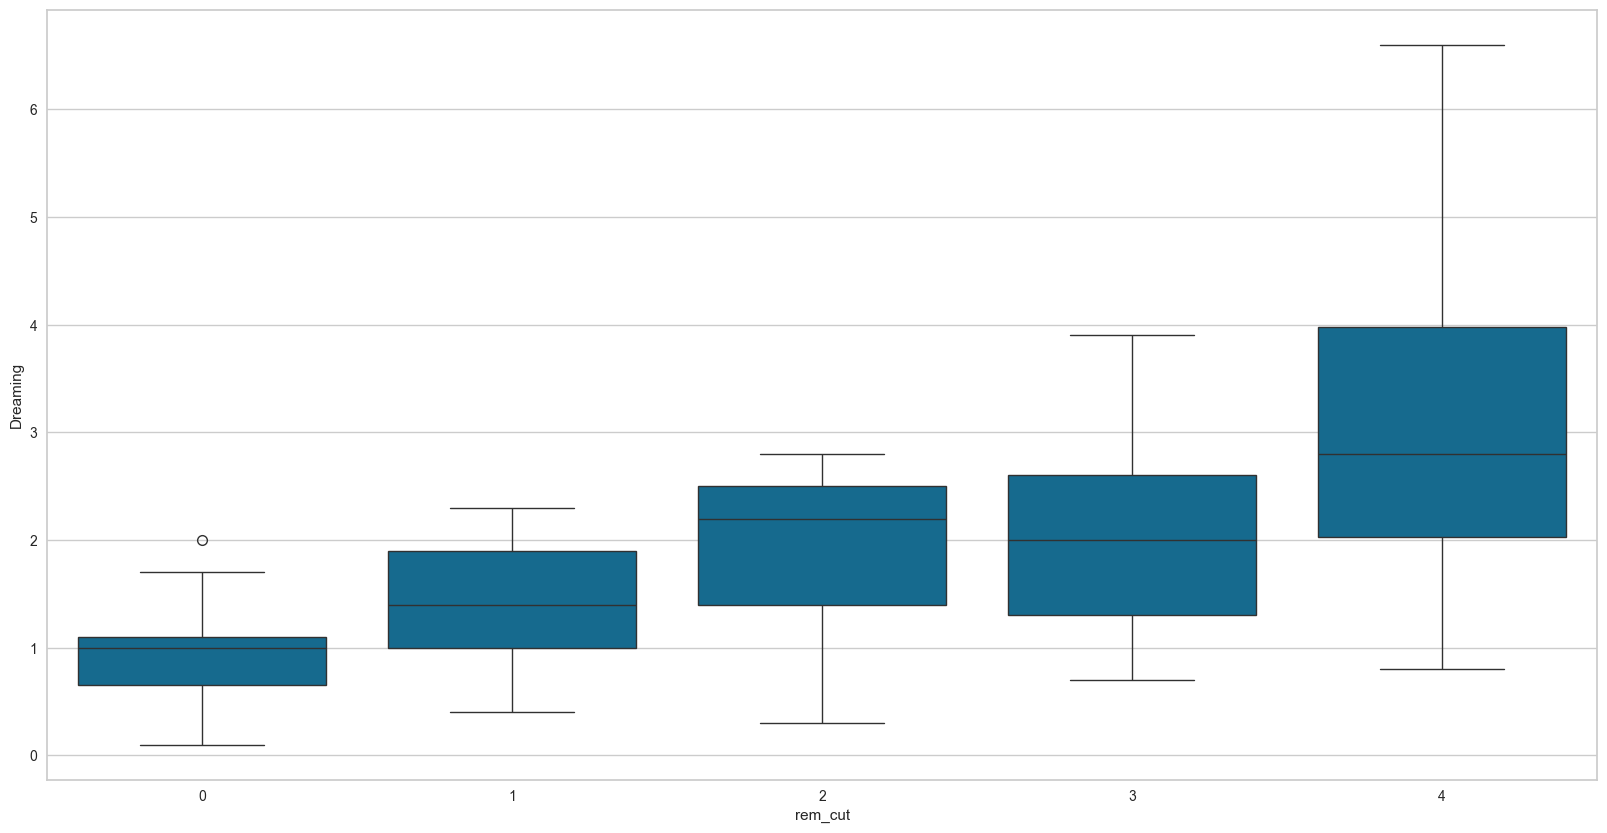

In [739]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['rem_cut'], y = data_std['Dreaming'])
plt.show()

In [740]:
corr, _ = pearsonr(data_std['Dreaming'], data_std['TotalSleep'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.743


In [741]:
corr, _ = pearsonr(data_std['Dreaming'], data_std['rem'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.634


#### Dreaming is higly correlated with TotalSleep.

##### REM increases with an increase in dreaming.

##### Dreaming decreases with exposure (moderately inversely correlated).

##  Dreaming by vore

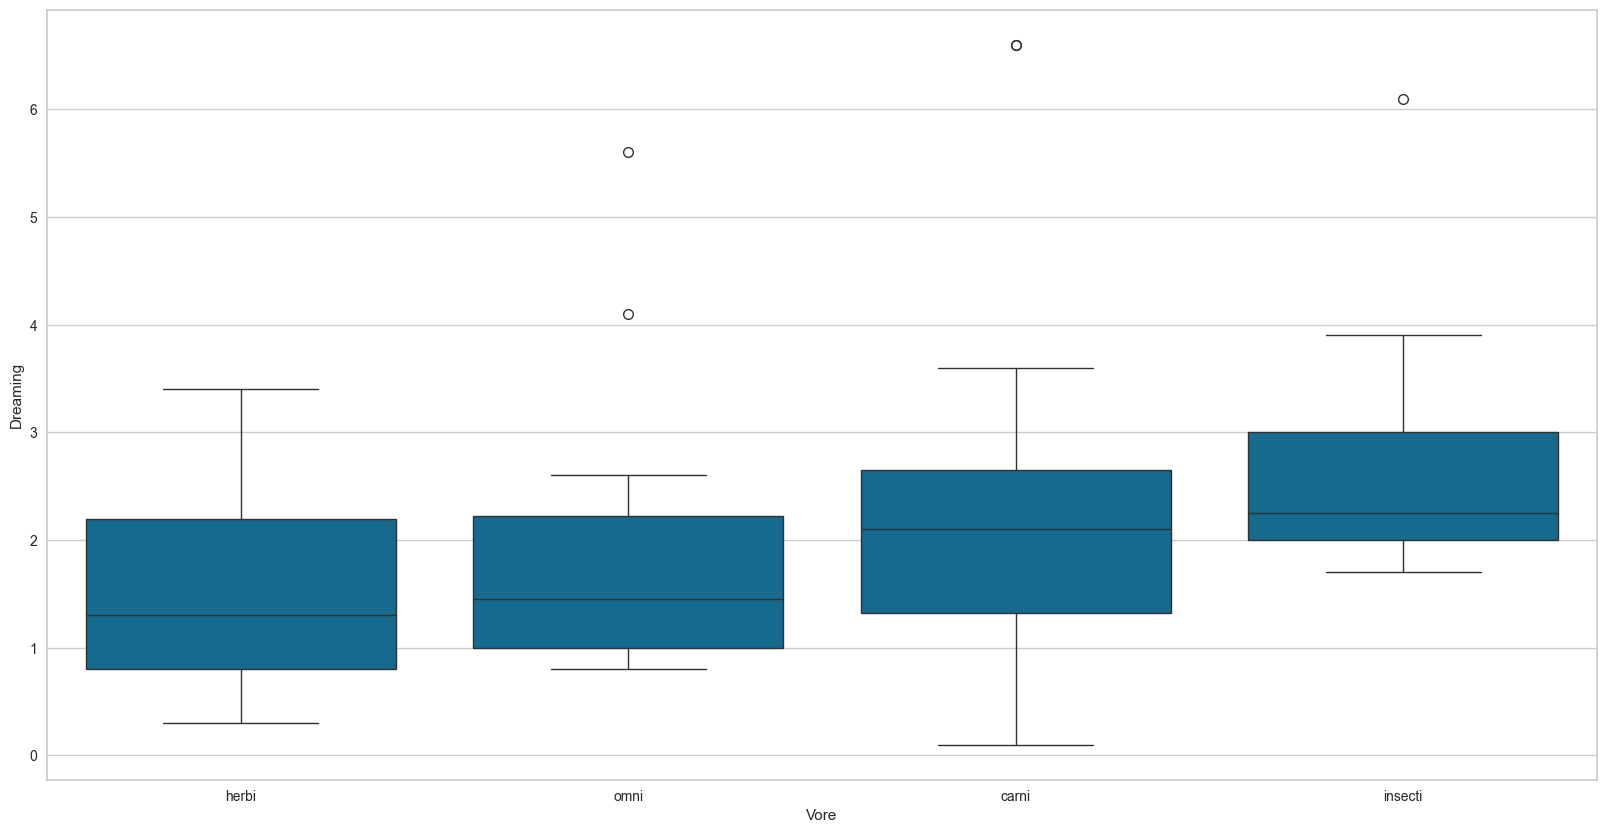

In [742]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Vore'], y = data_std['Dreaming'])
plt.show()
# In general, we see that insecti has higher dreaming while herbi has the least.

In [743]:
# BodyWt_log removed from the feature as it is hightly correlated with BrainWt
X =  data_std[['BodyWt', 'Gestation', 'Predation', 'Exposure', 'carni', 'insecti','herbi','omni']]
y = data_std['Dreaming']
X = sm.add_constant(X)
linear_reg = sm.OLS(y, X)
results = linear_reg.fit()
print(results.summary())

# See coeff and p-value for insecti, and carni.
# We have removed columns like Danger and BrainWt to reduce multi-collinearity here as well as below.
# Good results as coeff is high and p value < 0.05 for insecti and Ccarni

                            OLS Regression Results                            
Dep. Variable:               Dreaming   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     5.687
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.42e-05
Time:                        13:03:37   Log-Likelihood:                -128.29
No. Observations:                  87   AIC:                             272.6
Df Residuals:                      79   BIC:                             292.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3895      0.290      8.231      0.0

In [744]:
# Wtih log values
data_std = pd.read_csv('sleep_merged_cleaned.csv', sep = ',', header = 'infer')
X = data_std[['BodyWt_log', 'Gestation_log', 'Predation', 'Exposure', \
              'carni', 'insecti','herbi','omni']]
Y = data_std[['Dreaming']]

# Model creation
model = sm.OLS(Y, X)
result= model.fit()

# Show a summary of the result
print(result.summary())

# The above results without log scale were better.
# This could be due to some degree of collinearity between Gestation_log and BodyWt_log

                            OLS Regression Results                            
Dep. Variable:               Dreaming   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     8.617
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           8.15e-08
Time:                        13:03:38   Log-Likelihood:                -121.37
No. Observations:                  87   AIC:                             258.7
Df Residuals:                      79   BIC:                             278.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BodyWt_log        0.3111      0.145      2.142

 #### Dreaming analysis using decision tree 

In [745]:
feature_names = ['BrainWt', 'BodyWt', 'Gestation', 'Predation', 'Exposure', 'Danger', 'LifeSpan', \
              'carni', 'insecti','herbi','omni']
X = data_std[feature_names].to_numpy()
y = data_std[["Dreaming"]].to_numpy()
y = y.ravel()

X.shape, y.shape
 
tree_reg = DecisionTreeRegressor(random_state = 0) 
tree_reg.fit(X, y)
 
feature_importances = []
for feature, importance in zip(feature_names, tree_reg.feature_importances_):
    feature_importances.append((feature, importance)) 
feature_importances.sort(key = lambda item: item[1], reverse = True)
print("feature : importance - Tree")
print("-------------------")
for feature, importance in feature_importances:
    print(feature, ":", np.round(importance, 4))

# Results are in line with expected results.

feature : importance - Tree
-------------------
Gestation : 0.7019
BrainWt : 0.1166
Danger : 0.0501
LifeSpan : 0.0466
BodyWt : 0.0278
insecti : 0.0215
Exposure : 0.0114
Predation : 0.0089
omni : 0.0075
herbi : 0.0059
carni : 0.0018


In [746]:
# Number of categories to split the variable
nber_category = 5

# create the variable with the category
cut_result = pd.qcut(data_std['Gestation'], q=nber_category, labels = False)
data_std['Gestation_cat'] = cut_result

# Obtain the born interval
interval_bounds = []
for i in range(nber_category):
    mask = (cut_result == i)
    interval_bounds.append((data_std.loc[mask, 'Gestation'].min(), data_std.loc[mask, 'Gestation'].max()))

# Convert the born
interval_bounds_float = [(round(float(min_value), 2), round(float(max_value), 2)) for min_value, \
                         max_value in interval_bounds]

# Create the interval
interval_index = pd.IntervalIndex.from_tuples(interval_bounds_float, closed='both')
    
data_std['Gestation_cat'] = pd.cut(data_std['Gestation'], bins=interval_index)

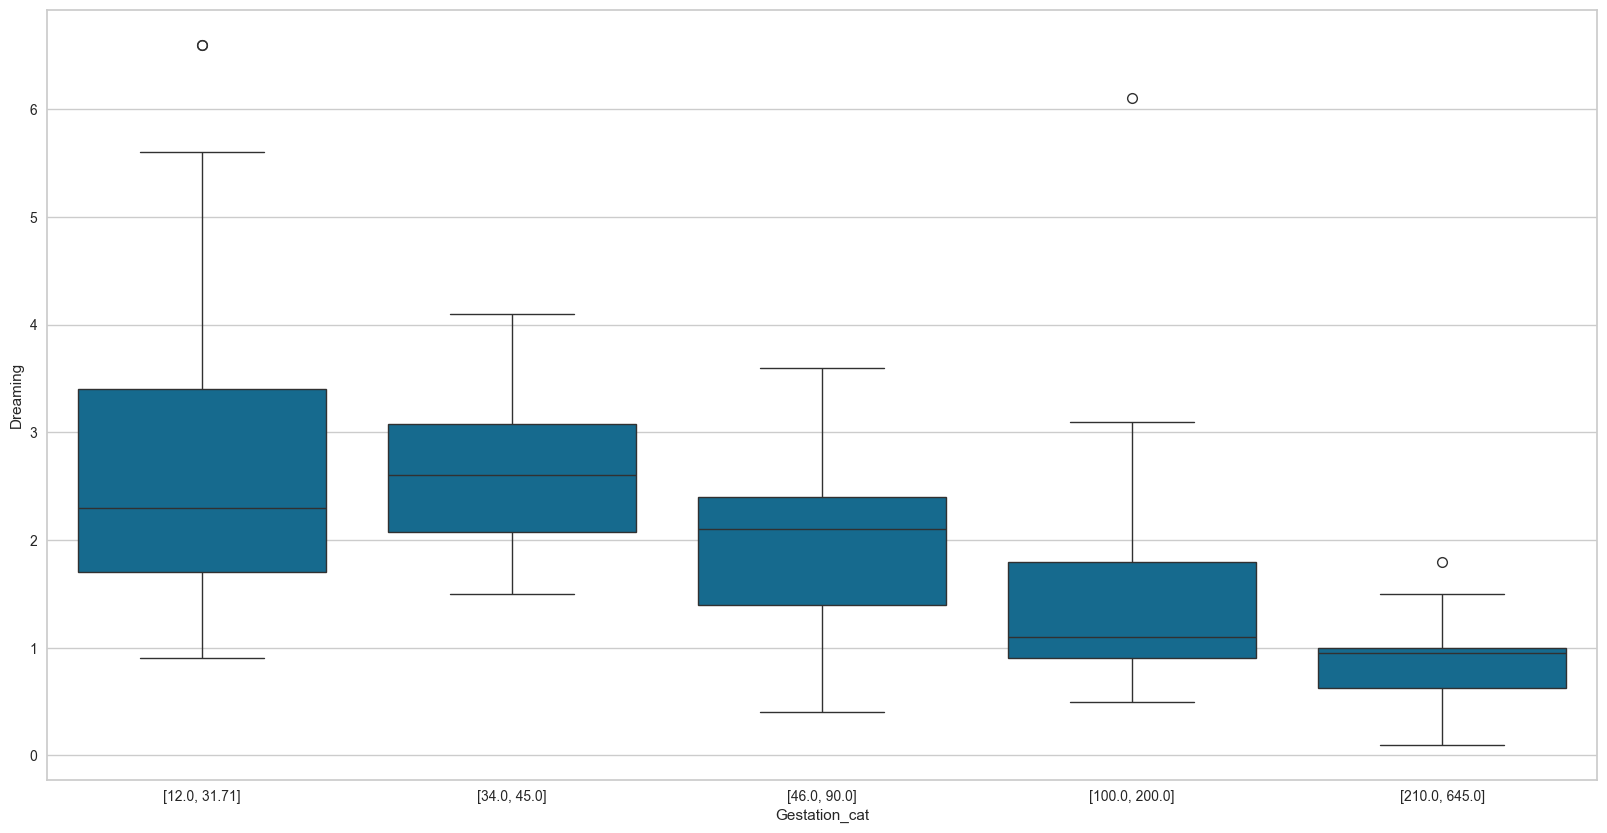

In [747]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = data_std['Gestation_cat'], y = data_std['Dreaming'])
plt.show()
# In general, we see that insecti has higher dreaming while herbi has the least.

In [748]:
data_std.groupby('Gestation_cat', as_index = False)[['TotalSleep', 'Dreaming', 'DreamRatio', 'rem', 'sws']].mean()

Gestation_cat  TotalSleep  Dreaming  DreamRatio       rem       sws
0   [12.0, 31.71]   13.447059  2.852941    0.118873  0.199506  0.809007
1    [34.0, 45.0]   11.800000  2.700000    0.112500  0.237035  0.742613
2    [46.0, 90.0]   11.476471  2.017647    0.084069  0.179224  0.860695
3  [100.0, 200.0]   10.417647  1.558824    0.064951  0.140291  0.838829
4  [210.0, 645.0]    5.783333  0.894444    0.037269  0.178220  0.829272

In [749]:
corr, _ = pearsonr(data_std['Gestation'], data_std['Dreaming'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.442


## Motivation for model selection 

In [750]:
# The following were our considerations for selecting the predictive models
# 1. Since our target variable is a numerical variable, we tried to identy regression techniques.
# 2. We also took into consideration the fact that we had very limited amount of data.
# 3. Even though we had several variables that were dependent on each other (eg: BodyWt and BrainWt or Danger and 
#    Exposure), we decided not to create a composite varible using PCA.
# Inspite of having selected these models, some were not at all adopted (for example: Lasso).

## Prediction Algorithms

In [751]:
# We have used the following models for the prediction of TotalSleep
#  Linear Regression
#   - Easy to implement
#   - Provides a linear relation between the features and target
#   - Does not capture non-linear relationships betwee variables
#   - Sensible to outliers
#   - Does not work very well with variables showing colinearity

#  Multiple Linear Regression (MLR)
#   - Captures complex relationships between features and target
#   - It factors in multi-colinearity
#   - Can be affected by not so useful features.
#   - Prone to overfitting

#  Polynomial Regression
#   - Can capture non-linear relationships
#   - Does not work well on small data sets
#   - Prone to overfitting (especially on small data sets)

#  Ridge Regression
#   - Works well with small data set
#   - Well suited for features displaying multi-colinearity
#   - Needs regularization parameters which needs to be adjusted
#   - Difficult to interpret the results

#  Kernel Ridge Regression
#   - Prone to overfitting (especially on small data sets)
#   - Uses l2-norm regularization
#   - Needs more time to compute
#   - Difficult to interpret the results

#  Lasso Regression
#   - Integrate capacity to select the main features
#   - Less sensitive to outliers
#   - Unstable with highly correlated features
#   - Difficult to interpret the results

#  Random Forest Model
#   - Works well with both categorical and continuous values
#   - Works well with small data set
#   - robust to outliers
#   - Higher training time due to its complexity
#   - Easy to interpret results

#  Support Vector Regression
#   - Works well with continuous values
#   - Works well with small data set
#   - supports both linear and non-linear regressions
#   - robust to outliers
#   - Uses l2-norm regularization

## Linear Regression

In [752]:
def f_linearRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Linear Regression Model.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    lr_model = LinearRegression()
    lr_model.fit(X = X_train, y = y_train)
    model_score = lr_model.score(X = X_train, y = y_train)
    y_test_predicted_lr = np.round(lr_model.predict(X_test), 1)
    r2 = r2_score(y_test, y_test_predicted_lr)
    print("Intercept: ", lr_model.intercept_)
    print("Coefficients: ", lr_model.coef_)
    print("Coefficient R^2 :", r2)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_lr)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_lr))
    print('Model Score: ', model_score)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_lr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_lr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_lr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return r2

## Multiple Linear Regression (MLR)

In [753]:
def f_multipleLinearRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Multiple Linear Regression Model.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) the Mean Absolute Error (MAE), and R^2 score
    """  
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import r2_score
    # Initialize the model
    lr_model = LinearRegression()
    # Train the model on the training data
    lr_model.fit(X = X_train, y = y_train)
    model_score = lr_model.score(X_train, y_train)
    y_test_predicted_lr = np.round(lr_model.predict(X_test), 1)
    # Some sort of accuracy test, just out of curiosity
    (abs(y_test_predicted_lr - y_test) < 1).sum()/len(y_test)
    r2 = r2_score(y_test, y_test_predicted_lr)
    lr_model.score(X = X_train, y = y_train)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_lr).round())
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_lr).round())
    print("Coefficient R^2:", r2)
    print('Model Score: ', model_score)
    # Cross-validation score
    # get the values of the columns for the training data
    X_cross = data_std.loc[:,['BodyWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', \
                              'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_cross = data_std.TotalSleep.values
    Rcross = cross_val_score(lr_model, X_cross, y_cross, cv = 3)
    print("RCross :", Rcross)
    y_test_predicted_cr = np.round(cross_val_predict(lr_model, X_cross, y_cross, cv = 3), 1)
    print("y_test_predicted_cr", y_test_predicted_cr)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_cr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_cr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_cr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return

In [754]:
# not good to have df inside the function.

## Polynomial Regression

In [755]:
def f_polynomialRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Polynomial Regression Model.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    pr = PolynomialFeatures(degree = 2, include_bias = False)
    Input = [('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
    pipe = Pipeline(Input)
    pipe
    pipe.fit(X_train, y_train)
    y_test_predicted_po = np.round(pipe.predict(X_test),1)
    y_test_predicted_po
    print((abs(y_test_predicted_po - y_test) < 1).sum()/len(y_test))
    pipe.score(X_train, y_train)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_po)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_po))
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_po, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_po, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_po, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return
    

## Ridge Regression

In [756]:
def f_ridgeRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Ridge Regression.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from sklearn.metrics import r2_score
    ri_model = Ridge(alpha = 0.6)
    # 0.6 seems to be a better value by checking manually.
    ri_model.fit(X = X_train, y = y_train)
    model_score = ri_model.score(X = X_train, y = y_train)
    y_test_predicted_ri = np.round(ri_model.predict(X_test), 1)
    r2 = r2_score(y_test, y_test_predicted_ri)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_ri)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_ri))
    print("Coefficient R^2:", r2)
    print('Model Score: ', model_score)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_ri, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_ri, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_ri, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return
    

## Kernel Ridge Regression

In [757]:
def f_kernelRidgeRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Kernel Ridge Regression.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.kernel_ridge import KernelRidge
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from sklearn.metrics import r2_score
    kr_model = KernelRidge(alpha = 1.0)
    kr_model.fit(X_train, y_train)
    model_score = kr_model.score(X_train, y_train)
    y_test_predicted_kr = np.round(kr_model.predict(X_test), 1)
    r2 = r2_score(y_test, y_test_predicted_kr)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_kr)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_kr))
    print("Coefficient R^2:", r2)
    print('Model Score: ', model_score)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_kr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_kr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_kr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return

## Lasso Regression

In [758]:
def f_lassoRegression(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Lasso Regression.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from sklearn.metrics import r2_score
    la_model = Lasso(alpha = 0.1)
    la_model.fit(X = X_train, y = y_train)
    y_test_predicted_la = np.round(la_model.predict(X_test), 1)
    model_score = la_model.score(X = X_train, y = y_train)
    r2 = r2_score(y_test, y_test_predicted_la)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_la)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_la))
    print("Coefficient R^2:", r2)
    print('Model Score: ', model_score)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_la)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_la))
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_la, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_la, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_la, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return

## Random Forest

In [759]:
def f_randomForest(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Random Forest Model.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    # Try an ensemble regressor: Random Forest
    rf_model = RandomForestRegressor(random_state = 0)
    rf_model.fit(X = X_train, y = y_train)
    model_score = rf_model.score(X = X_train, y = y_train)
    y_test_predicted_rf = np.round(rf_model.predict(X_test), 1)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_rf)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_rf))
    print('Model Score: ', model_score)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_rf, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_rf, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_rf, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return

## Support Vector Regression

In [760]:
def f_SVR(df, X_train, y_train, X_test, y_test):
    """
    This function runs a Linear Regression Model.
    It takes X_train, y_train, X_test, y_test as inputs.
    It calculates the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)
    """
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    svr_model = SVR()
    svr_model.fit(X = X_train, y = y_train)
    model_score = svr_model.score(X = X_train, y = y_train)
    y_test_predicted_svr = np.round(svr_model.predict(X_test), 1)
    r2 = r2_score(y_test, y_test_predicted_svr)
    print("Intercept: ", svr_model.intercept_)
    # print("Coefficients: ", svr_model.coef_)
    print("Coefficient R^2 :", r2)
    print('mean_squared_error: ', mean_squared_error(y_test, y_test_predicted_svr)) 
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_test_predicted_svr))
    print('Model Score: ', model_score)
    if 'TotalSleep' in df.columns:
        ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_svr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_log' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_log'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_svr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    elif 'TotalSleep_norm' in df.columns:
        ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
        sns.distplot(y_test_predicted_svr, hist = False, color = 'b', label = 'Predicted values', ax = ax1)
    return r2

## Model training and evaluation

In [761]:
# We will evaluate our models on 3 types of input data to see the results in each case out of curiosity
# 1. standard cleaned data
# 2. cleaned data in log scale
# 3. normalied (max-min) cleaned data

## Model training and evaluation - with standard cleaned data

In [762]:
def model_train_std(df):
    '''
    This function takes in a dataframe as an input which contains the cleaned data and it splits up the data 
    into training and test sets.    
    '''
    from sklearn.model_selection import train_test_split
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 50)
    print("Mean TotalSleep:", round(df.TotalSleep.mean(), 2))
    print("Mean TotalSleep in training dataset:", round(df_train.TotalSleep.mean(), 2))
    print("Mean TotalSleep in test dataset:", round(df_test.TotalSleep.mean(), 2))
    df_train.columns
    # get the values of the columns for the training data
    X_train = df_train.loc[:, ['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', \
                          'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_train = df_train.TotalSleep.values
    # get the values of the columns for the test data
    X_test = df_test.loc[:, ['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', \
                        'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_test = df_test.TotalSleep.values
    return X_train, y_train, X_test, y_test

In [763]:
X_train, y_train, X_test, y_test = model_train_std(data_std)

Mean TotalSleep: 10.61
Mean TotalSleep in training dataset: 10.68
Mean TotalSleep in test dataset: 10.44


## Linear Regression (LR) - with standard cleaned data

Intercept:  15.727383248025099
Coefficients:  [ 8.29573137e-04 -7.80138100e-04 -2.68867289e-02 -9.46730845e-03
  1.28989108e+00 -5.08673592e-01 -2.25703109e+00 -5.98970182e-01
  2.63459559e-01  5.22813209e-01 -1.87302585e-01]
Coefficient R^2 : 0.30382986081092755
mean_squared_error:  9.941481481481484
mean_absolute_error:  2.562962962962963
Model Score:  0.5270670813335245


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\4159966766.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['TotalSleep'], hist = False, color ='r', label = "Actual Value")
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\4159966766.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

0.30382986081092755

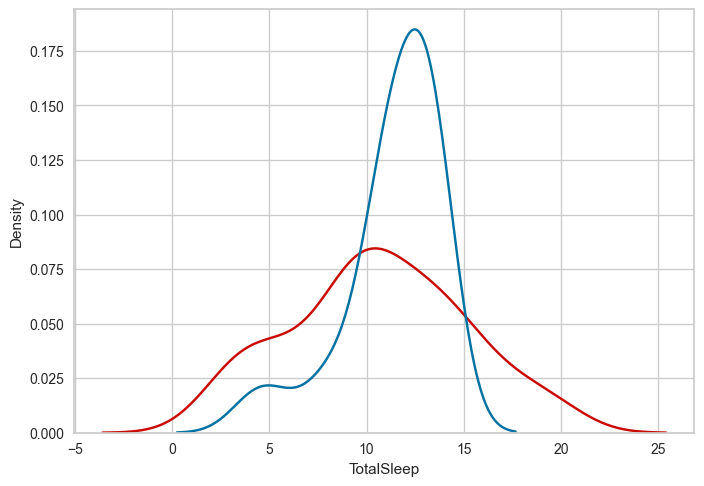

In [764]:
f_linearRegression(data_std, X_train, y_train, X_test, y_test)

In [765]:
df_sws = data_std[['Vore', 'BodyWt', 'BrainWt', 'Awake', 'NonDreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger', 'herbi', 'omni','carni', 'insecti']]
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_sws, test_size = 0.3)
X_train = df_train.loc[:, ['BodyWt', 'Danger']].values
y_train = df_train.NonDreaming.values
X_test = df_test.loc[:, ['BodyWt', 'Danger']].values
y_test = df_test.NonDreaming.values
f_linearRegression(df_sws, X_train, y_train, X_test, y_test)

Intercept:  11.671734123553597
Coefficients:  [-0.00141675 -1.05333836]
Coefficient R^2 : 0.03848354830287892
mean_squared_error:  10.002962962962965
mean_absolute_error:  2.488888888888889
Model Score:  0.2833822473203833


0.03848354830287892

## Multiple Linear Regression (MLR) - with standard cleaned data

In [ ]:
f_multipleLinearRegression(data_std, X_train, y_train, X_test, y_test)


In [ ]:
# R^2 score was actually better before moving LifeSpan and Gestation to logarithmic values, but MSE is better

## Polynomial Regression - with cleaned normalized data

In [ ]:
f_polynomialRegression(data_norm, X_train, y_train, X_test, y_test)

In [ ]:
# R^2 score might be better, but MSE is huge.
# This model is not adapted as it returns absurd values for TotalSleep

## Ridge Regression - with cleaned normalized data

In [ ]:
f_ridgeRegression(data_norm, X_train, y_train, X_test, y_test)

## Kernel Ridge Regression - with cleaned normalized data

mean_squared_error:  34.43222222222222
mean_absolute_error:  5.114814814814815
Coefficient R^2: -2.3097341515449585
Model Score:  -1.7589648303278587


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\3134874160.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\3134874160.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

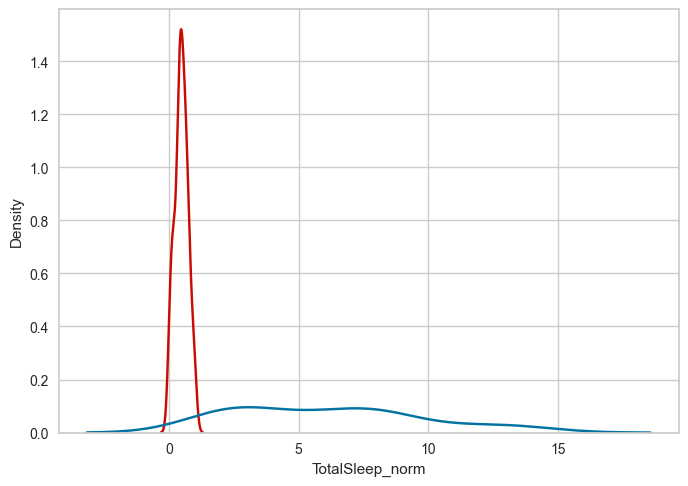

In [771]:
f_kernelRidgeRegression(data_norm, X_train, y_train, X_test, y_test)

## Lasso Regression - with cleaned normalized data

mean_squared_error:  10.013333333333334
mean_absolute_error:  2.4962962962962965
Coefficient R^2: 0.03748671548861959
Model Score:  0.28298509654144244
mean_squared_error:  10.013333333333334
mean_absolute_error:  2.4962962962962965


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\562058196.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\562058196.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

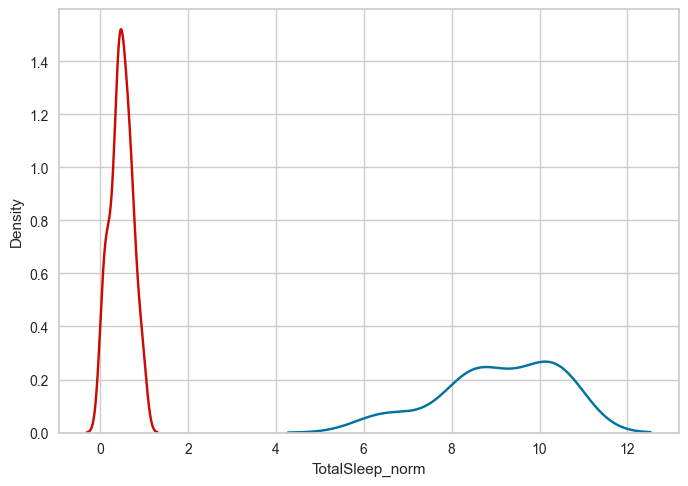

In [772]:
f_lassoRegression(data_norm, X_train, y_train, X_test, y_test)

## Random Forest - with cleaned normalized data

mean_squared_error:  10.22111111111111
mean_absolute_error:  2.6703703703703705
Model Score:  0.9078884421753071


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\3551987944.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\3551987944.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

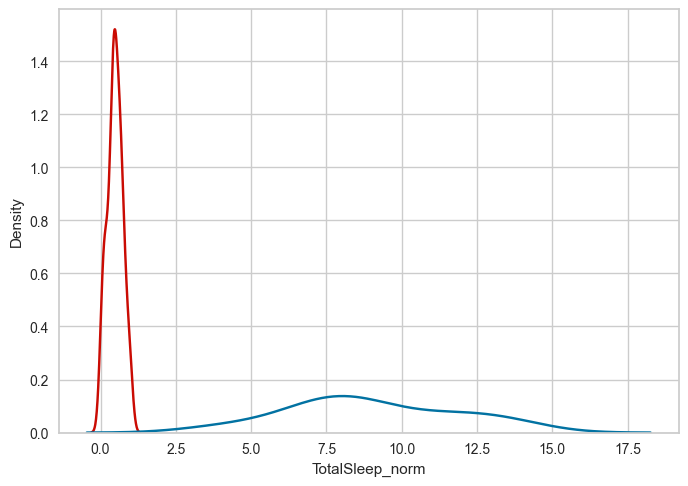

In [773]:
f_randomForest(data_norm, X_train, y_train, X_test, y_test)

## Support Vector Regression - with cleaned normalized data

Intercept:  [4.91808003]
Coefficient R^2 : 0.03652548384629806
mean_squared_error:  10.023333333333333
mean_absolute_error:  2.6851851851851856
Model Score:  0.27281430382855487


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\2135625061.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['TotalSleep_norm'], hist = False, color ='r', label = "Actual Value")
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_10024\2135625061.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

0.03652548384629806

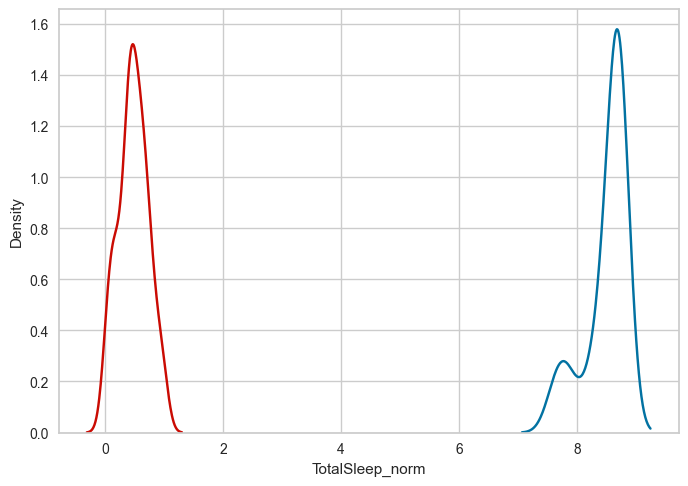

In [774]:
f_SVR(data_norm, X_train, y_train, X_test, y_test)

##### On all models we can see that the log transformation data give the best results, closely followed by normalized data.

##### The simply cleaned data give the worst results. This can be explained by the fact that we have large differences in some variables (BodyWt, Gestation..) and the log transformation has helped to reduce the value gaps and notably reduced the effect of outliers.

##### Normalization, by bringing variables to a common scale, helps to reduce the effect of outliers but with less impact than the log transformation.

###### Therefore, we should use log transformation data to compare models.

##### Due to our small dataset, we do not have time processing constraints; therefore, we keep all models for comparison, even those for which we expect weak results.

## Comparision of Predictive Models

In [775]:
# We start afresh by importing the cleaned data stored in sleep_merged_cleaned.csv
# We then create 3 different data frame for different analysis: 
#  1. using the standard cleaned data
#  2. using the logarithmic scaled data
#  3. using the normalized (max-min) data

In [776]:
df.cleaned = pd.read_csv('sleep_merged_cleaned.csv', sep = ',', header = 'infer')

# Select only numerical columns
data_std = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', 'omni', \
                       'Conservation', 'conservation_cat', 'BodyWt', 'BrainWt', 'BrainBodyWtRatio', 'TotalSleep', \
                       'Awake', 'NonDreaming', 'Dreaming', 'DreamRatio', 'rem', \
                       'sws', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']].copy()


data_log = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', \
                       'omni', 'Conservation', 'conservation_cat','BodyWt_log', 'BrainWt_log', \
                       'BrainBodyWtRatio_log', 'TotalSleep_log', 'Awake_log', \
                      'NonDreaming_log', 'Dreaming_log', 'DreamRatio_log', 'rem_log', 'sws_log',   \
                      'LifeSpan_log', 'Gestation_log', 'Predation', 'Exposure', 'Danger']].copy()

data_norm = df.cleaned[['Species', 'Genus', 'Order', 'Vore', 'OrderVore', 'carni', 'herbi', 'insecti', 'omni', \
                        'Conservation', 'conservation_cat','BodyWt_norm', 'BrainWt_norm', 'BrainBodyWtRatio_norm', \
                        'TotalSleep_norm', 'Awake_norm', \
                       'NonDreaming_norm', 'Dreaming_norm', 'DreamRatio_norm', 'LifeSpan_norm', 'Gestation_norm', \
                        'Predation', 'Exposure', 'Danger']].copy()


data_std_numeric = data_std.select_dtypes(include = ['float'])
data_log_numeric = data_log.select_dtypes(include = ['float'])
data_norm_numeric = data_norm.select_dtypes(include = ['float'])

In [777]:
# We saw earlier (in the analysis using DecisionTreeRegressor) the importance of the following variables:
Gestation : 0.7019
BrainWt : 0.1166
Danger : 0.0501
LifeSpan : 0.0466
BodyWt : 0.0278
insecti : 0.0215
Exposure : 0.0114
Predation : 0.0089
omni : 0.0075
herbi : 0.0059
carni : 0.0018
# As seen below, we have carni instecti, and omni of Vore having an impact on TotalSleep (in the OLS analysis).
# So we add these features of Vore in our analysis apart from the other variables above.
# Since the features were correlated with each other (For example: BodyWt and BrainWt or Danger and Exposure etc.), \
# We either create a new variable using Principal Component Analysis (PCA) or we included all.
# We decided to take all the pertinent variables instead.

In [778]:
def split_data_std(df):
    '''
    We split out data into training and test set in 3:7 ratio.
    X_train : input/independent/explanatory/predictor variables in training set of data
    y_train : Dependent/Explained/Predicted/Outcome/Target variable in training set of data (TotalSleep)
    X_test : input/independent/explanatory/predictor variables in test set of data
    y_test : Dependent/Explained/Predicted/Outcome/Target variable in test set of data (TotalSleep)
    We set random state to ensure same results.
    '''
    from sklearn.model_selection import train_test_split
    seed = 50
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 50)
    X_train = df_train.loc[:, ['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', \
                              'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_train = df_train['TotalSleep'].values
    X_test = df_test.loc[:, ['BodyWt', 'BrainWt', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', \
                            'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_test = df_test['TotalSleep'].values
    return X_train, y_train, X_test, y_test

In [779]:
def split_data_log(df):
    '''
    We split out data into training and test set in 3:7 ratio.
    X_train : input/independent/explanatory/predictor variables in training set of data
    y_train : Dependent/Explained/Predicted/Outcome/Target variable in training set of data (TotalSleep)
    X_test : input/independent/explanatory/predictor variables in test set of data
    y_test : Dependent/Explained/Predicted/Outcome/Target variable in test set of data (TotalSleep)
    We set random state to ensure same results.
    '''
    from sklearn.model_selection import train_test_split
    seed = 50
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 50)
    X_train = df_train.loc[:, ['BodyWt_log', 'BrainWt_log', 'LifeSpan_log', 'Gestation_log', 'Predation', 'Exposure', \
                              'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_train = df_train['TotalSleep_log'].values
    X_test = df_test.loc[:, ['BodyWt_log', 'BrainWt_log', 'LifeSpan_log', 'Gestation_log', 'Predation', 'Exposure', \
                            'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_test = df_test['TotalSleep_log'].values
    return X_train, y_train, X_test, y_test

In [780]:
def split_data_norm(df):
    '''
    We split out data into training and test set in 3:7 ratio.
    X_train : input/independent/explanatory/predictor variables in training set of data
    y_train : Dependent/Explained/Predicted/Outcome/Target variable in training set of data (TotalSleep)
    X_test : input/independent/explanatory/predictor variables in test set of data
    y_test : Dependent/Explained/Predicted/Outcome/Target variable in test set of data (TotalSleep)
    We set random state to ensure same results.
    '''
    from sklearn.model_selection import train_test_split
    seed = 50
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 50)
    X_train = df_train.loc[:, ['BodyWt_norm', 'BrainWt_norm', 'LifeSpan_norm', 'Gestation_norm', 'Predation', 'Exposure', \
                              'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_train = df_train['TotalSleep_norm'].values
    X_test = df_test.loc[:, ['BodyWt_norm', 'BrainWt_norm', 'LifeSpan_norm', 'Gestation_norm', 'Predation', 'Exposure', \
                            'Danger', 'carni', 'herbi', 'insecti', 'omni']].values
    y_test = df_test['TotalSleep_norm'].values
    return X_train, y_train, X_test, y_test

In [781]:
def model_comparision(X_train, y_train, X_test, y_test):
    '''
    This function comapres the models: LinearRegression, Ridge, KernelRidge, Lasso, RandomForestRegressor and SVR.
    The function takes a dataframe containing the cleaned data as an input.
    The output calculates the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
    It also plots the residuals and the prediction errors.
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.kernel_ridge import KernelRidge
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn import model_selection
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_val_predict
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures
    from yellowbrick.regressor import ResidualsPlot
    from yellowbrick.regressor import PredictionError
    
    models = []
    models.append(('Linear Regression', LinearRegression()))
    models.append(('Ridge Regression', Ridge()))
    models.append(('Kernel Ridge Regression', KernelRidge()))
    models.append(('Lasso Regression', Lasso()))
    models.append(('Random Forest', RandomForestRegressor()))
    models.append(('Support Vector Regression', SVR()))
    
    features = X
    results = []
    names = []
    
    for name, model in models:
        print(name)
        print("---------------")
        model = model.fit(X = X_train, y = y_train)
        model_score = model.score(X = X_train, y = y_train)
        y_pred = np.round(model.predict(X_test), 1)
        mse = round(mean_squared_error(y_test, y_pred), 2)
        mae = round(mean_absolute_error(y_test, y_pred), 2)
        rmse = round(np.sqrt(mse))
        r2 = r2_score(y_test, y_pred)
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
            print("Intercept: ", round(model.intercept_, 2))
            print("Coefficients: ", model.coef_, 2)
        print("Coefficient R² :", round(r2, 2))
        print('Mean Squared Error (MSE): ', mse)
        print('Mean Absolute Error (MAE): ', mae)
        print('Root Mean Squared Error (RMSE): ', rmse)
        print('Model Score: ', round(model_score, 2))
        residual_plot = ResidualsPlot(model, hist = False, qqplot = True)
        residual_plot.fit(X_train, y_train)
        residual_plot.score(X_test, y_test)
        residual_plot.show()
        prediction_error = PredictionError(model)
        prediction_error.fit(X_train, y_train)
        prediction_error.score(X_test, y_test)
        prediction_error.show()
        print("\n")
    return

-----Standard Data-------

Linear Regression
---------------
Intercept:  15.73
Coefficients:  [ 8.29573137e-04 -7.80138100e-04 -2.68867289e-02 -9.46730845e-03
  1.28989108e+00 -5.08673592e-01 -2.25703109e+00 -5.98970182e-01
  2.63459559e-01  5.22813209e-01 -1.87302585e-01] 2
Coefficient R² : 0.3
Mean Squared Error (MSE):  9.94
Mean Absolute Error (MAE):  2.56
Root Mean Squared Error (RMSE):  3
Model Score:  0.53


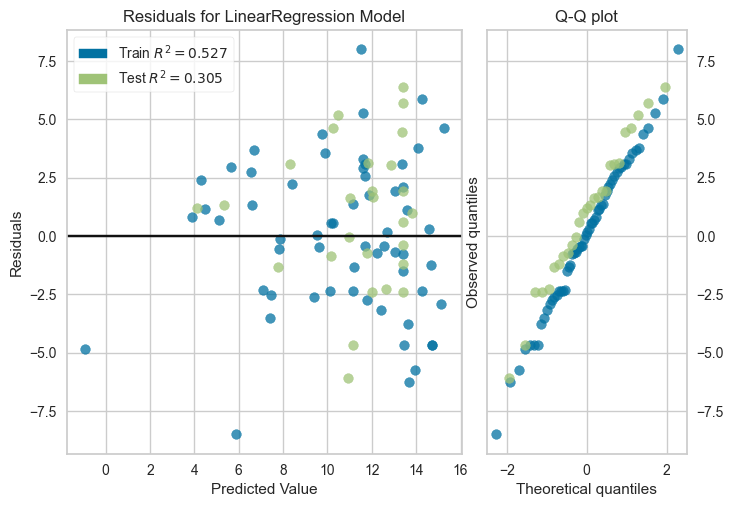

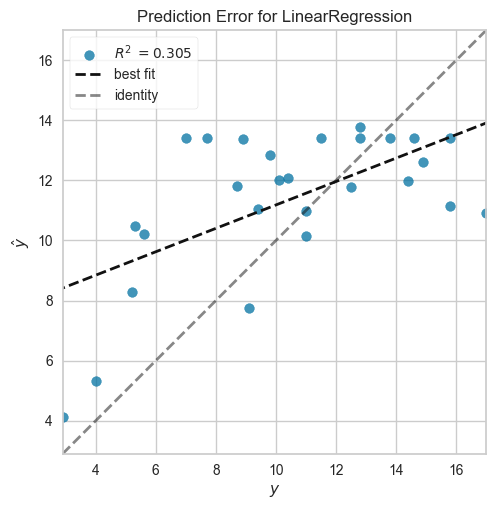



Ridge Regression
---------------
Intercept:  15.79
Coefficients:  [ 8.89397605e-04 -8.12509944e-04 -2.67113062e-02 -9.81476714e-03
  1.05829468e+00 -5.58556147e-01 -1.97158021e+00 -5.16448241e-01
  2.73817007e-01  4.28930405e-01 -1.86299171e-01] 2
Coefficient R² : 0.31
Mean Squared Error (MSE):  9.9
Mean Absolute Error (MAE):  2.56
Root Mean Squared Error (RMSE):  3
Model Score:  0.53


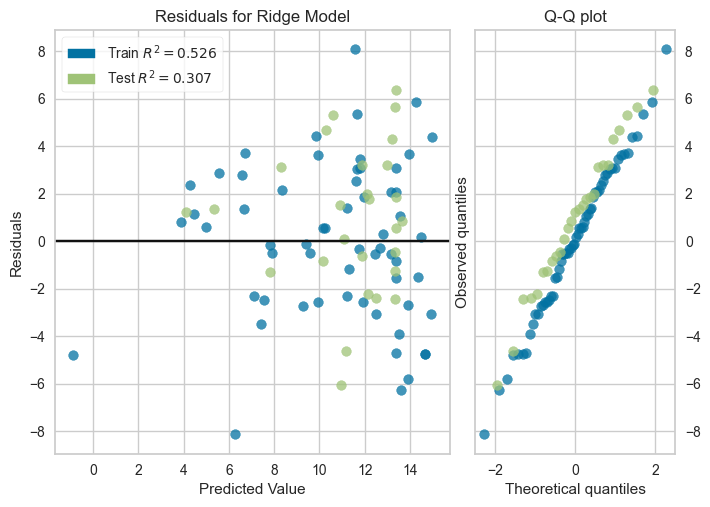

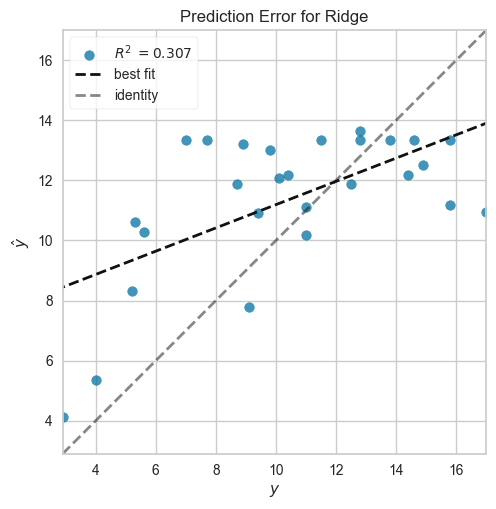



Kernel Ridge Regression
---------------
Coefficient R² : 0.1
Mean Squared Error (MSE):  12.92
Mean Absolute Error (MAE):  2.91
Root Mean Squared Error (RMSE):  4
Model Score:  0.36


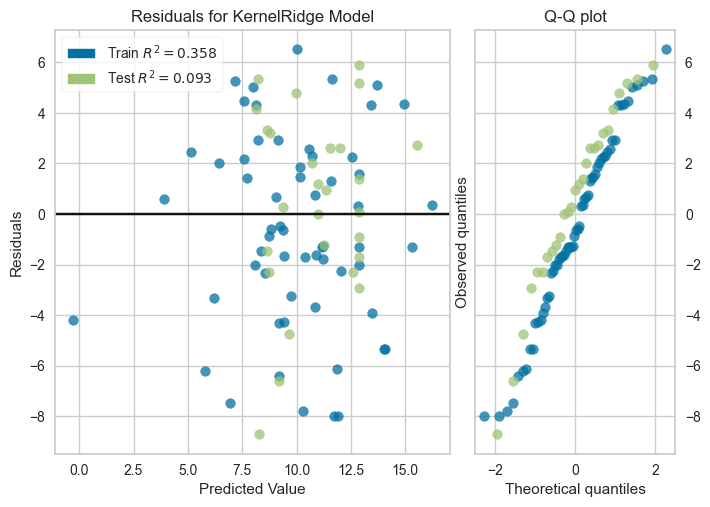

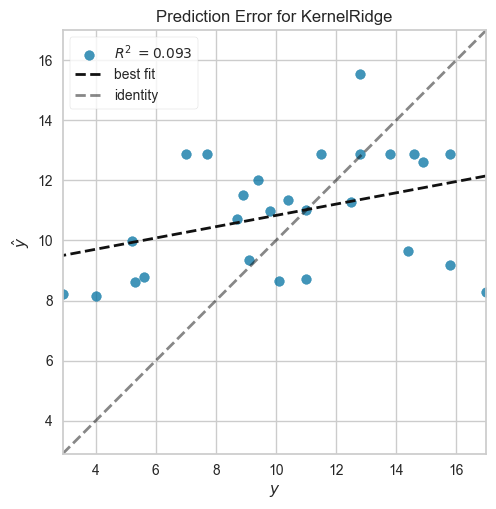



Lasso Regression
---------------
Intercept:  14.69
Coefficients:  [ 8.75779832e-04 -2.17668839e-04 -1.71378695e-02 -2.03138786e-02
 -0.00000000e+00 -1.56086062e-02 -4.40575142e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00] 2
Coefficient R² : 0.43
Mean Squared Error (MSE):  8.17
Mean Absolute Error (MAE):  2.36
Root Mean Squared Error (RMSE):  3
Model Score:  0.46


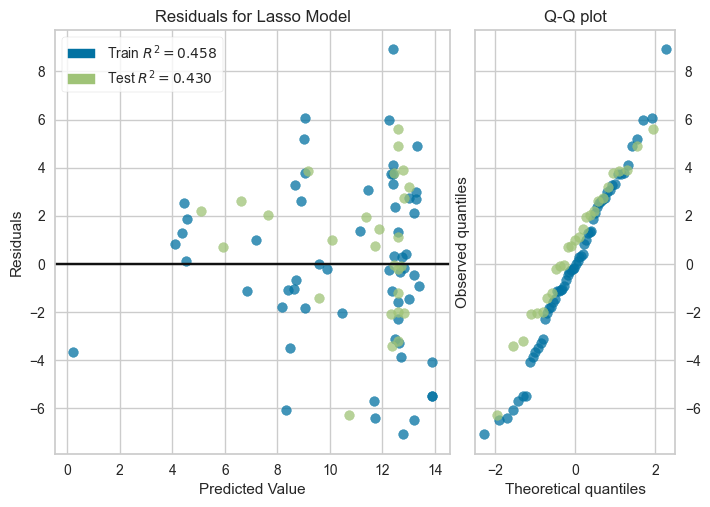

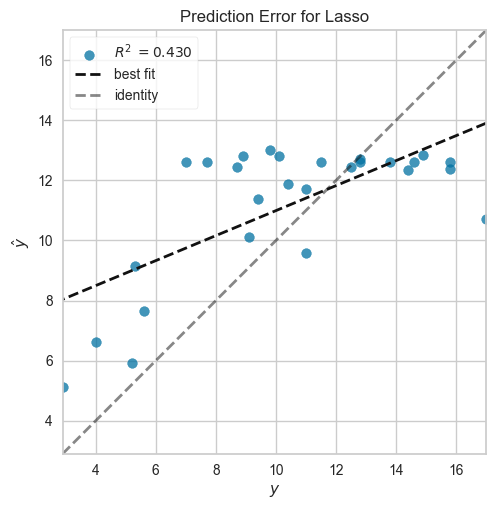



Random Forest
---------------
Coefficient R² : 0.29
Mean Squared Error (MSE):  10.15
Mean Absolute Error (MAE):  2.45
Root Mean Squared Error (RMSE):  3
Model Score:  0.92


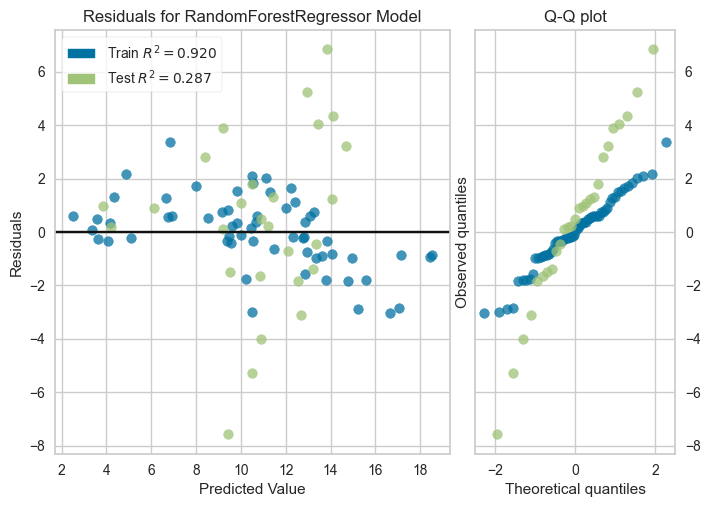

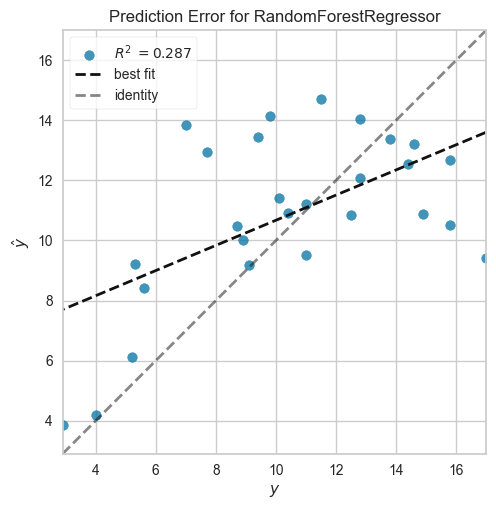



Support Vector Regression
---------------
Coefficient R² : 0.14
Mean Squared Error (MSE):  12.27
Mean Absolute Error (MAE):  2.91
Root Mean Squared Error (RMSE):  4
Model Score:  0.18


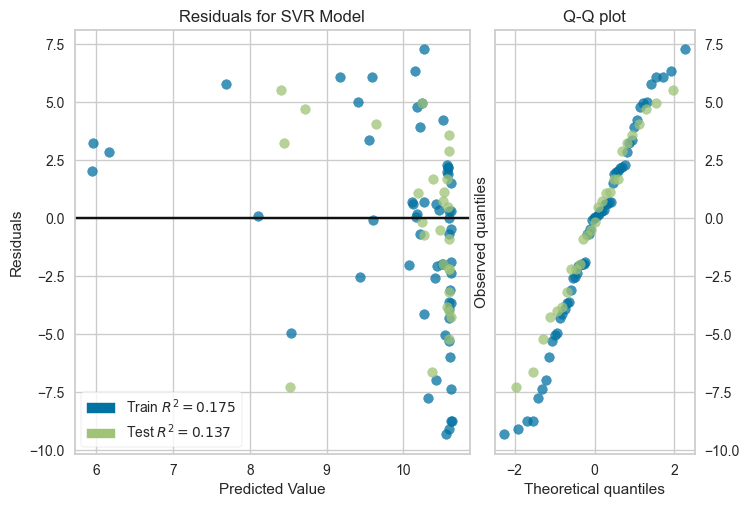

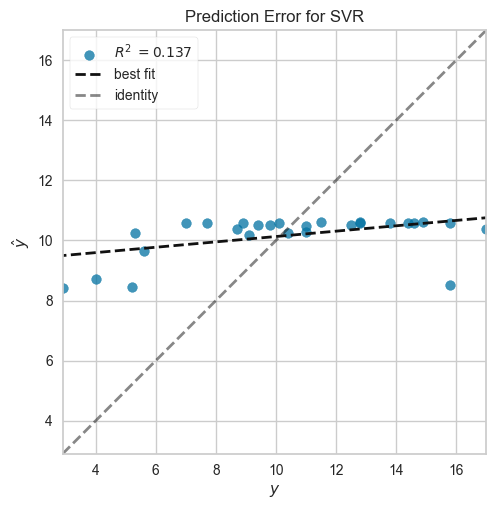




-----Log Data-------

Linear Regression
---------------
Intercept:  1.52
Coefficients:  [-0.00550646 -0.06349758  0.03260285 -0.14848593  0.02099451 -0.00978018
 -0.07861592 -0.02325906  0.00645948 -0.02903186  0.04583144] 2
Coefficient R² : 0.54
Mean Squared Error (MSE):  0.02
Mean Absolute Error (MAE):  0.1
Root Mean Squared Error (RMSE):  0
Model Score:  0.57


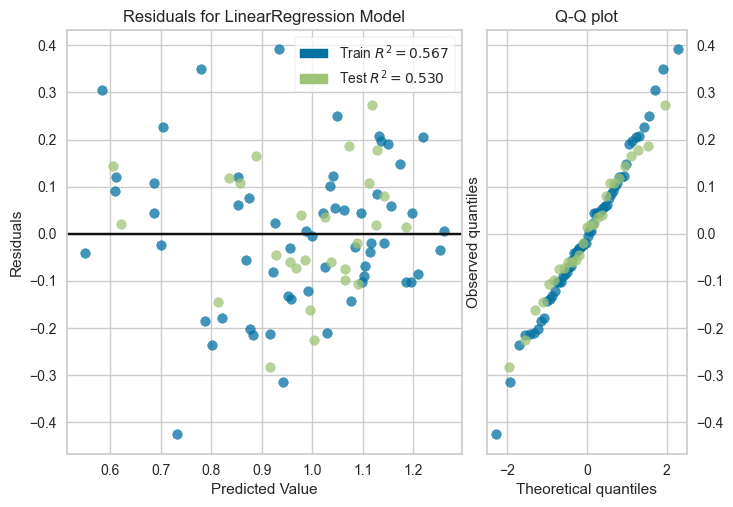

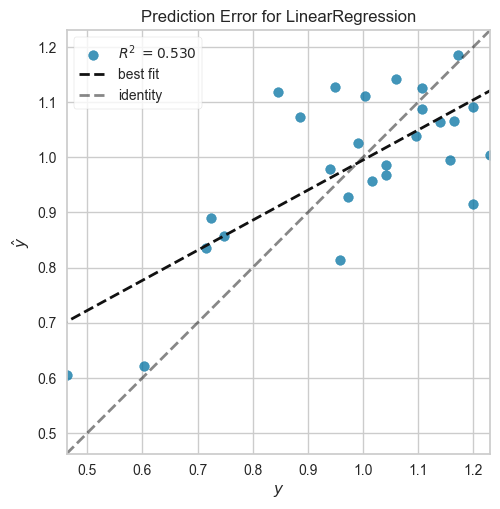



Ridge Regression
---------------
Intercept:  1.5
Coefficients:  [-0.0178462  -0.05123392  0.01179809 -0.12002883  0.01747253 -0.0123717
 -0.07327996 -0.01844648  0.00543909 -0.0232632   0.03627059] 2
Coefficient R² : 0.54
Mean Squared Error (MSE):  0.02
Mean Absolute Error (MAE):  0.1
Root Mean Squared Error (RMSE):  0
Model Score:  0.57


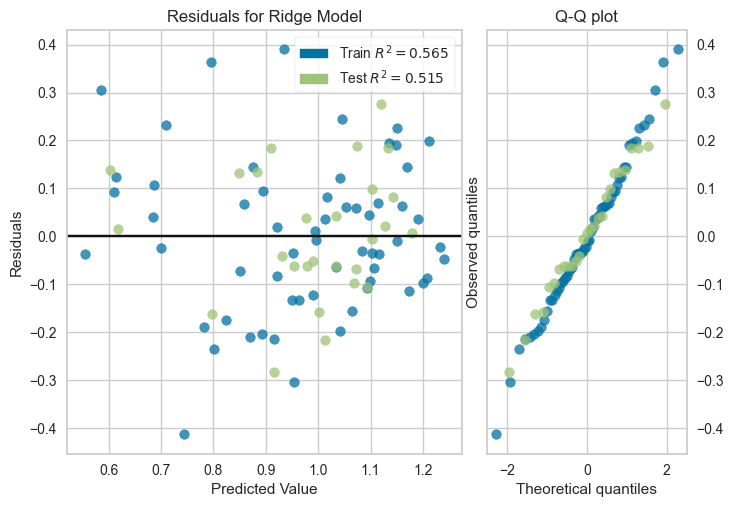

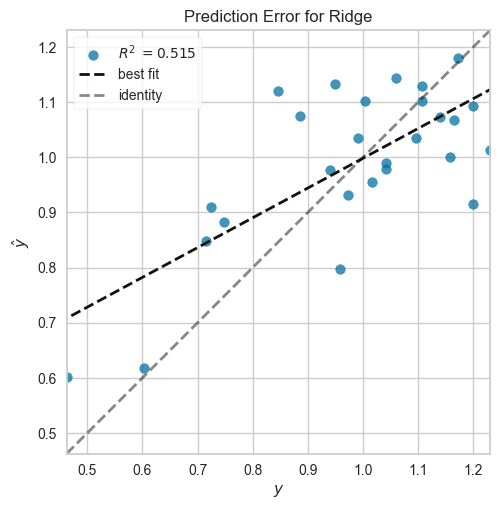



Kernel Ridge Regression
---------------
Coefficient R² : -0.49
Mean Squared Error (MSE):  0.05
Mean Absolute Error (MAE):  0.18
Root Mean Squared Error (RMSE):  0
Model Score:  0.16


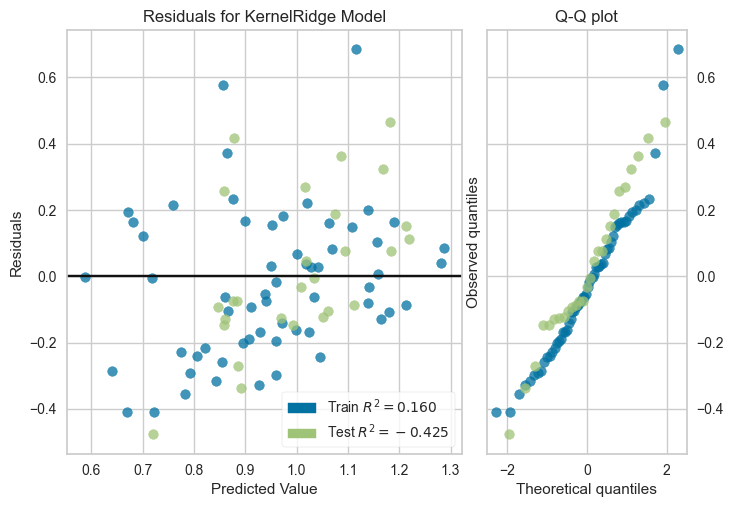

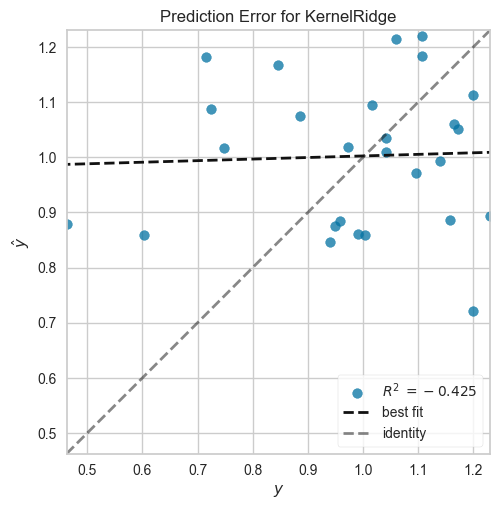



Lasso Regression
---------------
Intercept:  0.97
Coefficients:  [-0. -0. -0. -0. -0. -0. -0.  0. -0.  0.  0.] 2
Coefficient R² : -0.01
Mean Squared Error (MSE):  0.04
Mean Absolute Error (MAE):  0.15
Root Mean Squared Error (RMSE):  0
Model Score:  0.0


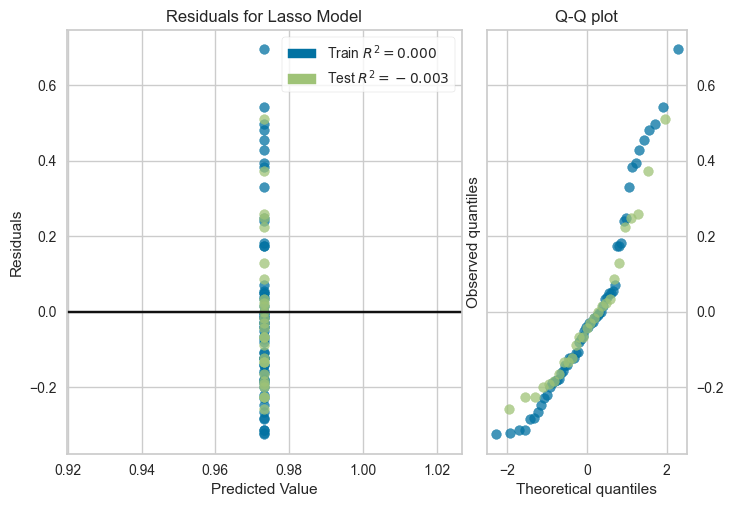

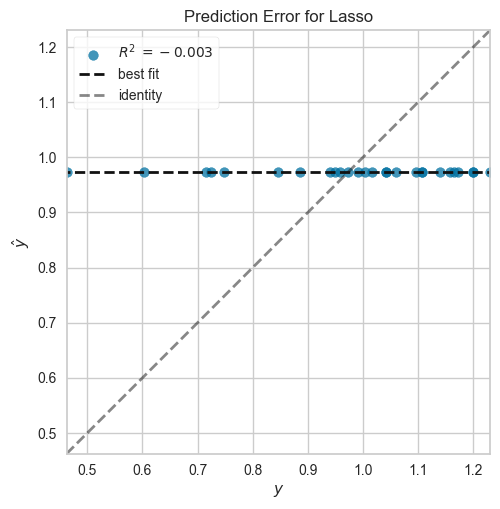



Random Forest
---------------
Coefficient R² : 0.55
Mean Squared Error (MSE):  0.02
Mean Absolute Error (MAE):  0.1
Root Mean Squared Error (RMSE):  0
Model Score:  0.93


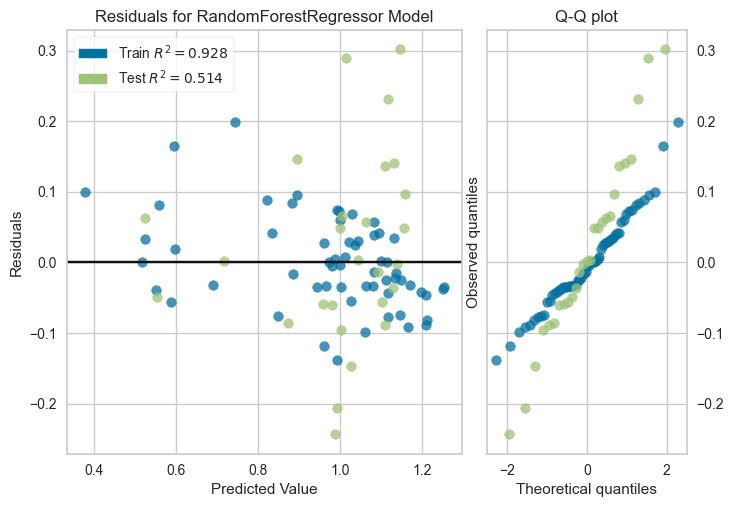

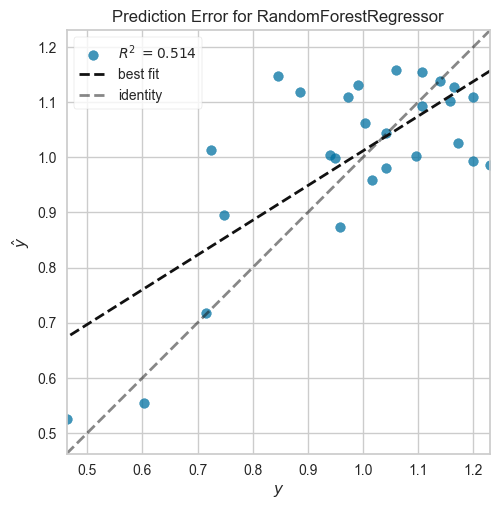



Support Vector Regression
---------------
Coefficient R² : 0.43
Mean Squared Error (MSE):  0.02
Mean Absolute Error (MAE):  0.12
Root Mean Squared Error (RMSE):  0
Model Score:  0.74


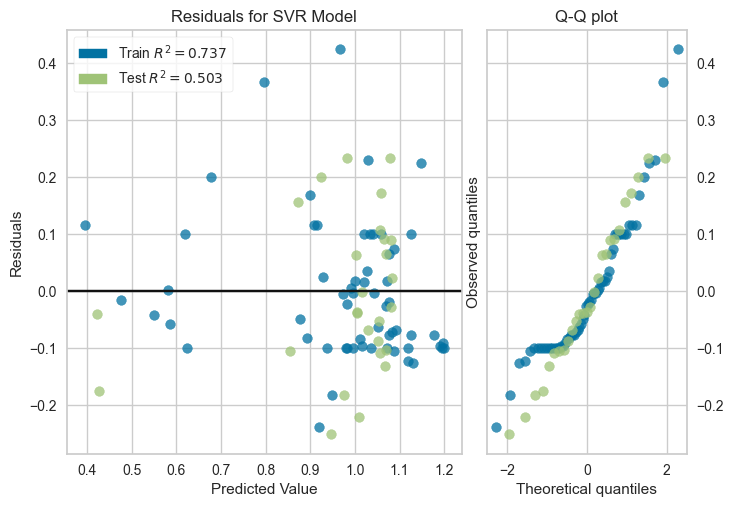

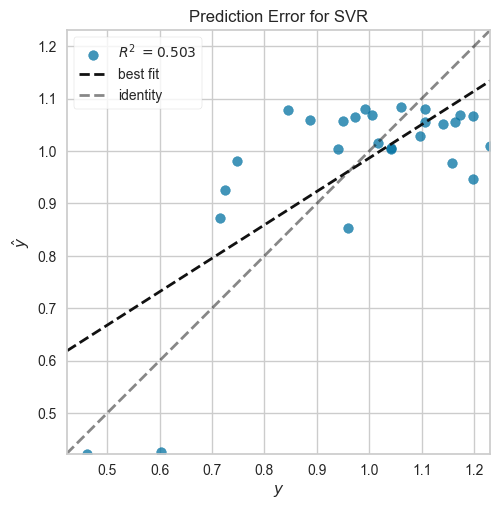




-----Normalized Data-------

Linear Regression
---------------
Intercept:  0.76
Coefficients:  [ 0.30666531 -0.24755776 -0.1463833  -0.33293368  0.07166062 -0.02825964
 -0.12539062 -0.03327612  0.01463664  0.02904518 -0.0104057 ] 2
Coefficient R² : 0.27
Mean Squared Error (MSE):  0.03
Mean Absolute Error (MAE):  0.15
Root Mean Squared Error (RMSE):  0
Model Score:  0.53


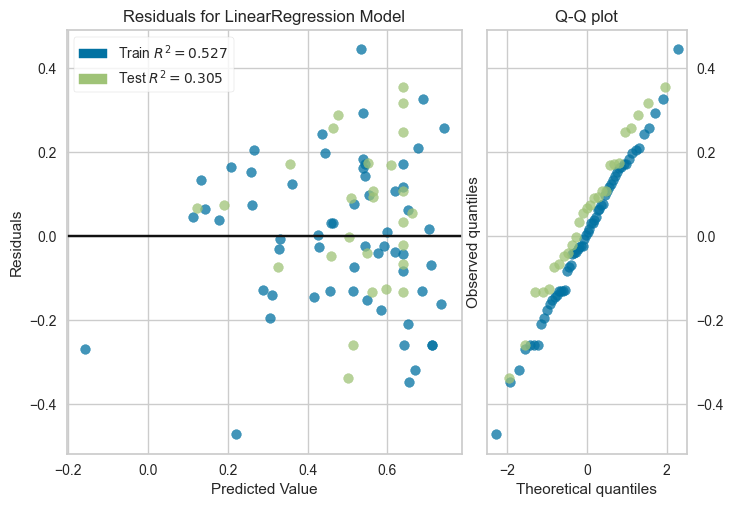

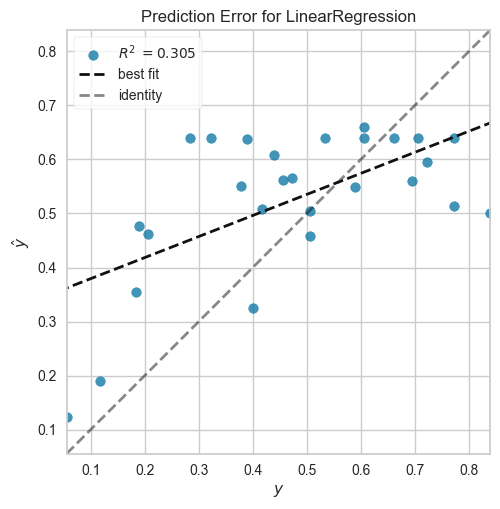



Ridge Regression
---------------
Intercept:  0.74
Coefficients:  [ 0.01706785 -0.11128472 -0.15252351 -0.18602887  0.0775567  -0.04061702
 -0.12227452 -0.03001536  0.00907569  0.0379802  -0.01704053] 2
Coefficient R² : 0.31
Mean Squared Error (MSE):  0.03
Mean Absolute Error (MAE):  0.14
Root Mean Squared Error (RMSE):  0
Model Score:  0.52


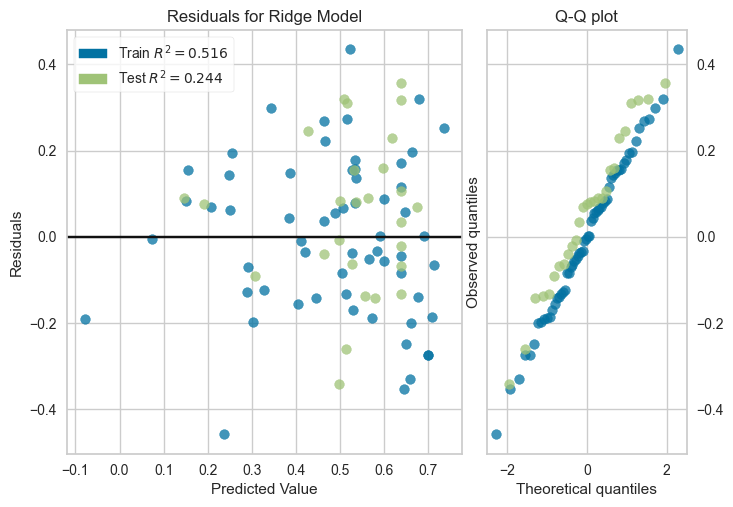

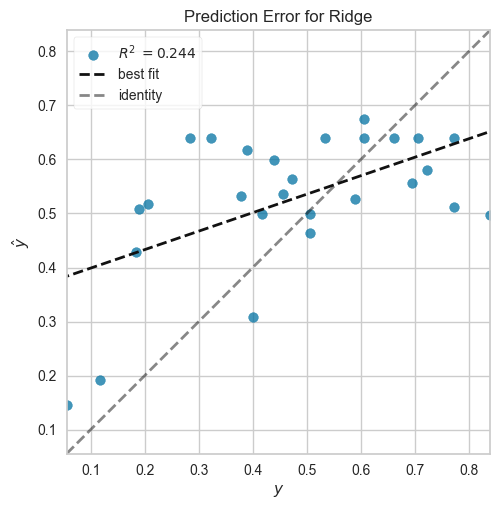



Kernel Ridge Regression
---------------
Coefficient R² : 0.13
Mean Squared Error (MSE):  0.04
Mean Absolute Error (MAE):  0.16
Root Mean Squared Error (RMSE):  0
Model Score:  0.39


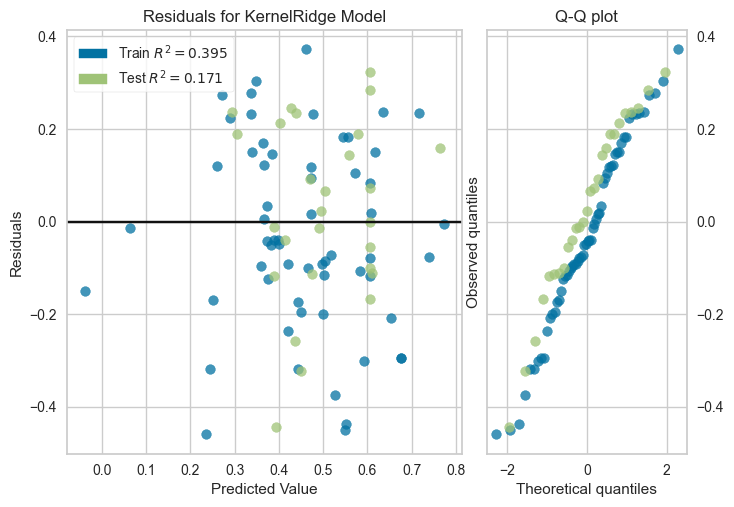

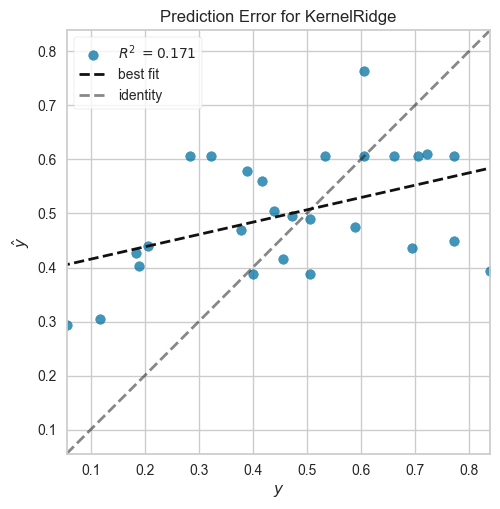



Lasso Regression
---------------
Intercept:  0.49
Coefficients:  [-0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.] 2
Coefficient R² : -0.01
Mean Squared Error (MSE):  0.04
Mean Absolute Error (MAE):  0.17
Root Mean Squared Error (RMSE):  0
Model Score:  0.0


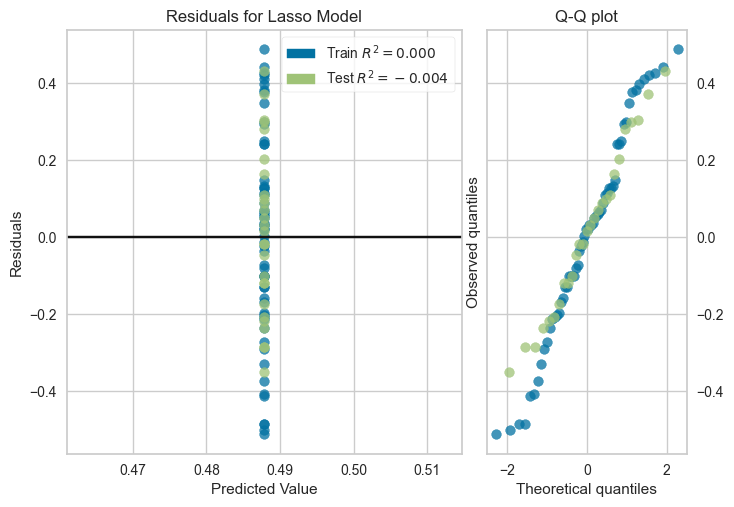

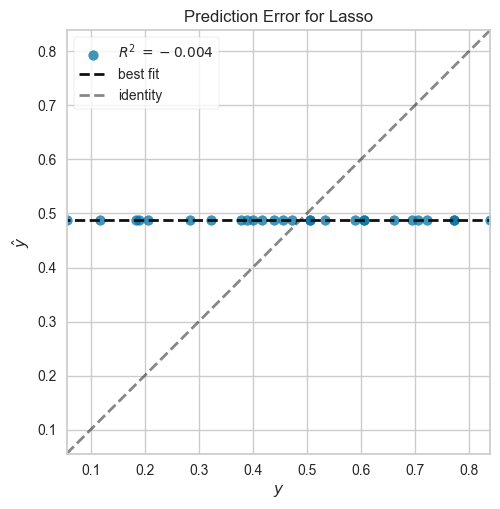



Random Forest
---------------
Coefficient R² : 0.25
Mean Squared Error (MSE):  0.03
Mean Absolute Error (MAE):  0.14
Root Mean Squared Error (RMSE):  0
Model Score:  0.92


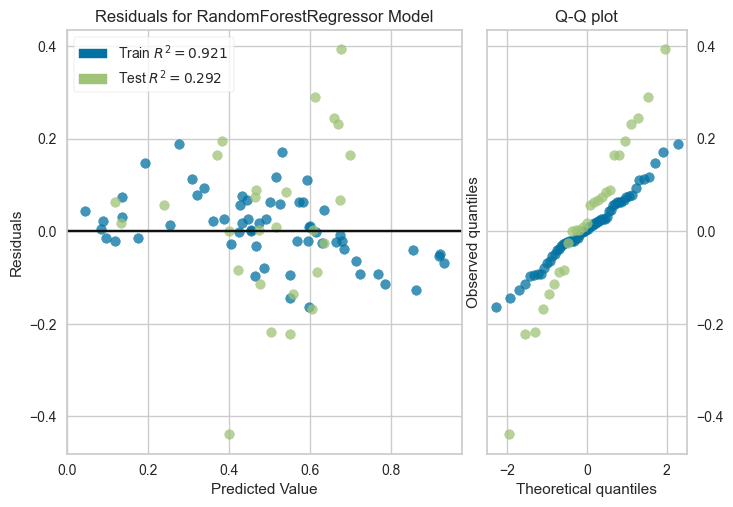

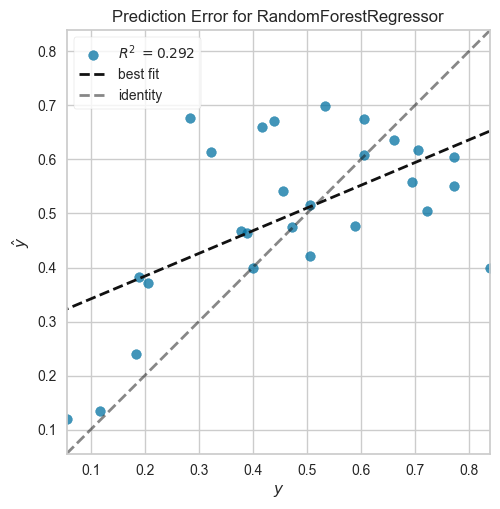



Support Vector Regression
---------------
Coefficient R² : 0.05
Mean Squared Error (MSE):  0.04
Mean Absolute Error (MAE):  0.17
Root Mean Squared Error (RMSE):  0
Model Score:  0.6


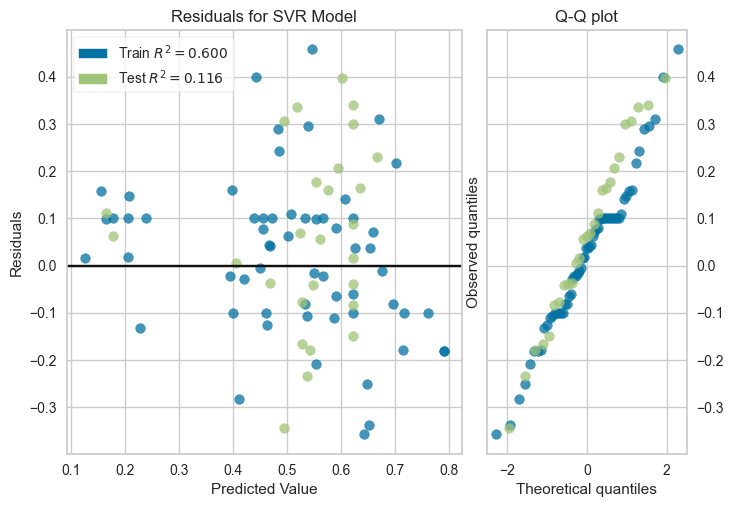

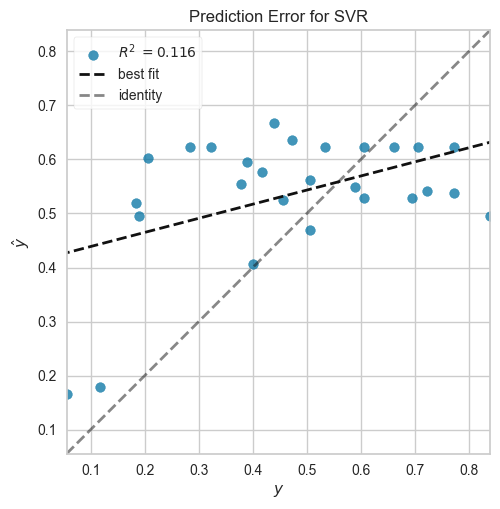

In [782]:
print("-----Standard Data-------\n")
X_train, y_train, X_test, y_test = split_data_std(data_std)
model_comparision(X_train, y_train, X_test, y_test)

print("\n-----Log Data-------\n")
X_train, y_train, X_test, y_test = split_data_log(data_log)
model_comparision(X_train, y_train, X_test, y_test)

print("\n-----Normalized Data-------\n")
X_train, y_train, X_test, y_test = split_data_norm(data_norm)
model_comparision(X_train, y_train, X_test, y_test)

### Model Evaluation (comparision of metrics)

###### Results based only on log-scaled values as they have better overall results.

###### As expected, Polynomial, Lasso, and Kernel models perform poorly, mainly due to our dataset not being suitable for these models (too small for Polynomial and Kernel, multi-collinear issues for Lasso).

###### Regarding the more suitable methods for our dataset, the Random Forest model has the best overall performance, with a high score (0.92), low MSE and MAE, and a relatively high R².

###### This can be explained by the fact that Random Forest effectively handles the constraints of our dataset, namely: a mixture of continuous and categorical variables, a small dataset, and multi-collinear features.

###### Following this, the SVR model yields slightly inferior results but still remains very acceptable.

###### These results can be explained by the model's capability to handle complex patterns and a significant number of featuress. However, this model remains sensitive to the choice of regularization parameters and kernel selection.

###### Regarding the three others regressions (Linear, MLR, Ridge), we observe almost identical results with a score around 0.55, low MAE, MSE, and RMSE, and an average R² value.

###### This can be explained by the specificity of our dataset: a significant number of categorical features and a large number of features, some of which are correlated.

###### As these models are simpler than Random Forest or SVR, it is possible that they have processed the data in a similar manner.

## Results and interpretation¶

### Random Forest Model (log-scaled data)

In [ ]:
X_train, y_train, X_test, y_test = model_train_log(data_log)

In [ ]:
f_randomForest(data_log, X_train, y_train, X_test, y_test)